# Nvida Company

In [2]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [5]:
df=pd.read_csv('nvda_data.csv')

In [6]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2024-08-23 09:30:00,125.870003,125.970001,125.529999,125.605103,125.605103,9116047
1,2024-08-23 09:31:00,125.610001,125.730003,125.220001,125.620003,125.620003,1619948
2,2024-08-23 09:32:00,125.639999,125.790001,125.400002,125.519997,125.519997,1213367
3,2024-08-23 09:33:00,125.540001,125.730003,125.349998,125.459999,125.459999,1388527
4,2024-08-23 09:34:00,125.459999,125.849998,125.419998,125.705002,125.705002,1201631


In [7]:
df.info

<bound method DataFrame.info of                  Datetime        Open        High         Low       Close  \
0     2024-08-23 09:30:00  125.870003  125.970001  125.529999  125.605103   
1     2024-08-23 09:31:00  125.610001  125.730003  125.220001  125.620003   
2     2024-08-23 09:32:00  125.639999  125.790001  125.400002  125.519997   
3     2024-08-23 09:33:00  125.540001  125.730003  125.349998  125.459999   
4     2024-08-23 09:34:00  125.459999  125.849998  125.419998  125.705002   
...                   ...         ...         ...         ...         ...   
9741  2024-09-27 15:55:00  121.480003  121.699997  121.449997  121.459999   
9742  2024-09-27 15:56:00  121.470001  121.540001  121.440002  121.450897   
9743  2024-09-27 15:57:00  121.449997  121.510002  121.320000  121.404999   
9744  2024-09-27 15:58:00  121.400703  121.500000  121.309998  121.360703   
9745  2024-09-27 15:59:00  121.366402  121.400002  121.199997  121.400002   

       Adj Close   Volume  
0     125.60510

In [8]:
df.isnull().sum()

Datetime     0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Datetime     0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
categorical_col=df.select_dtypes(include=['object','category']).columns
categorical_col

Index(['Datetime'], dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9746 entries, 0 to 9745
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   9746 non-null   object 
 1   Open       9746 non-null   float64
 2   High       9746 non-null   float64
 3   Low        9746 non-null   float64
 4   Close      9746 non-null   float64
 5   Adj Close  9746 non-null   float64
 6   Volume     9746 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 533.1+ KB


In [15]:
df_one_hot=pd.get_dummies(df,columns=categorical_col,drop_first=True)
df_one_hot.head()

,Open,High,Low,Close,Adj Close,Volume,Datetime_2024-08-23 09:31:00,Datetime_2024-08-23 09:32:00,Datetime_2024-08-23 09:33:00,Datetime_2024-08-23 09:34:00,...,Datetime_2024-09-27 15:50:00,Datetime_2024-09-27 15:51:00,Datetime_2024-09-27 15:52:00,Datetime_2024-09-27 15:53:00,Datetime_2024-09-27 15:54:00,Datetime_2024-09-27 15:55:00,Datetime_2024-09-27 15:56:00,Datetime_2024-09-27 15:57:00,Datetime_2024-09-27 15:58:00,Datetime_2024-09-27 15:59:00
0,125.870003,125.970001,125.529999,125.605103,125.605103,9116047,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,125.610001,125.730003,125.220001,125.620003,125.620003,1619948,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,125.639999,125.790001,125.400002,125.519997,125.519997,1213367,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,125.540001,125.730003,125.349998,125.459999,125.459999,1388527,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,125.459999,125.849998,125.419998,125.705002,125.705002,1201631,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [17]:
numerical_columns = df_one_hot.select_dtypes(include=['float64', 'int64']).columns

In [18]:
df_one_hot[numerical_columns] = df_one_hot[numerical_columns].fillna(df_one_hot[numerical_columns].mean())

In [19]:
print(df_one_hot.head())

         Open        High         Low       Close   Adj Close   Volume  \
0  125.870003  125.970001  125.529999  125.605103  125.605103  9116047   
1  125.610001  125.730003  125.220001  125.620003  125.620003  1619948   
2  125.639999  125.790001  125.400002  125.519997  125.519997  1213367   
3  125.540001  125.730003  125.349998  125.459999  125.459999  1388527   
4  125.459999  125.849998  125.419998  125.705002  125.705002  1201631   

   Datetime_2024-08-23 09:31:00  Datetime_2024-08-23 09:32:00  \
0                         False                         False   
1                          True                         False   
2                         False                          True   
3                         False                         False   
4                         False                         False   

   Datetime_2024-08-23 09:33:00  Datetime_2024-08-23 09:34:00  ...  \
0                         False                         False  ...   
1                       

In [20]:
df_one_hot.fillna(df.mean(),inplace=True)


TypeError: Could not convert ['2024-08-23 09:30:002024-08-23 09:31:002024-08-23 09:32:002024-08-23 09:33:002024-08-23 09:34:002024-08-23 09:35:002024-08-23 09:36:002024-08-23 09:37:002024-08-23 09:38:002024-08-23 09:39:002024-08-23 09:40:002024-08-23 09:41:002024-08-23 09:42:002024-08-23 09:43:002024-08-23 09:44:002024-08-23 09:45:002024-08-23 09:46:002024-08-23 09:47:002024-08-23 09:48:002024-08-23 09:49:002024-08-23 09:50:002024-08-23 09:51:002024-08-23 09:52:002024-08-23 09:53:002024-08-23 09:54:002024-08-23 09:55:002024-08-23 09:56:002024-08-23 09:57:002024-08-23 09:58:002024-08-23 09:59:002024-08-23 10:00:002024-08-23 10:01:002024-08-23 10:02:002024-08-23 10:03:002024-08-23 10:04:002024-08-23 10:05:002024-08-23 10:06:002024-08-23 10:07:002024-08-23 10:08:002024-08-23 10:09:002024-08-23 10:10:002024-08-23 10:11:002024-08-23 10:12:002024-08-23 10:13:002024-08-23 10:14:002024-08-23 10:15:002024-08-23 10:16:002024-08-23 10:17:002024-08-23 10:18:002024-08-23 10:19:002024-08-23 10:20:002024-08-23 10:21:002024-08-23 10:22:002024-08-23 10:23:002024-08-23 10:24:002024-08-23 10:25:002024-08-23 10:26:002024-08-23 10:27:002024-08-23 10:28:002024-08-23 10:29:002024-08-23 10:30:002024-08-23 10:31:002024-08-23 10:32:002024-08-23 10:33:002024-08-23 10:34:002024-08-23 10:35:002024-08-23 10:36:002024-08-23 10:37:002024-08-23 10:38:002024-08-23 10:39:002024-08-23 10:40:002024-08-23 10:41:002024-08-23 10:42:002024-08-23 10:43:002024-08-23 10:44:002024-08-23 10:45:002024-08-23 10:46:002024-08-23 10:47:002024-08-23 10:48:002024-08-23 10:49:002024-08-23 10:50:002024-08-23 10:51:002024-08-23 10:52:002024-08-23 10:53:002024-08-23 10:54:002024-08-23 10:55:002024-08-23 10:56:002024-08-23 10:57:002024-08-23 10:58:002024-08-23 10:59:002024-08-23 11:00:002024-08-23 11:01:002024-08-23 11:02:002024-08-23 11:03:002024-08-23 11:04:002024-08-23 11:05:002024-08-23 11:06:002024-08-23 11:07:002024-08-23 11:08:002024-08-23 11:09:002024-08-23 11:10:002024-08-23 11:11:002024-08-23 11:12:002024-08-23 11:13:002024-08-23 11:14:002024-08-23 11:15:002024-08-23 11:16:002024-08-23 11:17:002024-08-23 11:18:002024-08-23 11:19:002024-08-23 11:20:002024-08-23 11:21:002024-08-23 11:22:002024-08-23 11:23:002024-08-23 11:24:002024-08-23 11:25:002024-08-23 11:26:002024-08-23 11:27:002024-08-23 11:28:002024-08-23 11:29:002024-08-23 11:30:002024-08-23 11:31:002024-08-23 11:32:002024-08-23 11:33:002024-08-23 11:34:002024-08-23 11:35:002024-08-23 11:36:002024-08-23 11:37:002024-08-23 11:38:002024-08-23 11:39:002024-08-23 11:40:002024-08-23 11:41:002024-08-23 11:42:002024-08-23 11:43:002024-08-23 11:44:002024-08-23 11:45:002024-08-23 11:46:002024-08-23 11:47:002024-08-23 11:48:002024-08-23 11:49:002024-08-23 11:50:002024-08-23 11:51:002024-08-23 11:52:002024-08-23 11:53:002024-08-23 11:54:002024-08-23 11:55:002024-08-23 11:56:002024-08-23 11:57:002024-08-23 11:58:002024-08-23 11:59:002024-08-23 12:00:002024-08-23 12:01:002024-08-23 12:02:002024-08-23 12:03:002024-08-23 12:04:002024-08-23 12:05:002024-08-23 12:06:002024-08-23 12:07:002024-08-23 12:08:002024-08-23 12:09:002024-08-23 12:10:002024-08-23 12:11:002024-08-23 12:12:002024-08-23 12:13:002024-08-23 12:14:002024-08-23 12:15:002024-08-23 12:16:002024-08-23 12:17:002024-08-23 12:18:002024-08-23 12:19:002024-08-23 12:20:002024-08-23 12:21:002024-08-23 12:22:002024-08-23 12:23:002024-08-23 12:24:002024-08-23 12:25:002024-08-23 12:26:002024-08-23 12:27:002024-08-23 12:28:002024-08-23 12:29:002024-08-23 12:30:002024-08-23 12:31:002024-08-23 12:32:002024-08-23 12:33:002024-08-23 12:34:002024-08-23 12:35:002024-08-23 12:36:002024-08-23 12:37:002024-08-23 12:38:002024-08-23 12:39:002024-08-23 12:40:002024-08-23 12:41:002024-08-23 12:42:002024-08-23 12:43:002024-08-23 12:44:002024-08-23 12:45:002024-08-23 12:46:002024-08-23 12:47:002024-08-23 12:48:002024-08-23 12:49:002024-08-23 12:50:002024-08-23 12:51:002024-08-23 12:52:002024-08-23 12:53:002024-08-23 12:54:002024-08-23 12:55:002024-08-23 12:56:002024-08-23 12:57:002024-08-23 12:58:002024-08-23 12:59:002024-08-23 13:00:002024-08-23 13:01:002024-08-23 13:02:002024-08-23 13:03:002024-08-23 13:04:002024-08-23 13:05:002024-08-23 13:06:002024-08-23 13:07:002024-08-23 13:08:002024-08-23 13:09:002024-08-23 13:10:002024-08-23 13:11:002024-08-23 13:12:002024-08-23 13:13:002024-08-23 13:14:002024-08-23 13:15:002024-08-23 13:16:002024-08-23 13:17:002024-08-23 13:18:002024-08-23 13:19:002024-08-23 13:20:002024-08-23 13:21:002024-08-23 13:22:002024-08-23 13:23:002024-08-23 13:24:002024-08-23 13:25:002024-08-23 13:26:002024-08-23 13:27:002024-08-23 13:28:002024-08-23 13:29:002024-08-23 13:30:002024-08-23 13:31:002024-08-23 13:32:002024-08-23 13:33:002024-08-23 13:34:002024-08-23 13:35:002024-08-23 13:36:002024-08-23 13:37:002024-08-23 13:38:002024-08-23 13:39:002024-08-23 13:40:002024-08-23 13:41:002024-08-23 13:42:002024-08-23 13:43:002024-08-23 13:44:002024-08-23 13:45:002024-08-23 13:46:002024-08-23 13:47:002024-08-23 13:48:002024-08-23 13:49:002024-08-23 13:50:002024-08-23 13:51:002024-08-23 13:52:002024-08-23 13:53:002024-08-23 13:54:002024-08-23 13:55:002024-08-23 13:56:002024-08-23 13:57:002024-08-23 13:58:002024-08-23 13:59:002024-08-23 14:00:002024-08-23 14:01:002024-08-23 14:02:002024-08-23 14:03:002024-08-23 14:04:002024-08-23 14:05:002024-08-23 14:06:002024-08-23 14:07:002024-08-23 14:08:002024-08-23 14:09:002024-08-23 14:10:002024-08-23 14:11:002024-08-23 14:12:002024-08-23 14:13:002024-08-23 14:14:002024-08-23 14:15:002024-08-23 14:16:002024-08-23 14:17:002024-08-23 14:18:002024-08-23 14:19:002024-08-23 14:20:002024-08-23 14:21:002024-08-23 14:22:002024-08-23 14:23:002024-08-23 14:24:002024-08-23 14:25:002024-08-23 14:26:002024-08-23 14:27:002024-08-23 14:28:002024-08-23 14:29:002024-08-23 14:30:002024-08-23 14:31:002024-08-23 14:32:002024-08-23 14:33:002024-08-23 14:34:002024-08-23 14:35:002024-08-23 14:36:002024-08-23 14:37:002024-08-23 14:38:002024-08-23 14:39:002024-08-23 14:40:002024-08-23 14:41:002024-08-23 14:42:002024-08-23 14:43:002024-08-23 14:44:002024-08-23 14:45:002024-08-23 14:46:002024-08-23 14:47:002024-08-23 14:48:002024-08-23 14:49:002024-08-23 14:50:002024-08-23 14:51:002024-08-23 14:52:002024-08-23 14:53:002024-08-23 14:54:002024-08-23 14:55:002024-08-23 14:56:002024-08-23 14:57:002024-08-23 14:58:002024-08-23 14:59:002024-08-23 15:00:002024-08-23 15:01:002024-08-23 15:02:002024-08-23 15:03:002024-08-23 15:04:002024-08-23 15:05:002024-08-23 15:06:002024-08-23 15:07:002024-08-23 15:08:002024-08-23 15:09:002024-08-23 15:10:002024-08-23 15:11:002024-08-23 15:12:002024-08-23 15:13:002024-08-23 15:14:002024-08-23 15:15:002024-08-23 15:16:002024-08-23 15:17:002024-08-23 15:18:002024-08-23 15:19:002024-08-23 15:20:002024-08-23 15:21:002024-08-23 15:22:002024-08-23 15:23:002024-08-23 15:24:002024-08-23 15:25:002024-08-23 15:26:002024-08-23 15:27:002024-08-23 15:28:002024-08-23 15:29:002024-08-23 15:30:002024-08-23 15:31:002024-08-23 15:32:002024-08-23 15:33:002024-08-23 15:34:002024-08-23 15:35:002024-08-23 15:36:002024-08-23 15:37:002024-08-23 15:38:002024-08-23 15:39:002024-08-23 15:40:002024-08-23 15:41:002024-08-23 15:42:002024-08-23 15:43:002024-08-23 15:44:002024-08-23 15:45:002024-08-23 15:46:002024-08-23 15:47:002024-08-23 15:48:002024-08-23 15:49:002024-08-23 15:50:002024-08-23 15:51:002024-08-23 15:52:002024-08-23 15:53:002024-08-23 15:54:002024-08-23 15:55:002024-08-23 15:56:002024-08-23 15:57:002024-08-23 15:58:002024-08-23 15:59:002024-08-26 09:30:002024-08-26 09:31:002024-08-26 09:32:002024-08-26 09:33:002024-08-26 09:34:002024-08-26 09:35:002024-08-26 09:36:002024-08-26 09:37:002024-08-26 09:38:002024-08-26 09:39:002024-08-26 09:40:002024-08-26 09:41:002024-08-26 09:42:002024-08-26 09:43:002024-08-26 09:44:002024-08-26 09:45:002024-08-26 09:46:002024-08-26 09:47:002024-08-26 09:48:002024-08-26 09:49:002024-08-26 09:50:002024-08-26 09:51:002024-08-26 09:52:002024-08-26 09:53:002024-08-26 09:54:002024-08-26 09:55:002024-08-26 09:56:002024-08-26 09:57:002024-08-26 09:58:002024-08-26 09:59:002024-08-26 10:00:002024-08-26 10:01:002024-08-26 10:02:002024-08-26 10:03:002024-08-26 10:04:002024-08-26 10:05:002024-08-26 10:06:002024-08-26 10:07:002024-08-26 10:08:002024-08-26 10:09:002024-08-26 10:10:002024-08-26 10:11:002024-08-26 10:12:002024-08-26 10:13:002024-08-26 10:14:002024-08-26 10:15:002024-08-26 10:16:002024-08-26 10:17:002024-08-26 10:18:002024-08-26 10:19:002024-08-26 10:20:002024-08-26 10:21:002024-08-26 10:22:002024-08-26 10:23:002024-08-26 10:24:002024-08-26 10:25:002024-08-26 10:26:002024-08-26 10:27:002024-08-26 10:28:002024-08-26 10:29:002024-08-26 10:30:002024-08-26 10:31:002024-08-26 10:32:002024-08-26 10:33:002024-08-26 10:34:002024-08-26 10:35:002024-08-26 10:36:002024-08-26 10:37:002024-08-26 10:38:002024-08-26 10:39:002024-08-26 10:40:002024-08-26 10:41:002024-08-26 10:42:002024-08-26 10:43:002024-08-26 10:44:002024-08-26 10:45:002024-08-26 10:46:002024-08-26 10:47:002024-08-26 10:48:002024-08-26 10:49:002024-08-26 10:50:002024-08-26 10:51:002024-08-26 10:52:002024-08-26 10:53:002024-08-26 10:54:002024-08-26 10:55:002024-08-26 10:56:002024-08-26 10:57:002024-08-26 10:58:002024-08-26 10:59:002024-08-26 11:00:002024-08-26 11:01:002024-08-26 11:02:002024-08-26 11:03:002024-08-26 11:04:002024-08-26 11:05:002024-08-26 11:06:002024-08-26 11:07:002024-08-26 11:08:002024-08-26 11:09:002024-08-26 11:10:002024-08-26 11:11:002024-08-26 11:12:002024-08-26 11:13:002024-08-26 11:14:002024-08-26 11:15:002024-08-26 11:16:002024-08-26 11:17:002024-08-26 11:18:002024-08-26 11:19:002024-08-26 11:20:002024-08-26 11:21:002024-08-26 11:22:002024-08-26 11:23:002024-08-26 11:24:002024-08-26 11:25:002024-08-26 11:26:002024-08-26 11:27:002024-08-26 11:28:002024-08-26 11:29:002024-08-26 11:30:002024-08-26 11:31:002024-08-26 11:32:002024-08-26 11:33:002024-08-26 11:34:002024-08-26 11:35:002024-08-26 11:36:002024-08-26 11:37:002024-08-26 11:38:002024-08-26 11:39:002024-08-26 11:40:002024-08-26 11:41:002024-08-26 11:42:002024-08-26 11:43:002024-08-26 11:44:002024-08-26 11:45:002024-08-26 11:46:002024-08-26 11:47:002024-08-26 11:48:002024-08-26 11:49:002024-08-26 11:50:002024-08-26 11:51:002024-08-26 11:52:002024-08-26 11:53:002024-08-26 11:54:002024-08-26 11:55:002024-08-26 11:56:002024-08-26 11:57:002024-08-26 11:58:002024-08-26 11:59:002024-08-26 12:00:002024-08-26 12:01:002024-08-26 12:02:002024-08-26 12:03:002024-08-26 12:04:002024-08-26 12:05:002024-08-26 12:06:002024-08-26 12:07:002024-08-26 12:08:002024-08-26 12:09:002024-08-26 12:10:002024-08-26 12:11:002024-08-26 12:12:002024-08-26 12:13:002024-08-26 12:14:002024-08-26 12:15:002024-08-26 12:16:002024-08-26 12:17:002024-08-26 12:18:002024-08-26 12:19:002024-08-26 12:20:002024-08-26 12:21:002024-08-26 12:22:002024-08-26 12:23:002024-08-26 12:24:002024-08-26 12:25:002024-08-26 12:26:002024-08-26 12:27:002024-08-26 12:28:002024-08-26 12:29:002024-08-26 12:30:002024-08-26 12:31:002024-08-26 12:32:002024-08-26 12:33:002024-08-26 12:34:002024-08-26 12:35:002024-08-26 12:36:002024-08-26 12:37:002024-08-26 12:38:002024-08-26 12:39:002024-08-26 12:40:002024-08-26 12:41:002024-08-26 12:42:002024-08-26 12:43:002024-08-26 12:44:002024-08-26 12:45:002024-08-26 12:46:002024-08-26 12:47:002024-08-26 12:48:002024-08-26 12:49:002024-08-26 12:50:002024-08-26 12:51:002024-08-26 12:52:002024-08-26 12:53:002024-08-26 12:54:002024-08-26 12:55:002024-08-26 12:56:002024-08-26 12:57:002024-08-26 12:58:002024-08-26 12:59:002024-08-26 13:00:002024-08-26 13:01:002024-08-26 13:02:002024-08-26 13:03:002024-08-26 13:04:002024-08-26 13:05:002024-08-26 13:06:002024-08-26 13:07:002024-08-26 13:08:002024-08-26 13:09:002024-08-26 13:10:002024-08-26 13:11:002024-08-26 13:12:002024-08-26 13:13:002024-08-26 13:14:002024-08-26 13:15:002024-08-26 13:16:002024-08-26 13:17:002024-08-26 13:18:002024-08-26 13:19:002024-08-26 13:20:002024-08-26 13:21:002024-08-26 13:22:002024-08-26 13:23:002024-08-26 13:24:002024-08-26 13:25:002024-08-26 13:26:002024-08-26 13:27:002024-08-26 13:28:002024-08-26 13:29:002024-08-26 13:30:002024-08-26 13:31:002024-08-26 13:32:002024-08-26 13:33:002024-08-26 13:34:002024-08-26 13:35:002024-08-26 13:36:002024-08-26 13:37:002024-08-26 13:38:002024-08-26 13:39:002024-08-26 13:40:002024-08-26 13:41:002024-08-26 13:42:002024-08-26 13:43:002024-08-26 13:44:002024-08-26 13:45:002024-08-26 13:46:002024-08-26 13:47:002024-08-26 13:48:002024-08-26 13:49:002024-08-26 13:50:002024-08-26 13:51:002024-08-26 13:52:002024-08-26 13:53:002024-08-26 13:54:002024-08-26 13:55:002024-08-26 13:56:002024-08-26 13:57:002024-08-26 13:58:002024-08-26 13:59:002024-08-26 14:00:002024-08-26 14:01:002024-08-26 14:02:002024-08-26 14:03:002024-08-26 14:04:002024-08-26 14:05:002024-08-26 14:06:002024-08-26 14:07:002024-08-26 14:08:002024-08-26 14:09:002024-08-26 14:10:002024-08-26 14:11:002024-08-26 14:12:002024-08-26 14:13:002024-08-26 14:14:002024-08-26 14:15:002024-08-26 14:16:002024-08-26 14:17:002024-08-26 14:18:002024-08-26 14:19:002024-08-26 14:20:002024-08-26 14:21:002024-08-26 14:22:002024-08-26 14:23:002024-08-26 14:24:002024-08-26 14:25:002024-08-26 14:26:002024-08-26 14:27:002024-08-26 14:28:002024-08-26 14:29:002024-08-26 14:30:002024-08-26 14:31:002024-08-26 14:32:002024-08-26 14:33:002024-08-26 14:34:002024-08-26 14:35:002024-08-26 14:36:002024-08-26 14:37:002024-08-26 14:38:002024-08-26 14:39:002024-08-26 14:40:002024-08-26 14:41:002024-08-26 14:42:002024-08-26 14:43:002024-08-26 14:44:002024-08-26 14:45:002024-08-26 14:46:002024-08-26 14:47:002024-08-26 14:48:002024-08-26 14:49:002024-08-26 14:50:002024-08-26 14:51:002024-08-26 14:52:002024-08-26 14:53:002024-08-26 14:54:002024-08-26 14:55:002024-08-26 14:56:002024-08-26 14:57:002024-08-26 14:58:002024-08-26 14:59:002024-08-26 15:00:002024-08-26 15:01:002024-08-26 15:02:002024-08-26 15:03:002024-08-26 15:04:002024-08-26 15:05:002024-08-26 15:06:002024-08-26 15:07:002024-08-26 15:08:002024-08-26 15:09:002024-08-26 15:10:002024-08-26 15:11:002024-08-26 15:12:002024-08-26 15:13:002024-08-26 15:14:002024-08-26 15:15:002024-08-26 15:16:002024-08-26 15:17:002024-08-26 15:18:002024-08-26 15:19:002024-08-26 15:20:002024-08-26 15:21:002024-08-26 15:22:002024-08-26 15:23:002024-08-26 15:24:002024-08-26 15:25:002024-08-26 15:26:002024-08-26 15:27:002024-08-26 15:28:002024-08-26 15:29:002024-08-26 15:30:002024-08-26 15:31:002024-08-26 15:32:002024-08-26 15:33:002024-08-26 15:34:002024-08-26 15:35:002024-08-26 15:36:002024-08-26 15:37:002024-08-26 15:38:002024-08-26 15:39:002024-08-26 15:40:002024-08-26 15:41:002024-08-26 15:42:002024-08-26 15:43:002024-08-26 15:44:002024-08-26 15:45:002024-08-26 15:46:002024-08-26 15:47:002024-08-26 15:48:002024-08-26 15:49:002024-08-26 15:50:002024-08-26 15:51:002024-08-26 15:52:002024-08-26 15:53:002024-08-26 15:54:002024-08-26 15:55:002024-08-26 15:56:002024-08-26 15:57:002024-08-26 15:58:002024-08-26 15:59:002024-08-27 09:30:002024-08-27 09:31:002024-08-27 09:32:002024-08-27 09:33:002024-08-27 09:34:002024-08-27 09:35:002024-08-27 09:36:002024-08-27 09:37:002024-08-27 09:38:002024-08-27 09:39:002024-08-27 09:40:002024-08-27 09:41:002024-08-27 09:42:002024-08-27 09:43:002024-08-27 09:44:002024-08-27 09:45:002024-08-27 09:46:002024-08-27 09:47:002024-08-27 09:48:002024-08-27 09:49:002024-08-27 09:50:002024-08-27 09:51:002024-08-27 09:52:002024-08-27 09:53:002024-08-27 09:54:002024-08-27 09:55:002024-08-27 09:56:002024-08-27 09:57:002024-08-27 09:58:002024-08-27 09:59:002024-08-27 10:00:002024-08-27 10:01:002024-08-27 10:02:002024-08-27 10:03:002024-08-27 10:04:002024-08-27 10:05:002024-08-27 10:06:002024-08-27 10:07:002024-08-27 10:08:002024-08-27 10:09:002024-08-27 10:10:002024-08-27 10:11:002024-08-27 10:12:002024-08-27 10:13:002024-08-27 10:14:002024-08-27 10:15:002024-08-27 10:16:002024-08-27 10:17:002024-08-27 10:18:002024-08-27 10:19:002024-08-27 10:20:002024-08-27 10:21:002024-08-27 10:22:002024-08-27 10:23:002024-08-27 10:24:002024-08-27 10:25:002024-08-27 10:26:002024-08-27 10:27:002024-08-27 10:28:002024-08-27 10:29:002024-08-27 10:30:002024-08-27 10:31:002024-08-27 10:32:002024-08-27 10:33:002024-08-27 10:34:002024-08-27 10:35:002024-08-27 10:36:002024-08-27 10:37:002024-08-27 10:38:002024-08-27 10:39:002024-08-27 10:40:002024-08-27 10:41:002024-08-27 10:42:002024-08-27 10:43:002024-08-27 10:44:002024-08-27 10:45:002024-08-27 10:46:002024-08-27 10:47:002024-08-27 10:48:002024-08-27 10:49:002024-08-27 10:50:002024-08-27 10:51:002024-08-27 10:52:002024-08-27 10:53:002024-08-27 10:54:002024-08-27 10:55:002024-08-27 10:56:002024-08-27 10:57:002024-08-27 10:58:002024-08-27 10:59:002024-08-27 11:00:002024-08-27 11:01:002024-08-27 11:02:002024-08-27 11:03:002024-08-27 11:04:002024-08-27 11:05:002024-08-27 11:06:002024-08-27 11:08:002024-08-27 11:09:002024-08-27 11:10:002024-08-27 11:11:002024-08-27 11:12:002024-08-27 11:13:002024-08-27 11:14:002024-08-27 11:15:002024-08-27 11:16:002024-08-27 11:17:002024-08-27 11:18:002024-08-27 11:19:002024-08-27 11:20:002024-08-27 11:21:002024-08-27 11:22:002024-08-27 11:23:002024-08-27 11:24:002024-08-27 11:25:002024-08-27 11:26:002024-08-27 11:27:002024-08-27 11:28:002024-08-27 11:29:002024-08-27 11:30:002024-08-27 11:31:002024-08-27 11:32:002024-08-27 11:33:002024-08-27 11:34:002024-08-27 11:35:002024-08-27 11:36:002024-08-27 11:37:002024-08-27 11:38:002024-08-27 11:39:002024-08-27 11:40:002024-08-27 11:41:002024-08-27 11:42:002024-08-27 11:43:002024-08-27 11:44:002024-08-27 11:45:002024-08-27 11:46:002024-08-27 11:47:002024-08-27 11:48:002024-08-27 11:49:002024-08-27 11:50:002024-08-27 11:51:002024-08-27 11:52:002024-08-27 11:53:002024-08-27 11:54:002024-08-27 11:55:002024-08-27 11:56:002024-08-27 11:57:002024-08-27 11:58:002024-08-27 11:59:002024-08-27 12:00:002024-08-27 12:01:002024-08-27 12:02:002024-08-27 12:03:002024-08-27 12:04:002024-08-27 12:05:002024-08-27 12:06:002024-08-27 12:07:002024-08-27 12:08:002024-08-27 12:09:002024-08-27 12:10:002024-08-27 12:11:002024-08-27 12:12:002024-08-27 12:13:002024-08-27 12:14:002024-08-27 12:15:002024-08-27 12:16:002024-08-27 12:17:002024-08-27 12:18:002024-08-27 12:19:002024-08-27 12:20:002024-08-27 12:21:002024-08-27 12:22:002024-08-27 12:23:002024-08-27 12:24:002024-08-27 12:25:002024-08-27 12:26:002024-08-27 12:27:002024-08-27 12:28:002024-08-27 12:29:002024-08-27 12:30:002024-08-27 12:31:002024-08-27 12:32:002024-08-27 12:33:002024-08-27 12:34:002024-08-27 12:35:002024-08-27 12:36:002024-08-27 12:37:002024-08-27 12:38:002024-08-27 12:39:002024-08-27 12:40:002024-08-27 12:41:002024-08-27 12:42:002024-08-27 12:43:002024-08-27 12:44:002024-08-27 12:45:002024-08-27 12:46:002024-08-27 12:47:002024-08-27 12:48:002024-08-27 12:49:002024-08-27 12:50:002024-08-27 12:51:002024-08-27 12:52:002024-08-27 12:53:002024-08-27 12:54:002024-08-27 12:55:002024-08-27 12:56:002024-08-27 12:57:002024-08-27 12:58:002024-08-27 12:59:002024-08-27 13:00:002024-08-27 13:01:002024-08-27 13:02:002024-08-27 13:03:002024-08-27 13:04:002024-08-27 13:05:002024-08-27 13:06:002024-08-27 13:07:002024-08-27 13:08:002024-08-27 13:09:002024-08-27 13:10:002024-08-27 13:11:002024-08-27 13:12:002024-08-27 13:13:002024-08-27 13:14:002024-08-27 13:15:002024-08-27 13:16:002024-08-27 13:17:002024-08-27 13:18:002024-08-27 13:19:002024-08-27 13:20:002024-08-27 13:21:002024-08-27 13:22:002024-08-27 13:23:002024-08-27 13:24:002024-08-27 13:25:002024-08-27 13:26:002024-08-27 13:27:002024-08-27 13:28:002024-08-27 13:29:002024-08-27 13:30:002024-08-27 13:31:002024-08-27 13:32:002024-08-27 13:33:002024-08-27 13:34:002024-08-27 13:35:002024-08-27 13:36:002024-08-27 13:37:002024-08-27 13:38:002024-08-27 13:39:002024-08-27 13:40:002024-08-27 13:41:002024-08-27 13:42:002024-08-27 13:43:002024-08-27 13:44:002024-08-27 13:45:002024-08-27 13:46:002024-08-27 13:47:002024-08-27 13:48:002024-08-27 13:49:002024-08-27 13:50:002024-08-27 13:51:002024-08-27 13:52:002024-08-27 13:53:002024-08-27 13:54:002024-08-27 13:55:002024-08-27 13:56:002024-08-27 13:57:002024-08-27 13:58:002024-08-27 13:59:002024-08-27 14:00:002024-08-27 14:01:002024-08-27 14:02:002024-08-27 14:03:002024-08-27 14:04:002024-08-27 14:05:002024-08-27 14:06:002024-08-27 14:07:002024-08-27 14:08:002024-08-27 14:09:002024-08-27 14:10:002024-08-27 14:11:002024-08-27 14:12:002024-08-27 14:13:002024-08-27 14:14:002024-08-27 14:15:002024-08-27 14:16:002024-08-27 14:17:002024-08-27 14:18:002024-08-27 14:19:002024-08-27 14:20:002024-08-27 14:21:002024-08-27 14:22:002024-08-27 14:23:002024-08-27 14:24:002024-08-27 14:25:002024-08-27 14:26:002024-08-27 14:27:002024-08-27 14:28:002024-08-27 14:29:002024-08-27 14:30:002024-08-27 14:31:002024-08-27 14:32:002024-08-27 14:33:002024-08-27 14:34:002024-08-27 14:35:002024-08-27 14:36:002024-08-27 14:37:002024-08-27 14:38:002024-08-27 14:39:002024-08-27 14:40:002024-08-27 14:41:002024-08-27 14:42:002024-08-27 14:43:002024-08-27 14:44:002024-08-27 14:45:002024-08-27 14:46:002024-08-27 14:47:002024-08-27 14:48:002024-08-27 14:49:002024-08-27 14:50:002024-08-27 14:51:002024-08-27 14:52:002024-08-27 14:53:002024-08-27 14:54:002024-08-27 14:55:002024-08-27 14:56:002024-08-27 14:57:002024-08-27 14:58:002024-08-27 14:59:002024-08-27 15:00:002024-08-27 15:01:002024-08-27 15:02:002024-08-27 15:03:002024-08-27 15:04:002024-08-27 15:05:002024-08-27 15:06:002024-08-27 15:07:002024-08-27 15:08:002024-08-27 15:09:002024-08-27 15:10:002024-08-27 15:11:002024-08-27 15:12:002024-08-27 15:13:002024-08-27 15:14:002024-08-27 15:15:002024-08-27 15:16:002024-08-27 15:17:002024-08-27 15:18:002024-08-27 15:19:002024-08-27 15:20:002024-08-27 15:21:002024-08-27 15:22:002024-08-27 15:23:002024-08-27 15:24:002024-08-27 15:25:002024-08-27 15:26:002024-08-27 15:27:002024-08-27 15:28:002024-08-27 15:29:002024-08-27 15:30:002024-08-27 15:31:002024-08-27 15:32:002024-08-27 15:33:002024-08-27 15:34:002024-08-27 15:35:002024-08-27 15:36:002024-08-27 15:37:002024-08-27 15:38:002024-08-27 15:39:002024-08-27 15:40:002024-08-27 15:41:002024-08-27 15:42:002024-08-27 15:43:002024-08-27 15:44:002024-08-27 15:45:002024-08-27 15:46:002024-08-27 15:47:002024-08-27 15:48:002024-08-27 15:49:002024-08-27 15:50:002024-08-27 15:51:002024-08-27 15:52:002024-08-27 15:53:002024-08-27 15:54:002024-08-27 15:55:002024-08-27 15:56:002024-08-27 15:57:002024-08-27 15:58:002024-08-27 15:59:002024-08-28 09:30:002024-08-28 09:31:002024-08-28 09:32:002024-08-28 09:33:002024-08-28 09:34:002024-08-28 09:35:002024-08-28 09:36:002024-08-28 09:37:002024-08-28 09:38:002024-08-28 09:39:002024-08-28 09:40:002024-08-28 09:41:002024-08-28 09:42:002024-08-28 09:43:002024-08-28 09:44:002024-08-28 09:45:002024-08-28 09:46:002024-08-28 09:47:002024-08-28 09:48:002024-08-28 09:49:002024-08-28 09:50:002024-08-28 09:51:002024-08-28 09:52:002024-08-28 09:53:002024-08-28 09:54:002024-08-28 09:55:002024-08-28 09:56:002024-08-28 09:57:002024-08-28 09:58:002024-08-28 09:59:002024-08-28 10:00:002024-08-28 10:01:002024-08-28 10:02:002024-08-28 10:03:002024-08-28 10:04:002024-08-28 10:05:002024-08-28 10:06:002024-08-28 10:07:002024-08-28 10:08:002024-08-28 10:09:002024-08-28 10:10:002024-08-28 10:11:002024-08-28 10:12:002024-08-28 10:13:002024-08-28 10:14:002024-08-28 10:15:002024-08-28 10:16:002024-08-28 10:17:002024-08-28 10:18:002024-08-28 10:19:002024-08-28 10:20:002024-08-28 10:21:002024-08-28 10:22:002024-08-28 10:23:002024-08-28 10:24:002024-08-28 10:25:002024-08-28 10:26:002024-08-28 10:27:002024-08-28 10:28:002024-08-28 10:29:002024-08-28 10:30:002024-08-28 10:31:002024-08-28 10:32:002024-08-28 10:33:002024-08-28 10:34:002024-08-28 10:35:002024-08-28 10:36:002024-08-28 10:37:002024-08-28 10:38:002024-08-28 10:39:002024-08-28 10:40:002024-08-28 10:41:002024-08-28 10:42:002024-08-28 10:43:002024-08-28 10:44:002024-08-28 10:45:002024-08-28 10:46:002024-08-28 10:47:002024-08-28 10:48:002024-08-28 10:49:002024-08-28 10:50:002024-08-28 10:51:002024-08-28 10:52:002024-08-28 10:53:002024-08-28 10:54:002024-08-28 10:55:002024-08-28 10:56:002024-08-28 10:57:002024-08-28 10:58:002024-08-28 10:59:002024-08-28 11:00:002024-08-28 11:01:002024-08-28 11:02:002024-08-28 11:03:002024-08-28 11:04:002024-08-28 11:05:002024-08-28 11:06:002024-08-28 11:07:002024-08-28 11:08:002024-08-28 11:09:002024-08-28 11:10:002024-08-28 11:11:002024-08-28 11:12:002024-08-28 11:13:002024-08-28 11:14:002024-08-28 11:15:002024-08-28 11:16:002024-08-28 11:17:002024-08-28 11:18:002024-08-28 11:19:002024-08-28 11:20:002024-08-28 11:21:002024-08-28 11:22:002024-08-28 11:23:002024-08-28 11:24:002024-08-28 11:25:002024-08-28 11:26:002024-08-28 11:27:002024-08-28 11:28:002024-08-28 11:29:002024-08-28 11:30:002024-08-28 11:31:002024-08-28 11:32:002024-08-28 11:33:002024-08-28 11:34:002024-08-28 11:35:002024-08-28 11:36:002024-08-28 11:37:002024-08-28 11:38:002024-08-28 11:39:002024-08-28 11:40:002024-08-28 11:41:002024-08-28 11:42:002024-08-28 11:43:002024-08-28 11:44:002024-08-28 11:45:002024-08-28 11:46:002024-08-28 11:47:002024-08-28 11:48:002024-08-28 11:49:002024-08-28 11:50:002024-08-28 11:51:002024-08-28 11:52:002024-08-28 11:53:002024-08-28 11:54:002024-08-28 11:55:002024-08-28 11:56:002024-08-28 11:57:002024-08-28 11:58:002024-08-28 11:59:002024-08-28 12:00:002024-08-28 12:01:002024-08-28 12:02:002024-08-28 12:03:002024-08-28 12:04:002024-08-28 12:05:002024-08-28 12:06:002024-08-28 12:07:002024-08-28 12:08:002024-08-28 12:09:002024-08-28 12:10:002024-08-28 12:11:002024-08-28 12:12:002024-08-28 12:13:002024-08-28 12:14:002024-08-28 12:15:002024-08-28 12:16:002024-08-28 12:17:002024-08-28 12:18:002024-08-28 12:19:002024-08-28 12:20:002024-08-28 12:21:002024-08-28 12:22:002024-08-28 12:23:002024-08-28 12:24:002024-08-28 12:25:002024-08-28 12:26:002024-08-28 12:27:002024-08-28 12:28:002024-08-28 12:29:002024-08-28 12:30:002024-08-28 12:31:002024-08-28 12:32:002024-08-28 12:33:002024-08-28 12:34:002024-08-28 12:35:002024-08-28 12:36:002024-08-28 12:37:002024-08-28 12:38:002024-08-28 12:39:002024-08-28 12:40:002024-08-28 12:41:002024-08-28 12:42:002024-08-28 12:43:002024-08-28 12:44:002024-08-28 12:45:002024-08-28 12:46:002024-08-28 12:47:002024-08-28 12:48:002024-08-28 12:49:002024-08-28 12:50:002024-08-28 12:51:002024-08-28 12:52:002024-08-28 12:53:002024-08-28 12:54:002024-08-28 12:55:002024-08-28 12:56:002024-08-28 12:57:002024-08-28 12:58:002024-08-28 12:59:002024-08-28 13:00:002024-08-28 13:01:002024-08-28 13:02:002024-08-28 13:03:002024-08-28 13:04:002024-08-28 13:05:002024-08-28 13:06:002024-08-28 13:07:002024-08-28 13:08:002024-08-28 13:09:002024-08-28 13:10:002024-08-28 13:11:002024-08-28 13:12:002024-08-28 13:13:002024-08-28 13:14:002024-08-28 13:15:002024-08-28 13:16:002024-08-28 13:17:002024-08-28 13:18:002024-08-28 13:19:002024-08-28 13:20:002024-08-28 13:21:002024-08-28 13:22:002024-08-28 13:23:002024-08-28 13:24:002024-08-28 13:25:002024-08-28 13:26:002024-08-28 13:27:002024-08-28 13:28:002024-08-28 13:29:002024-08-28 13:30:002024-08-28 13:31:002024-08-28 13:32:002024-08-28 13:33:002024-08-28 13:34:002024-08-28 13:35:002024-08-28 13:36:002024-08-28 13:37:002024-08-28 13:38:002024-08-28 13:39:002024-08-28 13:40:002024-08-28 13:41:002024-08-28 13:42:002024-08-28 13:43:002024-08-28 13:44:002024-08-28 13:45:002024-08-28 13:46:002024-08-28 13:47:002024-08-28 13:48:002024-08-28 13:49:002024-08-28 13:50:002024-08-28 13:51:002024-08-28 13:52:002024-08-28 13:53:002024-08-28 13:54:002024-08-28 13:55:002024-08-28 13:56:002024-08-28 13:57:002024-08-28 13:58:002024-08-28 13:59:002024-08-28 14:00:002024-08-28 14:01:002024-08-28 14:02:002024-08-28 14:03:002024-08-28 14:04:002024-08-28 14:05:002024-08-28 14:06:002024-08-28 14:07:002024-08-28 14:08:002024-08-28 14:09:002024-08-28 14:10:002024-08-28 14:11:002024-08-28 14:12:002024-08-28 14:13:002024-08-28 14:14:002024-08-28 14:15:002024-08-28 14:16:002024-08-28 14:17:002024-08-28 14:18:002024-08-28 14:19:002024-08-28 14:20:002024-08-28 14:21:002024-08-28 14:22:002024-08-28 14:23:002024-08-28 14:24:002024-08-28 14:25:002024-08-28 14:26:002024-08-28 14:27:002024-08-28 14:28:002024-08-28 14:29:002024-08-28 14:30:002024-08-28 14:31:002024-08-28 14:32:002024-08-28 14:33:002024-08-28 14:34:002024-08-28 14:35:002024-08-28 14:36:002024-08-28 14:37:002024-08-28 14:38:002024-08-28 14:39:002024-08-28 14:40:002024-08-28 14:41:002024-08-28 14:42:002024-08-28 14:43:002024-08-28 14:44:002024-08-28 14:45:002024-08-28 14:46:002024-08-28 14:47:002024-08-28 14:48:002024-08-28 14:49:002024-08-28 14:50:002024-08-28 14:51:002024-08-28 14:52:002024-08-28 14:53:002024-08-28 14:54:002024-08-28 14:55:002024-08-28 14:56:002024-08-28 14:57:002024-08-28 14:58:002024-08-28 14:59:002024-08-28 15:00:002024-08-28 15:01:002024-08-28 15:02:002024-08-28 15:03:002024-08-28 15:04:002024-08-28 15:05:002024-08-28 15:06:002024-08-28 15:07:002024-08-28 15:08:002024-08-28 15:09:002024-08-28 15:10:002024-08-28 15:11:002024-08-28 15:12:002024-08-28 15:13:002024-08-28 15:14:002024-08-28 15:15:002024-08-28 15:16:002024-08-28 15:17:002024-08-28 15:18:002024-08-28 15:19:002024-08-28 15:20:002024-08-28 15:21:002024-08-28 15:22:002024-08-28 15:23:002024-08-28 15:24:002024-08-28 15:25:002024-08-28 15:26:002024-08-28 15:27:002024-08-28 15:28:002024-08-28 15:29:002024-08-28 15:30:002024-08-28 15:31:002024-08-28 15:32:002024-08-28 15:33:002024-08-28 15:34:002024-08-28 15:35:002024-08-28 15:36:002024-08-28 15:37:002024-08-28 15:38:002024-08-28 15:39:002024-08-28 15:40:002024-08-28 15:41:002024-08-28 15:42:002024-08-28 15:43:002024-08-28 15:44:002024-08-28 15:45:002024-08-28 15:46:002024-08-28 15:47:002024-08-28 15:48:002024-08-28 15:49:002024-08-28 15:50:002024-08-28 15:51:002024-08-28 15:52:002024-08-28 15:53:002024-08-28 15:54:002024-08-28 15:55:002024-08-28 15:56:002024-08-28 15:57:002024-08-28 15:58:002024-08-28 15:59:002024-08-29 09:30:002024-08-29 09:31:002024-08-29 09:32:002024-08-29 09:33:002024-08-29 09:34:002024-08-29 09:35:002024-08-29 09:36:002024-08-29 09:37:002024-08-29 09:38:002024-08-29 09:39:002024-08-29 09:40:002024-08-29 09:41:002024-08-29 09:42:002024-08-29 09:43:002024-08-29 09:44:002024-08-29 09:45:002024-08-29 09:46:002024-08-29 09:47:002024-08-29 09:48:002024-08-29 09:49:002024-08-29 09:50:002024-08-29 09:51:002024-08-29 09:52:002024-08-29 09:53:002024-08-29 09:54:002024-08-29 09:55:002024-08-29 09:56:002024-08-29 09:57:002024-08-29 09:58:002024-08-29 09:59:002024-08-29 10:00:002024-08-29 10:01:002024-08-29 10:02:002024-08-29 10:03:002024-08-29 10:04:002024-08-29 10:05:002024-08-29 10:06:002024-08-29 10:07:002024-08-29 10:08:002024-08-29 10:09:002024-08-29 10:10:002024-08-29 10:11:002024-08-29 10:12:002024-08-29 10:13:002024-08-29 10:14:002024-08-29 10:15:002024-08-29 10:16:002024-08-29 10:17:002024-08-29 10:18:002024-08-29 10:19:002024-08-29 10:20:002024-08-29 10:21:002024-08-29 10:22:002024-08-29 10:23:002024-08-29 10:24:002024-08-29 10:25:002024-08-29 10:26:002024-08-29 10:27:002024-08-29 10:28:002024-08-29 10:29:002024-08-29 10:30:002024-08-29 10:31:002024-08-29 10:32:002024-08-29 10:33:002024-08-29 10:34:002024-08-29 10:35:002024-08-29 10:36:002024-08-29 10:37:002024-08-29 10:38:002024-08-29 10:39:002024-08-29 10:40:002024-08-29 10:41:002024-08-29 10:42:002024-08-29 10:43:002024-08-29 10:44:002024-08-29 10:45:002024-08-29 10:46:002024-08-29 10:47:002024-08-29 10:48:002024-08-29 10:49:002024-08-29 10:50:002024-08-29 10:51:002024-08-29 10:52:002024-08-29 10:53:002024-08-29 10:54:002024-08-29 10:55:002024-08-29 10:56:002024-08-29 10:57:002024-08-29 10:58:002024-08-29 10:59:002024-08-29 11:00:002024-08-29 11:01:002024-08-29 11:02:002024-08-29 11:03:002024-08-29 11:04:002024-08-29 11:05:002024-08-29 11:06:002024-08-29 11:07:002024-08-29 11:08:002024-08-29 11:09:002024-08-29 11:10:002024-08-29 11:11:002024-08-29 11:12:002024-08-29 11:13:002024-08-29 11:14:002024-08-29 11:15:002024-08-29 11:16:002024-08-29 11:17:002024-08-29 11:18:002024-08-29 11:19:002024-08-29 11:20:002024-08-29 11:21:002024-08-29 11:22:002024-08-29 11:23:002024-08-29 11:24:002024-08-29 11:25:002024-08-29 11:26:002024-08-29 11:27:002024-08-29 11:28:002024-08-29 11:29:002024-08-29 11:30:002024-08-29 11:31:002024-08-29 11:32:002024-08-29 11:33:002024-08-29 11:34:002024-08-29 11:35:002024-08-29 11:36:002024-08-29 11:37:002024-08-29 11:38:002024-08-29 11:39:002024-08-29 11:40:002024-08-29 11:41:002024-08-29 11:42:002024-08-29 11:43:002024-08-29 11:44:002024-08-29 11:45:002024-08-29 11:46:002024-08-29 11:47:002024-08-29 11:48:002024-08-29 11:49:002024-08-29 11:50:002024-08-29 11:51:002024-08-29 11:52:002024-08-29 11:53:002024-08-29 11:54:002024-08-29 11:55:002024-08-29 11:56:002024-08-29 11:57:002024-08-29 11:58:002024-08-29 11:59:002024-08-29 12:00:002024-08-29 12:01:002024-08-29 12:02:002024-08-29 12:03:002024-08-29 12:04:002024-08-29 12:05:002024-08-29 12:06:002024-08-29 12:07:002024-08-29 12:08:002024-08-29 12:09:002024-08-29 12:10:002024-08-29 12:11:002024-08-29 12:12:002024-08-29 12:13:002024-08-29 12:14:002024-08-29 12:15:002024-08-29 12:16:002024-08-29 12:17:002024-08-29 12:18:002024-08-29 12:19:002024-08-29 12:20:002024-08-29 12:21:002024-08-29 12:22:002024-08-29 12:23:002024-08-29 12:24:002024-08-29 12:25:002024-08-29 12:26:002024-08-29 12:27:002024-08-29 12:28:002024-08-29 12:29:002024-08-29 12:30:002024-08-29 12:31:002024-08-29 12:32:002024-08-29 12:33:002024-08-29 12:34:002024-08-29 12:35:002024-08-29 12:36:002024-08-29 12:37:002024-08-29 12:38:002024-08-29 12:39:002024-08-29 12:40:002024-08-29 12:41:002024-08-29 12:42:002024-08-29 12:43:002024-08-29 12:44:002024-08-29 12:45:002024-08-29 12:46:002024-08-29 12:47:002024-08-29 12:48:002024-08-29 12:49:002024-08-29 12:50:002024-08-29 12:51:002024-08-29 12:52:002024-08-29 12:53:002024-08-29 12:54:002024-08-29 12:55:002024-08-29 12:56:002024-08-29 12:57:002024-08-29 12:58:002024-08-29 12:59:002024-08-29 13:00:002024-08-29 13:01:002024-08-29 13:02:002024-08-29 13:03:002024-08-29 13:04:002024-08-29 13:05:002024-08-29 13:06:002024-08-29 13:07:002024-08-29 13:08:002024-08-29 13:09:002024-08-29 13:10:002024-08-29 13:11:002024-08-29 13:12:002024-08-29 13:13:002024-08-29 13:14:002024-08-29 13:15:002024-08-29 13:16:002024-08-29 13:17:002024-08-29 13:18:002024-08-29 13:19:002024-08-29 13:20:002024-08-29 13:21:002024-08-29 13:22:002024-08-29 13:23:002024-08-29 13:24:002024-08-29 13:25:002024-08-29 13:26:002024-08-29 13:27:002024-08-29 13:28:002024-08-29 13:29:002024-08-29 13:30:002024-08-29 13:31:002024-08-29 13:32:002024-08-29 13:33:002024-08-29 13:34:002024-08-29 13:35:002024-08-29 13:36:002024-08-29 13:37:002024-08-29 13:38:002024-08-29 13:39:002024-08-29 13:40:002024-08-29 13:41:002024-08-29 13:42:002024-08-29 13:43:002024-08-29 13:44:002024-08-29 13:45:002024-08-29 13:46:002024-08-29 13:47:002024-08-29 13:48:002024-08-29 13:49:002024-08-29 13:50:002024-08-29 13:51:002024-08-29 13:52:002024-08-29 13:53:002024-08-29 13:54:002024-08-29 13:55:002024-08-29 13:56:002024-08-29 13:57:002024-08-29 13:58:002024-08-29 13:59:002024-08-29 14:00:002024-08-29 14:01:002024-08-29 14:02:002024-08-29 14:03:002024-08-29 14:04:002024-08-29 14:05:002024-08-29 14:06:002024-08-29 14:07:002024-08-29 14:08:002024-08-29 14:09:002024-08-29 14:10:002024-08-29 14:11:002024-08-29 14:12:002024-08-29 14:13:002024-08-29 14:14:002024-08-29 14:15:002024-08-29 14:16:002024-08-29 14:17:002024-08-29 14:18:002024-08-29 14:19:002024-08-29 14:20:002024-08-29 14:21:002024-08-29 14:22:002024-08-29 14:23:002024-08-29 14:24:002024-08-29 14:25:002024-08-29 14:26:002024-08-29 14:27:002024-08-29 14:28:002024-08-29 14:29:002024-08-29 14:30:002024-08-29 14:31:002024-08-29 14:32:002024-08-29 14:33:002024-08-29 14:34:002024-08-29 14:35:002024-08-29 14:36:002024-08-29 14:37:002024-08-29 14:38:002024-08-29 14:39:002024-08-29 14:40:002024-08-29 14:41:002024-08-29 14:42:002024-08-29 14:43:002024-08-29 14:44:002024-08-29 14:45:002024-08-29 14:46:002024-08-29 14:47:002024-08-29 14:48:002024-08-29 14:49:002024-08-29 14:50:002024-08-29 14:51:002024-08-29 14:52:002024-08-29 14:53:002024-08-29 14:54:002024-08-29 14:55:002024-08-29 14:56:002024-08-29 14:57:002024-08-29 14:58:002024-08-29 14:59:002024-08-29 15:00:002024-08-29 15:01:002024-08-29 15:02:002024-08-29 15:03:002024-08-29 15:04:002024-08-29 15:05:002024-08-29 15:06:002024-08-29 15:07:002024-08-29 15:08:002024-08-29 15:09:002024-08-29 15:10:002024-08-29 15:11:002024-08-29 15:12:002024-08-29 15:13:002024-08-29 15:14:002024-08-29 15:15:002024-08-29 15:16:002024-08-29 15:17:002024-08-29 15:18:002024-08-29 15:19:002024-08-29 15:20:002024-08-29 15:21:002024-08-29 15:22:002024-08-29 15:23:002024-08-29 15:24:002024-08-29 15:25:002024-08-29 15:26:002024-08-29 15:27:002024-08-29 15:28:002024-08-29 15:29:002024-08-29 15:30:002024-08-29 15:31:002024-08-29 15:32:002024-08-29 15:33:002024-08-29 15:34:002024-08-29 15:35:002024-08-29 15:36:002024-08-29 15:37:002024-08-29 15:38:002024-08-29 15:39:002024-08-29 15:40:002024-08-29 15:41:002024-08-29 15:42:002024-08-29 15:43:002024-08-29 15:44:002024-08-29 15:45:002024-08-29 15:46:002024-08-29 15:47:002024-08-29 15:48:002024-08-29 15:49:002024-08-29 15:50:002024-08-29 15:51:002024-08-29 15:52:002024-08-29 15:53:002024-08-29 15:54:002024-08-29 15:55:002024-08-29 15:56:002024-08-29 15:57:002024-08-29 15:58:002024-08-29 15:59:002024-08-30 09:30:002024-08-30 09:31:002024-08-30 09:32:002024-08-30 09:33:002024-08-30 09:34:002024-08-30 09:35:002024-08-30 09:36:002024-08-30 09:37:002024-08-30 09:38:002024-08-30 09:39:002024-08-30 09:40:002024-08-30 09:41:002024-08-30 09:42:002024-08-30 09:43:002024-08-30 09:44:002024-08-30 09:45:002024-08-30 09:46:002024-08-30 09:47:002024-08-30 09:48:002024-08-30 09:49:002024-08-30 09:50:002024-08-30 09:51:002024-08-30 09:52:002024-08-30 09:53:002024-08-30 09:54:002024-08-30 09:55:002024-08-30 09:56:002024-08-30 09:57:002024-08-30 09:58:002024-08-30 09:59:002024-08-30 10:00:002024-08-30 10:01:002024-08-30 10:02:002024-08-30 10:03:002024-08-30 10:04:002024-08-30 10:05:002024-08-30 10:06:002024-08-30 10:07:002024-08-30 10:08:002024-08-30 10:09:002024-08-30 10:10:002024-08-30 10:11:002024-08-30 10:12:002024-08-30 10:13:002024-08-30 10:14:002024-08-30 10:15:002024-08-30 10:16:002024-08-30 10:17:002024-08-30 10:18:002024-08-30 10:19:002024-08-30 10:20:002024-08-30 10:21:002024-08-30 10:22:002024-08-30 10:23:002024-08-30 10:24:002024-08-30 10:25:002024-08-30 10:26:002024-08-30 10:27:002024-08-30 10:28:002024-08-30 10:29:002024-08-30 10:30:002024-08-30 10:31:002024-08-30 10:32:002024-08-30 10:33:002024-08-30 10:34:002024-08-30 10:35:002024-08-30 10:36:002024-08-30 10:37:002024-08-30 10:38:002024-08-30 10:39:002024-08-30 10:40:002024-08-30 10:41:002024-08-30 10:42:002024-08-30 10:43:002024-08-30 10:44:002024-08-30 10:45:002024-08-30 10:46:002024-08-30 10:47:002024-08-30 10:48:002024-08-30 10:49:002024-08-30 10:50:002024-08-30 10:51:002024-08-30 10:52:002024-08-30 10:53:002024-08-30 10:54:002024-08-30 10:55:002024-08-30 10:56:002024-08-30 10:57:002024-08-30 10:58:002024-08-30 10:59:002024-08-30 11:00:002024-08-30 11:01:002024-08-30 11:02:002024-08-30 11:03:002024-08-30 11:04:002024-08-30 11:05:002024-08-30 11:06:002024-08-30 11:07:002024-08-30 11:08:002024-08-30 11:09:002024-08-30 11:10:002024-08-30 11:11:002024-08-30 11:12:002024-08-30 11:13:002024-08-30 11:14:002024-08-30 11:15:002024-08-30 11:16:002024-08-30 11:17:002024-08-30 11:18:002024-08-30 11:19:002024-08-30 11:20:002024-08-30 11:21:002024-08-30 11:22:002024-08-30 11:23:002024-08-30 11:24:002024-08-30 11:25:002024-08-30 11:26:002024-08-30 11:27:002024-08-30 11:28:002024-08-30 11:29:002024-08-30 11:30:002024-08-30 11:31:002024-08-30 11:32:002024-08-30 11:33:002024-08-30 11:34:002024-08-30 11:35:002024-08-30 11:36:002024-08-30 11:37:002024-08-30 11:38:002024-08-30 11:39:002024-08-30 11:40:002024-08-30 11:41:002024-08-30 11:42:002024-08-30 11:43:002024-08-30 11:44:002024-08-30 11:45:002024-08-30 11:46:002024-08-30 11:47:002024-08-30 11:48:002024-08-30 11:49:002024-08-30 11:50:002024-08-30 11:51:002024-08-30 11:52:002024-08-30 11:53:002024-08-30 11:54:002024-08-30 11:55:002024-08-30 11:56:002024-08-30 11:57:002024-08-30 11:58:002024-08-30 11:59:002024-08-30 12:00:002024-08-30 12:01:002024-08-30 12:02:002024-08-30 12:03:002024-08-30 12:04:002024-08-30 12:05:002024-08-30 12:06:002024-08-30 12:07:002024-08-30 12:08:002024-08-30 12:09:002024-08-30 12:10:002024-08-30 12:11:002024-08-30 12:12:002024-08-30 12:13:002024-08-30 12:14:002024-08-30 12:15:002024-08-30 12:16:002024-08-30 12:17:002024-08-30 12:18:002024-08-30 12:19:002024-08-30 12:20:002024-08-30 12:21:002024-08-30 12:22:002024-08-30 12:23:002024-08-30 12:24:002024-08-30 12:25:002024-08-30 12:26:002024-08-30 12:27:002024-08-30 12:28:002024-08-30 12:29:002024-08-30 12:30:002024-08-30 12:31:002024-08-30 12:32:002024-08-30 12:33:002024-08-30 12:34:002024-08-30 12:35:002024-08-30 12:36:002024-08-30 12:37:002024-08-30 12:38:002024-08-30 12:39:002024-08-30 12:40:002024-08-30 12:41:002024-08-30 12:42:002024-08-30 12:43:002024-08-30 12:44:002024-08-30 12:45:002024-08-30 12:46:002024-08-30 12:47:002024-08-30 12:48:002024-08-30 12:49:002024-08-30 12:50:002024-08-30 12:51:002024-08-30 12:52:002024-08-30 12:53:002024-08-30 12:54:002024-08-30 12:55:002024-08-30 12:56:002024-08-30 12:57:002024-08-30 12:58:002024-08-30 12:59:002024-08-30 13:00:002024-08-30 13:01:002024-08-30 13:02:002024-08-30 13:03:002024-08-30 13:04:002024-08-30 13:05:002024-08-30 13:06:002024-08-30 13:07:002024-08-30 13:08:002024-08-30 13:09:002024-08-30 13:10:002024-08-30 13:11:002024-08-30 13:12:002024-08-30 13:13:002024-08-30 13:14:002024-08-30 13:15:002024-08-30 13:16:002024-08-30 13:17:002024-08-30 13:18:002024-08-30 13:19:002024-08-30 13:20:002024-08-30 13:21:002024-08-30 13:22:002024-08-30 13:23:002024-08-30 13:24:002024-08-30 13:25:002024-08-30 13:26:002024-08-30 13:27:002024-08-30 13:28:002024-08-30 13:29:002024-08-30 13:30:002024-08-30 13:31:002024-08-30 13:32:002024-08-30 13:33:002024-08-30 13:34:002024-08-30 13:35:002024-08-30 13:36:002024-08-30 13:37:002024-08-30 13:38:002024-08-30 13:39:002024-08-30 13:40:002024-08-30 13:41:002024-08-30 13:42:002024-08-30 13:43:002024-08-30 13:44:002024-08-30 13:45:002024-08-30 13:46:002024-08-30 13:47:002024-08-30 13:48:002024-08-30 13:49:002024-08-30 13:50:002024-08-30 13:51:002024-08-30 13:52:002024-08-30 13:53:002024-08-30 13:54:002024-08-30 13:55:002024-08-30 13:56:002024-08-30 13:57:002024-08-30 13:58:002024-08-30 13:59:002024-08-30 14:00:002024-08-30 14:01:002024-08-30 14:02:002024-08-30 14:03:002024-08-30 14:04:002024-08-30 14:05:002024-08-30 14:06:002024-08-30 14:07:002024-08-30 14:08:002024-08-30 14:09:002024-08-30 14:10:002024-08-30 14:11:002024-08-30 14:12:002024-08-30 14:13:002024-08-30 14:14:002024-08-30 14:15:002024-08-30 14:16:002024-08-30 14:17:002024-08-30 14:18:002024-08-30 14:19:002024-08-30 14:20:002024-08-30 14:21:002024-08-30 14:22:002024-08-30 14:23:002024-08-30 14:24:002024-08-30 14:25:002024-08-30 14:26:002024-08-30 14:27:002024-08-30 14:28:002024-08-30 14:29:002024-08-30 14:30:002024-08-30 14:31:002024-08-30 14:32:002024-08-30 14:33:002024-08-30 14:34:002024-08-30 14:35:002024-08-30 14:36:002024-08-30 14:37:002024-08-30 14:38:002024-08-30 14:39:002024-08-30 14:40:002024-08-30 14:41:002024-08-30 14:42:002024-08-30 14:43:002024-08-30 14:44:002024-08-30 14:45:002024-08-30 14:46:002024-08-30 14:47:002024-08-30 14:48:002024-08-30 14:49:002024-08-30 14:50:002024-08-30 14:51:002024-08-30 14:52:002024-08-30 14:53:002024-08-30 14:54:002024-08-30 14:55:002024-08-30 14:56:002024-08-30 14:57:002024-08-30 14:58:002024-08-30 14:59:002024-08-30 15:00:002024-08-30 15:01:002024-08-30 15:02:002024-08-30 15:03:002024-08-30 15:04:002024-08-30 15:05:002024-08-30 15:06:002024-08-30 15:07:002024-08-30 15:08:002024-08-30 15:09:002024-08-30 15:10:002024-08-30 15:11:002024-08-30 15:12:002024-08-30 15:13:002024-08-30 15:14:002024-08-30 15:15:002024-08-30 15:16:002024-08-30 15:17:002024-08-30 15:18:002024-08-30 15:19:002024-08-30 15:20:002024-08-30 15:21:002024-08-30 15:22:002024-08-30 15:23:002024-08-30 15:24:002024-08-30 15:25:002024-08-30 15:26:002024-08-30 15:27:002024-08-30 15:28:002024-08-30 15:29:002024-08-30 15:30:002024-08-30 15:31:002024-08-30 15:32:002024-08-30 15:33:002024-08-30 15:34:002024-08-30 15:35:002024-08-30 15:36:002024-08-30 15:37:002024-08-30 15:38:002024-08-30 15:39:002024-08-30 15:40:002024-08-30 15:41:002024-08-30 15:42:002024-08-30 15:43:002024-08-30 15:44:002024-08-30 15:45:002024-08-30 15:46:002024-08-30 15:47:002024-08-30 15:48:002024-08-30 15:49:002024-08-30 15:50:002024-08-30 15:51:002024-08-30 15:52:002024-08-30 15:53:002024-08-30 15:54:002024-08-30 15:55:002024-08-30 15:56:002024-08-30 15:57:002024-08-30 15:58:002024-08-30 15:59:002024-09-03 09:30:002024-09-03 09:31:002024-09-03 09:32:002024-09-03 09:33:002024-09-03 09:34:002024-09-03 09:35:002024-09-03 09:36:002024-09-03 09:37:002024-09-03 09:38:002024-09-03 09:39:002024-09-03 09:40:002024-09-03 09:41:002024-09-03 09:42:002024-09-03 09:43:002024-09-03 09:44:002024-09-03 09:45:002024-09-03 09:46:002024-09-03 09:47:002024-09-03 09:48:002024-09-03 09:49:002024-09-03 09:50:002024-09-03 09:51:002024-09-03 09:52:002024-09-03 09:53:002024-09-03 09:54:002024-09-03 09:55:002024-09-03 09:56:002024-09-03 09:57:002024-09-03 09:58:002024-09-03 09:59:002024-09-03 10:00:002024-09-03 10:01:002024-09-03 10:02:002024-09-03 10:03:002024-09-03 10:04:002024-09-03 10:05:002024-09-03 10:06:002024-09-03 10:07:002024-09-03 10:08:002024-09-03 10:09:002024-09-03 10:10:002024-09-03 10:11:002024-09-03 10:12:002024-09-03 10:13:002024-09-03 10:14:002024-09-03 10:15:002024-09-03 10:16:002024-09-03 10:17:002024-09-03 10:18:002024-09-03 10:19:002024-09-03 10:20:002024-09-03 10:21:002024-09-03 10:22:002024-09-03 10:23:002024-09-03 10:24:002024-09-03 10:25:002024-09-03 10:26:002024-09-03 10:27:002024-09-03 10:28:002024-09-03 10:29:002024-09-03 10:30:002024-09-03 10:31:002024-09-03 10:32:002024-09-03 10:33:002024-09-03 10:34:002024-09-03 10:35:002024-09-03 10:36:002024-09-03 10:37:002024-09-03 10:38:002024-09-03 10:39:002024-09-03 10:40:002024-09-03 10:41:002024-09-03 10:42:002024-09-03 10:43:002024-09-03 10:44:002024-09-03 10:45:002024-09-03 10:46:002024-09-03 10:47:002024-09-03 10:48:002024-09-03 10:49:002024-09-03 10:50:002024-09-03 10:51:002024-09-03 10:52:002024-09-03 10:53:002024-09-03 10:54:002024-09-03 10:55:002024-09-03 10:56:002024-09-03 10:57:002024-09-03 10:58:002024-09-03 10:59:002024-09-03 11:00:002024-09-03 11:01:002024-09-03 11:02:002024-09-03 11:03:002024-09-03 11:04:002024-09-03 11:05:002024-09-03 11:06:002024-09-03 11:07:002024-09-03 11:08:002024-09-03 11:09:002024-09-03 11:10:002024-09-03 11:11:002024-09-03 11:12:002024-09-03 11:13:002024-09-03 11:14:002024-09-03 11:15:002024-09-03 11:16:002024-09-03 11:17:002024-09-03 11:18:002024-09-03 11:19:002024-09-03 11:20:002024-09-03 11:21:002024-09-03 11:22:002024-09-03 11:23:002024-09-03 11:24:002024-09-03 11:25:002024-09-03 11:26:002024-09-03 11:27:002024-09-03 11:28:002024-09-03 11:29:002024-09-03 11:30:002024-09-03 11:31:002024-09-03 11:32:002024-09-03 11:33:002024-09-03 11:34:002024-09-03 11:35:002024-09-03 11:36:002024-09-03 11:37:002024-09-03 11:38:002024-09-03 11:39:002024-09-03 11:40:002024-09-03 11:41:002024-09-03 11:42:002024-09-03 11:43:002024-09-03 11:44:002024-09-03 11:45:002024-09-03 11:46:002024-09-03 11:47:002024-09-03 11:48:002024-09-03 11:49:002024-09-03 11:50:002024-09-03 11:51:002024-09-03 11:52:002024-09-03 11:53:002024-09-03 11:54:002024-09-03 11:55:002024-09-03 11:56:002024-09-03 11:57:002024-09-03 11:58:002024-09-03 11:59:002024-09-03 12:00:002024-09-03 12:01:002024-09-03 12:02:002024-09-03 12:03:002024-09-03 12:04:002024-09-03 12:05:002024-09-03 12:06:002024-09-03 12:07:002024-09-03 12:08:002024-09-03 12:09:002024-09-03 12:10:002024-09-03 12:11:002024-09-03 12:12:002024-09-03 12:13:002024-09-03 12:14:002024-09-03 12:15:002024-09-03 12:16:002024-09-03 12:17:002024-09-03 12:18:002024-09-03 12:19:002024-09-03 12:20:002024-09-03 12:21:002024-09-03 12:22:002024-09-03 12:23:002024-09-03 12:24:002024-09-03 12:25:002024-09-03 12:26:002024-09-03 12:27:002024-09-03 12:28:002024-09-03 12:29:002024-09-03 12:30:002024-09-03 12:31:002024-09-03 12:32:002024-09-03 12:33:002024-09-03 12:34:002024-09-03 12:35:002024-09-03 12:36:002024-09-03 12:37:002024-09-03 12:38:002024-09-03 12:39:002024-09-03 12:40:002024-09-03 12:41:002024-09-03 12:42:002024-09-03 12:43:002024-09-03 12:44:002024-09-03 12:45:002024-09-03 12:46:002024-09-03 12:47:002024-09-03 12:48:002024-09-03 12:49:002024-09-03 12:50:002024-09-03 12:51:002024-09-03 12:52:002024-09-03 12:53:002024-09-03 12:54:002024-09-03 12:55:002024-09-03 12:56:002024-09-03 12:57:002024-09-03 12:58:002024-09-03 12:59:002024-09-03 13:00:002024-09-03 13:01:002024-09-03 13:02:002024-09-03 13:03:002024-09-03 13:04:002024-09-03 13:05:002024-09-03 13:06:002024-09-03 13:07:002024-09-03 13:08:002024-09-03 13:09:002024-09-03 13:10:002024-09-03 13:11:002024-09-03 13:12:002024-09-03 13:13:002024-09-03 13:14:002024-09-03 13:15:002024-09-03 13:16:002024-09-03 13:17:002024-09-03 13:18:002024-09-03 13:19:002024-09-03 13:20:002024-09-03 13:21:002024-09-03 13:22:002024-09-03 13:23:002024-09-03 13:24:002024-09-03 13:25:002024-09-03 13:26:002024-09-03 13:27:002024-09-03 13:28:002024-09-03 13:29:002024-09-03 13:30:002024-09-03 13:31:002024-09-03 13:32:002024-09-03 13:33:002024-09-03 13:34:002024-09-03 13:35:002024-09-03 13:36:002024-09-03 13:37:002024-09-03 13:38:002024-09-03 13:39:002024-09-03 13:40:002024-09-03 13:41:002024-09-03 13:42:002024-09-03 13:43:002024-09-03 13:44:002024-09-03 13:45:002024-09-03 13:46:002024-09-03 13:47:002024-09-03 13:48:002024-09-03 13:49:002024-09-03 13:50:002024-09-03 13:51:002024-09-03 13:52:002024-09-03 13:53:002024-09-03 13:54:002024-09-03 13:55:002024-09-03 13:56:002024-09-03 13:57:002024-09-03 13:58:002024-09-03 13:59:002024-09-03 14:00:002024-09-03 14:01:002024-09-03 14:02:002024-09-03 14:03:002024-09-03 14:04:002024-09-03 14:05:002024-09-03 14:06:002024-09-03 14:07:002024-09-03 14:08:002024-09-03 14:09:002024-09-03 14:10:002024-09-03 14:11:002024-09-03 14:12:002024-09-03 14:13:002024-09-03 14:14:002024-09-03 14:15:002024-09-03 14:16:002024-09-03 14:17:002024-09-03 14:18:002024-09-03 14:19:002024-09-03 14:20:002024-09-03 14:21:002024-09-03 14:22:002024-09-03 14:23:002024-09-03 14:24:002024-09-03 14:25:002024-09-03 14:26:002024-09-03 14:27:002024-09-03 14:28:002024-09-03 14:29:002024-09-03 14:30:002024-09-03 14:31:002024-09-03 14:32:002024-09-03 14:33:002024-09-03 14:34:002024-09-03 14:35:002024-09-03 14:36:002024-09-03 14:37:002024-09-03 14:38:002024-09-03 14:39:002024-09-03 14:40:002024-09-03 14:41:002024-09-03 14:42:002024-09-03 14:43:002024-09-03 14:44:002024-09-03 14:45:002024-09-03 14:46:002024-09-03 14:47:002024-09-03 14:48:002024-09-03 14:49:002024-09-03 14:50:002024-09-03 14:51:002024-09-03 14:52:002024-09-03 14:53:002024-09-03 14:54:002024-09-03 14:55:002024-09-03 14:56:002024-09-03 14:57:002024-09-03 14:58:002024-09-03 14:59:002024-09-03 15:00:002024-09-03 15:01:002024-09-03 15:02:002024-09-03 15:03:002024-09-03 15:04:002024-09-03 15:05:002024-09-03 15:06:002024-09-03 15:07:002024-09-03 15:08:002024-09-03 15:09:002024-09-03 15:10:002024-09-03 15:11:002024-09-03 15:12:002024-09-03 15:13:002024-09-03 15:14:002024-09-03 15:15:002024-09-03 15:16:002024-09-03 15:17:002024-09-03 15:18:002024-09-03 15:19:002024-09-03 15:20:002024-09-03 15:21:002024-09-03 15:22:002024-09-03 15:23:002024-09-03 15:24:002024-09-03 15:25:002024-09-03 15:26:002024-09-03 15:27:002024-09-03 15:28:002024-09-03 15:29:002024-09-03 15:30:002024-09-03 15:31:002024-09-03 15:32:002024-09-03 15:33:002024-09-03 15:34:002024-09-03 15:35:002024-09-03 15:36:002024-09-03 15:37:002024-09-03 15:38:002024-09-03 15:39:002024-09-03 15:40:002024-09-03 15:41:002024-09-03 15:42:002024-09-03 15:43:002024-09-03 15:44:002024-09-03 15:45:002024-09-03 15:46:002024-09-03 15:47:002024-09-03 15:48:002024-09-03 15:49:002024-09-03 15:50:002024-09-03 15:51:002024-09-03 15:52:002024-09-03 15:53:002024-09-03 15:54:002024-09-03 15:55:002024-09-03 15:56:002024-09-03 15:57:002024-09-03 15:58:002024-09-03 15:59:002024-09-04 09:30:002024-09-04 09:31:002024-09-04 09:32:002024-09-04 09:33:002024-09-04 09:34:002024-09-04 09:35:002024-09-04 09:36:002024-09-04 09:37:002024-09-04 09:38:002024-09-04 09:39:002024-09-04 09:40:002024-09-04 09:41:002024-09-04 09:42:002024-09-04 09:43:002024-09-04 09:44:002024-09-04 09:45:002024-09-04 09:46:002024-09-04 09:47:002024-09-04 09:48:002024-09-04 09:49:002024-09-04 09:50:002024-09-04 09:51:002024-09-04 09:52:002024-09-04 09:53:002024-09-04 09:54:002024-09-04 09:55:002024-09-04 09:56:002024-09-04 09:57:002024-09-04 09:58:002024-09-04 09:59:002024-09-04 10:00:002024-09-04 10:01:002024-09-04 10:02:002024-09-04 10:03:002024-09-04 10:04:002024-09-04 10:05:002024-09-04 10:06:002024-09-04 10:07:002024-09-04 10:08:002024-09-04 10:09:002024-09-04 10:10:002024-09-04 10:11:002024-09-04 10:12:002024-09-04 10:13:002024-09-04 10:14:002024-09-04 10:15:002024-09-04 10:16:002024-09-04 10:17:002024-09-04 10:18:002024-09-04 10:19:002024-09-04 10:20:002024-09-04 10:21:002024-09-04 10:22:002024-09-04 10:23:002024-09-04 10:24:002024-09-04 10:25:002024-09-04 10:26:002024-09-04 10:27:002024-09-04 10:28:002024-09-04 10:29:002024-09-04 10:30:002024-09-04 10:31:002024-09-04 10:32:002024-09-04 10:33:002024-09-04 10:34:002024-09-04 10:35:002024-09-04 10:36:002024-09-04 10:37:002024-09-04 10:38:002024-09-04 10:39:002024-09-04 10:40:002024-09-04 10:41:002024-09-04 10:42:002024-09-04 10:43:002024-09-04 10:44:002024-09-04 10:45:002024-09-04 10:46:002024-09-04 10:47:002024-09-04 10:48:002024-09-04 10:49:002024-09-04 10:50:002024-09-04 10:51:002024-09-04 10:52:002024-09-04 10:53:002024-09-04 10:54:002024-09-04 10:55:002024-09-04 10:56:002024-09-04 10:57:002024-09-04 10:58:002024-09-04 10:59:002024-09-04 11:00:002024-09-04 11:01:002024-09-04 11:02:002024-09-04 11:03:002024-09-04 11:04:002024-09-04 11:05:002024-09-04 11:06:002024-09-04 11:07:002024-09-04 11:08:002024-09-04 11:09:002024-09-04 11:10:002024-09-04 11:11:002024-09-04 11:12:002024-09-04 11:13:002024-09-04 11:14:002024-09-04 11:15:002024-09-04 11:16:002024-09-04 11:17:002024-09-04 11:18:002024-09-04 11:19:002024-09-04 11:20:002024-09-04 11:21:002024-09-04 11:22:002024-09-04 11:23:002024-09-04 11:24:002024-09-04 11:25:002024-09-04 11:26:002024-09-04 11:27:002024-09-04 11:28:002024-09-04 11:29:002024-09-04 11:30:002024-09-04 11:31:002024-09-04 11:32:002024-09-04 11:33:002024-09-04 11:34:002024-09-04 11:35:002024-09-04 11:36:002024-09-04 11:37:002024-09-04 11:38:002024-09-04 11:39:002024-09-04 11:40:002024-09-04 11:41:002024-09-04 11:42:002024-09-04 11:43:002024-09-04 11:44:002024-09-04 11:45:002024-09-04 11:46:002024-09-04 11:47:002024-09-04 11:48:002024-09-04 11:49:002024-09-04 11:50:002024-09-04 11:51:002024-09-04 11:52:002024-09-04 11:53:002024-09-04 11:54:002024-09-04 11:55:002024-09-04 11:56:002024-09-04 11:57:002024-09-04 11:58:002024-09-04 11:59:002024-09-04 12:00:002024-09-04 12:01:002024-09-04 12:02:002024-09-04 12:03:002024-09-04 12:04:002024-09-04 12:05:002024-09-04 12:06:002024-09-04 12:07:002024-09-04 12:08:002024-09-04 12:09:002024-09-04 12:10:002024-09-04 12:11:002024-09-04 12:12:002024-09-04 12:13:002024-09-04 12:14:002024-09-04 12:15:002024-09-04 12:16:002024-09-04 12:17:002024-09-04 12:18:002024-09-04 12:19:002024-09-04 12:20:002024-09-04 12:21:002024-09-04 12:22:002024-09-04 12:23:002024-09-04 12:24:002024-09-04 12:25:002024-09-04 12:26:002024-09-04 12:27:002024-09-04 12:28:002024-09-04 12:29:002024-09-04 12:30:002024-09-04 12:31:002024-09-04 12:32:002024-09-04 12:33:002024-09-04 12:34:002024-09-04 12:35:002024-09-04 12:36:002024-09-04 12:37:002024-09-04 12:38:002024-09-04 12:39:002024-09-04 12:40:002024-09-04 12:41:002024-09-04 12:42:002024-09-04 12:43:002024-09-04 12:44:002024-09-04 12:45:002024-09-04 12:46:002024-09-04 12:47:002024-09-04 12:48:002024-09-04 12:49:002024-09-04 12:50:002024-09-04 12:51:002024-09-04 12:52:002024-09-04 12:53:002024-09-04 12:54:002024-09-04 12:55:002024-09-04 12:56:002024-09-04 12:57:002024-09-04 12:58:002024-09-04 12:59:002024-09-04 13:00:002024-09-04 13:01:002024-09-04 13:02:002024-09-04 13:03:002024-09-04 13:04:002024-09-04 13:05:002024-09-04 13:06:002024-09-04 13:07:002024-09-04 13:08:002024-09-04 13:09:002024-09-04 13:10:002024-09-04 13:11:002024-09-04 13:12:002024-09-04 13:13:002024-09-04 13:14:002024-09-04 13:15:002024-09-04 13:16:002024-09-04 13:17:002024-09-04 13:18:002024-09-04 13:19:002024-09-04 13:20:002024-09-04 13:21:002024-09-04 13:22:002024-09-04 13:23:002024-09-04 13:24:002024-09-04 13:25:002024-09-04 13:26:002024-09-04 13:27:002024-09-04 13:28:002024-09-04 13:29:002024-09-04 13:30:002024-09-04 13:31:002024-09-04 13:32:002024-09-04 13:33:002024-09-04 13:34:002024-09-04 13:35:002024-09-04 13:36:002024-09-04 13:37:002024-09-04 13:38:002024-09-04 13:39:002024-09-04 13:40:002024-09-04 13:41:002024-09-04 13:42:002024-09-04 13:43:002024-09-04 13:44:002024-09-04 13:45:002024-09-04 13:46:002024-09-04 13:47:002024-09-04 13:48:002024-09-04 13:49:002024-09-04 13:50:002024-09-04 13:51:002024-09-04 13:52:002024-09-04 13:53:002024-09-04 13:54:002024-09-04 13:55:002024-09-04 13:56:002024-09-04 13:57:002024-09-04 13:58:002024-09-04 13:59:002024-09-04 14:00:002024-09-04 14:01:002024-09-04 14:02:002024-09-04 14:03:002024-09-04 14:04:002024-09-04 14:05:002024-09-04 14:06:002024-09-04 14:07:002024-09-04 14:08:002024-09-04 14:09:002024-09-04 14:10:002024-09-04 14:11:002024-09-04 14:12:002024-09-04 14:13:002024-09-04 14:14:002024-09-04 14:15:002024-09-04 14:16:002024-09-04 14:17:002024-09-04 14:18:002024-09-04 14:19:002024-09-04 14:20:002024-09-04 14:21:002024-09-04 14:22:002024-09-04 14:23:002024-09-04 14:24:002024-09-04 14:25:002024-09-04 14:26:002024-09-04 14:27:002024-09-04 14:28:002024-09-04 14:29:002024-09-04 14:30:002024-09-04 14:31:002024-09-04 14:32:002024-09-04 14:33:002024-09-04 14:34:002024-09-04 14:35:002024-09-04 14:36:002024-09-04 14:37:002024-09-04 14:38:002024-09-04 14:39:002024-09-04 14:40:002024-09-04 14:41:002024-09-04 14:42:002024-09-04 14:43:002024-09-04 14:44:002024-09-04 14:45:002024-09-04 14:46:002024-09-04 14:47:002024-09-04 14:48:002024-09-04 14:49:002024-09-04 14:50:002024-09-04 14:51:002024-09-04 14:52:002024-09-04 14:53:002024-09-04 14:54:002024-09-04 14:55:002024-09-04 14:56:002024-09-04 14:57:002024-09-04 14:58:002024-09-04 14:59:002024-09-04 15:00:002024-09-04 15:01:002024-09-04 15:02:002024-09-04 15:03:002024-09-04 15:04:002024-09-04 15:05:002024-09-04 15:06:002024-09-04 15:07:002024-09-04 15:08:002024-09-04 15:09:002024-09-04 15:10:002024-09-04 15:11:002024-09-04 15:12:002024-09-04 15:13:002024-09-04 15:14:002024-09-04 15:15:002024-09-04 15:16:002024-09-04 15:17:002024-09-04 15:18:002024-09-04 15:19:002024-09-04 15:20:002024-09-04 15:21:002024-09-04 15:22:002024-09-04 15:23:002024-09-04 15:24:002024-09-04 15:25:002024-09-04 15:26:002024-09-04 15:27:002024-09-04 15:28:002024-09-04 15:29:002024-09-04 15:30:002024-09-04 15:31:002024-09-04 15:32:002024-09-04 15:33:002024-09-04 15:34:002024-09-04 15:35:002024-09-04 15:36:002024-09-04 15:37:002024-09-04 15:38:002024-09-04 15:39:002024-09-04 15:40:002024-09-04 15:41:002024-09-04 15:42:002024-09-04 15:43:002024-09-04 15:44:002024-09-04 15:45:002024-09-04 15:46:002024-09-04 15:47:002024-09-04 15:48:002024-09-04 15:49:002024-09-04 15:50:002024-09-04 15:51:002024-09-04 15:52:002024-09-04 15:53:002024-09-04 15:54:002024-09-04 15:55:002024-09-04 15:56:002024-09-04 15:57:002024-09-04 15:58:002024-09-04 15:59:002024-09-05 09:30:002024-09-05 09:31:002024-09-05 09:32:002024-09-05 09:33:002024-09-05 09:34:002024-09-05 09:35:002024-09-05 09:36:002024-09-05 09:37:002024-09-05 09:38:002024-09-05 09:39:002024-09-05 09:40:002024-09-05 09:41:002024-09-05 09:42:002024-09-05 09:43:002024-09-05 09:44:002024-09-05 09:45:002024-09-05 09:46:002024-09-05 09:47:002024-09-05 09:48:002024-09-05 09:49:002024-09-05 09:50:002024-09-05 09:51:002024-09-05 09:52:002024-09-05 09:53:002024-09-05 09:54:002024-09-05 09:55:002024-09-05 09:56:002024-09-05 09:57:002024-09-05 09:58:002024-09-05 09:59:002024-09-05 10:00:002024-09-05 10:01:002024-09-05 10:02:002024-09-05 10:03:002024-09-05 10:04:002024-09-05 10:05:002024-09-05 10:06:002024-09-05 10:07:002024-09-05 10:08:002024-09-05 10:09:002024-09-05 10:10:002024-09-05 10:11:002024-09-05 10:12:002024-09-05 10:13:002024-09-05 10:14:002024-09-05 10:15:002024-09-05 10:16:002024-09-05 10:17:002024-09-05 10:18:002024-09-05 10:19:002024-09-05 10:20:002024-09-05 10:21:002024-09-05 10:22:002024-09-05 10:23:002024-09-05 10:24:002024-09-05 10:25:002024-09-05 10:26:002024-09-05 10:27:002024-09-05 10:28:002024-09-05 10:29:002024-09-05 10:30:002024-09-05 10:31:002024-09-05 10:32:002024-09-05 10:33:002024-09-05 10:34:002024-09-05 10:35:002024-09-05 10:36:002024-09-05 10:37:002024-09-05 10:38:002024-09-05 10:39:002024-09-05 10:40:002024-09-05 10:41:002024-09-05 10:42:002024-09-05 10:43:002024-09-05 10:44:002024-09-05 10:45:002024-09-05 10:46:002024-09-05 10:47:002024-09-05 10:48:002024-09-05 10:49:002024-09-05 10:50:002024-09-05 10:51:002024-09-05 10:52:002024-09-05 10:53:002024-09-05 10:54:002024-09-05 10:55:002024-09-05 10:56:002024-09-05 10:57:002024-09-05 10:58:002024-09-05 10:59:002024-09-05 11:00:002024-09-05 11:01:002024-09-05 11:02:002024-09-05 11:03:002024-09-05 11:04:002024-09-05 11:05:002024-09-05 11:06:002024-09-05 11:07:002024-09-05 11:08:002024-09-05 11:09:002024-09-05 11:10:002024-09-05 11:11:002024-09-05 11:12:002024-09-05 11:13:002024-09-05 11:14:002024-09-05 11:15:002024-09-05 11:16:002024-09-05 11:17:002024-09-05 11:18:002024-09-05 11:19:002024-09-05 11:20:002024-09-05 11:21:002024-09-05 11:22:002024-09-05 11:23:002024-09-05 11:24:002024-09-05 11:25:002024-09-05 11:26:002024-09-05 11:27:002024-09-05 11:28:002024-09-05 11:29:002024-09-05 11:30:002024-09-05 11:31:002024-09-05 11:32:002024-09-05 11:33:002024-09-05 11:34:002024-09-05 11:35:002024-09-05 11:36:002024-09-05 11:37:002024-09-05 11:38:002024-09-05 11:40:002024-09-05 11:41:002024-09-05 11:42:002024-09-05 11:43:002024-09-05 11:44:002024-09-05 11:45:002024-09-05 11:46:002024-09-05 11:47:002024-09-05 11:48:002024-09-05 11:49:002024-09-05 11:50:002024-09-05 11:51:002024-09-05 11:52:002024-09-05 11:53:002024-09-05 11:54:002024-09-05 11:55:002024-09-05 11:56:002024-09-05 11:57:002024-09-05 11:58:002024-09-05 11:59:002024-09-05 12:00:002024-09-05 12:01:002024-09-05 12:02:002024-09-05 12:03:002024-09-05 12:04:002024-09-05 12:05:002024-09-05 12:06:002024-09-05 12:07:002024-09-05 12:08:002024-09-05 12:09:002024-09-05 12:10:002024-09-05 12:11:002024-09-05 12:12:002024-09-05 12:13:002024-09-05 12:14:002024-09-05 12:15:002024-09-05 12:16:002024-09-05 12:17:002024-09-05 12:18:002024-09-05 12:19:002024-09-05 12:20:002024-09-05 12:21:002024-09-05 12:22:002024-09-05 12:23:002024-09-05 12:24:002024-09-05 12:25:002024-09-05 12:26:002024-09-05 12:27:002024-09-05 12:28:002024-09-05 12:29:002024-09-05 12:30:002024-09-05 12:31:002024-09-05 12:32:002024-09-05 12:33:002024-09-05 12:34:002024-09-05 12:35:002024-09-05 12:36:002024-09-05 12:37:002024-09-05 12:38:002024-09-05 12:39:002024-09-05 12:40:002024-09-05 12:41:002024-09-05 12:42:002024-09-05 12:43:002024-09-05 12:44:002024-09-05 12:45:002024-09-05 12:46:002024-09-05 12:47:002024-09-05 12:48:002024-09-05 12:49:002024-09-05 12:50:002024-09-05 12:51:002024-09-05 12:52:002024-09-05 12:53:002024-09-05 12:54:002024-09-05 12:55:002024-09-05 12:56:002024-09-05 12:57:002024-09-05 12:58:002024-09-05 12:59:002024-09-05 13:00:002024-09-05 13:01:002024-09-05 13:02:002024-09-05 13:03:002024-09-05 13:04:002024-09-05 13:05:002024-09-05 13:06:002024-09-05 13:07:002024-09-05 13:08:002024-09-05 13:09:002024-09-05 13:10:002024-09-05 13:11:002024-09-05 13:12:002024-09-05 13:13:002024-09-05 13:14:002024-09-05 13:15:002024-09-05 13:16:002024-09-05 13:17:002024-09-05 13:18:002024-09-05 13:19:002024-09-05 13:20:002024-09-05 13:21:002024-09-05 13:22:002024-09-05 13:23:002024-09-05 13:24:002024-09-05 13:25:002024-09-05 13:26:002024-09-05 13:27:002024-09-05 13:28:002024-09-05 13:29:002024-09-05 13:30:002024-09-05 13:31:002024-09-05 13:32:002024-09-05 13:33:002024-09-05 13:34:002024-09-05 13:35:002024-09-05 13:36:002024-09-05 13:37:002024-09-05 13:38:002024-09-05 13:39:002024-09-05 13:40:002024-09-05 13:41:002024-09-05 13:42:002024-09-05 13:43:002024-09-05 13:44:002024-09-05 13:45:002024-09-05 13:46:002024-09-05 13:47:002024-09-05 13:48:002024-09-05 13:49:002024-09-05 13:50:002024-09-05 13:51:002024-09-05 13:52:002024-09-05 13:53:002024-09-05 13:54:002024-09-05 13:55:002024-09-05 13:56:002024-09-05 13:57:002024-09-05 13:58:002024-09-05 13:59:002024-09-05 14:00:002024-09-05 14:01:002024-09-05 14:02:002024-09-05 14:03:002024-09-05 14:04:002024-09-05 14:05:002024-09-05 14:06:002024-09-05 14:07:002024-09-05 14:08:002024-09-05 14:09:002024-09-05 14:10:002024-09-05 14:11:002024-09-05 14:12:002024-09-05 14:13:002024-09-05 14:14:002024-09-05 14:15:002024-09-05 14:16:002024-09-05 14:17:002024-09-05 14:18:002024-09-05 14:19:002024-09-05 14:20:002024-09-05 14:21:002024-09-05 14:22:002024-09-05 14:23:002024-09-05 14:24:002024-09-05 14:25:002024-09-05 14:26:002024-09-05 14:27:002024-09-05 14:28:002024-09-05 14:29:002024-09-05 14:30:002024-09-05 14:31:002024-09-05 14:32:002024-09-05 14:33:002024-09-05 14:34:002024-09-05 14:35:002024-09-05 14:36:002024-09-05 14:37:002024-09-05 14:38:002024-09-05 14:39:002024-09-05 14:40:002024-09-05 14:41:002024-09-05 14:42:002024-09-05 14:43:002024-09-05 14:44:002024-09-05 14:45:002024-09-05 14:46:002024-09-05 14:47:002024-09-05 14:48:002024-09-05 14:49:002024-09-05 14:50:002024-09-05 14:51:002024-09-05 14:52:002024-09-05 14:53:002024-09-05 14:54:002024-09-05 14:55:002024-09-05 14:56:002024-09-05 14:57:002024-09-05 14:58:002024-09-05 14:59:002024-09-05 15:00:002024-09-05 15:01:002024-09-05 15:02:002024-09-05 15:03:002024-09-05 15:04:002024-09-05 15:05:002024-09-05 15:06:002024-09-05 15:07:002024-09-05 15:08:002024-09-05 15:09:002024-09-05 15:10:002024-09-05 15:11:002024-09-05 15:12:002024-09-05 15:13:002024-09-05 15:14:002024-09-05 15:15:002024-09-05 15:16:002024-09-05 15:17:002024-09-05 15:18:002024-09-05 15:19:002024-09-05 15:20:002024-09-05 15:21:002024-09-05 15:22:002024-09-05 15:23:002024-09-05 15:24:002024-09-05 15:25:002024-09-05 15:26:002024-09-05 15:27:002024-09-05 15:28:002024-09-05 15:29:002024-09-05 15:30:002024-09-05 15:31:002024-09-05 15:32:002024-09-05 15:33:002024-09-05 15:34:002024-09-05 15:35:002024-09-05 15:36:002024-09-05 15:37:002024-09-05 15:38:002024-09-05 15:39:002024-09-05 15:40:002024-09-05 15:41:002024-09-05 15:42:002024-09-05 15:43:002024-09-05 15:44:002024-09-05 15:45:002024-09-05 15:46:002024-09-05 15:47:002024-09-05 15:48:002024-09-05 15:49:002024-09-05 15:50:002024-09-05 15:51:002024-09-05 15:52:002024-09-05 15:53:002024-09-05 15:54:002024-09-05 15:55:002024-09-05 15:56:002024-09-05 15:57:002024-09-05 15:58:002024-09-05 15:59:002024-09-06 09:30:002024-09-06 09:31:002024-09-06 09:32:002024-09-06 09:33:002024-09-06 09:34:002024-09-06 09:35:002024-09-06 09:36:002024-09-06 09:37:002024-09-06 09:38:002024-09-06 09:39:002024-09-06 09:40:002024-09-06 09:41:002024-09-06 09:42:002024-09-06 09:43:002024-09-06 09:44:002024-09-06 09:45:002024-09-06 09:46:002024-09-06 09:47:002024-09-06 09:48:002024-09-06 09:49:002024-09-06 09:50:002024-09-06 09:51:002024-09-06 09:52:002024-09-06 09:53:002024-09-06 09:54:002024-09-06 09:55:002024-09-06 09:56:002024-09-06 09:57:002024-09-06 09:58:002024-09-06 09:59:002024-09-06 10:00:002024-09-06 10:01:002024-09-06 10:02:002024-09-06 10:03:002024-09-06 10:04:002024-09-06 10:05:002024-09-06 10:06:002024-09-06 10:07:002024-09-06 10:08:002024-09-06 10:09:002024-09-06 10:10:002024-09-06 10:11:002024-09-06 10:12:002024-09-06 10:13:002024-09-06 10:14:002024-09-06 10:15:002024-09-06 10:16:002024-09-06 10:17:002024-09-06 10:18:002024-09-06 10:19:002024-09-06 10:20:002024-09-06 10:21:002024-09-06 10:22:002024-09-06 10:23:002024-09-06 10:24:002024-09-06 10:25:002024-09-06 10:26:002024-09-06 10:27:002024-09-06 10:28:002024-09-06 10:29:002024-09-06 10:30:002024-09-06 10:31:002024-09-06 10:32:002024-09-06 10:33:002024-09-06 10:34:002024-09-06 10:35:002024-09-06 10:36:002024-09-06 10:37:002024-09-06 10:38:002024-09-06 10:39:002024-09-06 10:40:002024-09-06 10:41:002024-09-06 10:42:002024-09-06 10:43:002024-09-06 10:44:002024-09-06 10:45:002024-09-06 10:46:002024-09-06 10:47:002024-09-06 10:48:002024-09-06 10:49:002024-09-06 10:50:002024-09-06 10:51:002024-09-06 10:52:002024-09-06 10:53:002024-09-06 10:54:002024-09-06 10:55:002024-09-06 10:56:002024-09-06 10:57:002024-09-06 10:58:002024-09-06 10:59:002024-09-06 11:00:002024-09-06 11:01:002024-09-06 11:02:002024-09-06 11:03:002024-09-06 11:04:002024-09-06 11:05:002024-09-06 11:06:002024-09-06 11:07:002024-09-06 11:08:002024-09-06 11:09:002024-09-06 11:10:002024-09-06 11:11:002024-09-06 11:12:002024-09-06 11:13:002024-09-06 11:14:002024-09-06 11:15:002024-09-06 11:16:002024-09-06 11:17:002024-09-06 11:18:002024-09-06 11:19:002024-09-06 11:20:002024-09-06 11:21:002024-09-06 11:22:002024-09-06 11:23:002024-09-06 11:24:002024-09-06 11:25:002024-09-06 11:26:002024-09-06 11:27:002024-09-06 11:28:002024-09-06 11:29:002024-09-06 11:30:002024-09-06 11:31:002024-09-06 11:32:002024-09-06 11:33:002024-09-06 11:34:002024-09-06 11:35:002024-09-06 11:36:002024-09-06 11:37:002024-09-06 11:38:002024-09-06 11:39:002024-09-06 11:40:002024-09-06 11:41:002024-09-06 11:42:002024-09-06 11:43:002024-09-06 11:44:002024-09-06 11:45:002024-09-06 11:46:002024-09-06 11:47:002024-09-06 11:48:002024-09-06 11:49:002024-09-06 11:50:002024-09-06 11:51:002024-09-06 11:52:002024-09-06 11:53:002024-09-06 11:54:002024-09-06 11:55:002024-09-06 11:56:002024-09-06 11:57:002024-09-06 11:58:002024-09-06 11:59:002024-09-06 12:00:002024-09-06 12:01:002024-09-06 12:02:002024-09-06 12:03:002024-09-06 12:04:002024-09-06 12:05:002024-09-06 12:06:002024-09-06 12:07:002024-09-06 12:08:002024-09-06 12:09:002024-09-06 12:10:002024-09-06 12:11:002024-09-06 12:12:002024-09-06 12:13:002024-09-06 12:14:002024-09-06 12:15:002024-09-06 12:16:002024-09-06 12:17:002024-09-06 12:18:002024-09-06 12:19:002024-09-06 12:20:002024-09-06 12:21:002024-09-06 12:22:002024-09-06 12:23:002024-09-06 12:24:002024-09-06 12:25:002024-09-06 12:26:002024-09-06 12:27:002024-09-06 12:28:002024-09-06 12:29:002024-09-06 12:30:002024-09-06 12:31:002024-09-06 12:32:002024-09-06 12:33:002024-09-06 12:34:002024-09-06 12:35:002024-09-06 12:36:002024-09-06 12:37:002024-09-06 12:38:002024-09-06 12:39:002024-09-06 12:40:002024-09-06 12:41:002024-09-06 12:42:002024-09-06 12:43:002024-09-06 12:44:002024-09-06 12:45:002024-09-06 12:46:002024-09-06 12:47:002024-09-06 12:48:002024-09-06 12:49:002024-09-06 12:50:002024-09-06 12:51:002024-09-06 12:52:002024-09-06 12:53:002024-09-06 12:54:002024-09-06 12:55:002024-09-06 12:56:002024-09-06 12:57:002024-09-06 12:58:002024-09-06 12:59:002024-09-06 13:00:002024-09-06 13:01:002024-09-06 13:02:002024-09-06 13:03:002024-09-06 13:04:002024-09-06 13:05:002024-09-06 13:06:002024-09-06 13:07:002024-09-06 13:08:002024-09-06 13:09:002024-09-06 13:10:002024-09-06 13:11:002024-09-06 13:12:002024-09-06 13:13:002024-09-06 13:14:002024-09-06 13:15:002024-09-06 13:16:002024-09-06 13:17:002024-09-06 13:18:002024-09-06 13:19:002024-09-06 13:20:002024-09-06 13:21:002024-09-06 13:22:002024-09-06 13:23:002024-09-06 13:24:002024-09-06 13:25:002024-09-06 13:26:002024-09-06 13:27:002024-09-06 13:28:002024-09-06 13:29:002024-09-06 13:30:002024-09-06 13:31:002024-09-06 13:32:002024-09-06 13:33:002024-09-06 13:34:002024-09-06 13:35:002024-09-06 13:36:002024-09-06 13:37:002024-09-06 13:38:002024-09-06 13:39:002024-09-06 13:40:002024-09-06 13:41:002024-09-06 13:42:002024-09-06 13:43:002024-09-06 13:44:002024-09-06 13:45:002024-09-06 13:46:002024-09-06 13:47:002024-09-06 13:48:002024-09-06 13:49:002024-09-06 13:50:002024-09-06 13:51:002024-09-06 13:52:002024-09-06 13:53:002024-09-06 13:54:002024-09-06 13:55:002024-09-06 13:56:002024-09-06 13:57:002024-09-06 13:58:002024-09-06 13:59:002024-09-06 14:00:002024-09-06 14:01:002024-09-06 14:02:002024-09-06 14:03:002024-09-06 14:04:002024-09-06 14:05:002024-09-06 14:06:002024-09-06 14:07:002024-09-06 14:08:002024-09-06 14:09:002024-09-06 14:10:002024-09-06 14:11:002024-09-06 14:12:002024-09-06 14:13:002024-09-06 14:14:002024-09-06 14:15:002024-09-06 14:16:002024-09-06 14:17:002024-09-06 14:18:002024-09-06 14:19:002024-09-06 14:20:002024-09-06 14:21:002024-09-06 14:22:002024-09-06 14:23:002024-09-06 14:24:002024-09-06 14:25:002024-09-06 14:26:002024-09-06 14:27:002024-09-06 14:28:002024-09-06 14:29:002024-09-06 14:30:002024-09-06 14:31:002024-09-06 14:32:002024-09-06 14:33:002024-09-06 14:34:002024-09-06 14:35:002024-09-06 14:36:002024-09-06 14:37:002024-09-06 14:38:002024-09-06 14:39:002024-09-06 14:40:002024-09-06 14:41:002024-09-06 14:42:002024-09-06 14:43:002024-09-06 14:44:002024-09-06 14:45:002024-09-06 14:46:002024-09-06 14:47:002024-09-06 14:48:002024-09-06 14:49:002024-09-06 14:50:002024-09-06 14:51:002024-09-06 14:52:002024-09-06 14:53:002024-09-06 14:54:002024-09-06 14:55:002024-09-06 14:56:002024-09-06 14:57:002024-09-06 14:58:002024-09-06 14:59:002024-09-06 15:00:002024-09-06 15:01:002024-09-06 15:02:002024-09-06 15:03:002024-09-06 15:04:002024-09-06 15:05:002024-09-06 15:06:002024-09-06 15:07:002024-09-06 15:08:002024-09-06 15:09:002024-09-06 15:10:002024-09-06 15:11:002024-09-06 15:12:002024-09-06 15:13:002024-09-06 15:14:002024-09-06 15:15:002024-09-06 15:16:002024-09-06 15:17:002024-09-06 15:18:002024-09-06 15:19:002024-09-06 15:20:002024-09-06 15:21:002024-09-06 15:22:002024-09-06 15:23:002024-09-06 15:24:002024-09-06 15:25:002024-09-06 15:26:002024-09-06 15:27:002024-09-06 15:28:002024-09-06 15:29:002024-09-06 15:30:002024-09-06 15:31:002024-09-06 15:32:002024-09-06 15:33:002024-09-06 15:34:002024-09-06 15:35:002024-09-06 15:36:002024-09-06 15:37:002024-09-06 15:38:002024-09-06 15:39:002024-09-06 15:40:002024-09-06 15:41:002024-09-06 15:42:002024-09-06 15:43:002024-09-06 15:44:002024-09-06 15:45:002024-09-06 15:46:002024-09-06 15:47:002024-09-06 15:48:002024-09-06 15:49:002024-09-06 15:50:002024-09-06 15:51:002024-09-06 15:52:002024-09-06 15:53:002024-09-06 15:54:002024-09-06 15:55:002024-09-06 15:56:002024-09-06 15:57:002024-09-06 15:58:002024-09-06 15:59:002024-09-09 09:30:002024-09-09 09:31:002024-09-09 09:32:002024-09-09 09:33:002024-09-09 09:34:002024-09-09 09:35:002024-09-09 09:36:002024-09-09 09:37:002024-09-09 09:38:002024-09-09 09:39:002024-09-09 09:40:002024-09-09 09:41:002024-09-09 09:42:002024-09-09 09:43:002024-09-09 09:44:002024-09-09 09:45:002024-09-09 09:46:002024-09-09 09:47:002024-09-09 09:48:002024-09-09 09:49:002024-09-09 09:50:002024-09-09 09:51:002024-09-09 09:52:002024-09-09 09:53:002024-09-09 09:54:002024-09-09 09:55:002024-09-09 09:56:002024-09-09 09:57:002024-09-09 09:58:002024-09-09 09:59:002024-09-09 10:00:002024-09-09 10:01:002024-09-09 10:02:002024-09-09 10:03:002024-09-09 10:04:002024-09-09 10:05:002024-09-09 10:06:002024-09-09 10:07:002024-09-09 10:08:002024-09-09 10:09:002024-09-09 10:10:002024-09-09 10:11:002024-09-09 10:12:002024-09-09 10:13:002024-09-09 10:14:002024-09-09 10:15:002024-09-09 10:16:002024-09-09 10:17:002024-09-09 10:18:002024-09-09 10:19:002024-09-09 10:20:002024-09-09 10:21:002024-09-09 10:22:002024-09-09 10:23:002024-09-09 10:24:002024-09-09 10:25:002024-09-09 10:26:002024-09-09 10:27:002024-09-09 10:28:002024-09-09 10:29:002024-09-09 10:30:002024-09-09 10:31:002024-09-09 10:32:002024-09-09 10:33:002024-09-09 10:34:002024-09-09 10:35:002024-09-09 10:36:002024-09-09 10:37:002024-09-09 10:38:002024-09-09 10:39:002024-09-09 10:40:002024-09-09 10:41:002024-09-09 10:42:002024-09-09 10:43:002024-09-09 10:44:002024-09-09 10:45:002024-09-09 10:46:002024-09-09 10:47:002024-09-09 10:48:002024-09-09 10:49:002024-09-09 10:50:002024-09-09 10:51:002024-09-09 10:52:002024-09-09 10:53:002024-09-09 10:54:002024-09-09 10:55:002024-09-09 10:56:002024-09-09 10:57:002024-09-09 10:58:002024-09-09 10:59:002024-09-09 11:00:002024-09-09 11:01:002024-09-09 11:02:002024-09-09 11:03:002024-09-09 11:04:002024-09-09 11:05:002024-09-09 11:06:002024-09-09 11:07:002024-09-09 11:08:002024-09-09 11:09:002024-09-09 11:10:002024-09-09 11:11:002024-09-09 11:12:002024-09-09 11:13:002024-09-09 11:14:002024-09-09 11:15:002024-09-09 11:16:002024-09-09 11:17:002024-09-09 11:18:002024-09-09 11:19:002024-09-09 11:20:002024-09-09 11:21:002024-09-09 11:22:002024-09-09 11:23:002024-09-09 11:24:002024-09-09 11:25:002024-09-09 11:26:002024-09-09 11:27:002024-09-09 11:28:002024-09-09 11:29:002024-09-09 11:30:002024-09-09 11:31:002024-09-09 11:32:002024-09-09 11:33:002024-09-09 11:34:002024-09-09 11:35:002024-09-09 11:36:002024-09-09 11:37:002024-09-09 11:38:002024-09-09 11:39:002024-09-09 11:40:002024-09-09 11:41:002024-09-09 11:42:002024-09-09 11:43:002024-09-09 11:44:002024-09-09 11:45:002024-09-09 11:46:002024-09-09 11:47:002024-09-09 11:48:002024-09-09 11:49:002024-09-09 11:50:002024-09-09 11:51:002024-09-09 11:52:002024-09-09 11:53:002024-09-09 11:54:002024-09-09 11:55:002024-09-09 11:56:002024-09-09 11:57:002024-09-09 11:58:002024-09-09 11:59:002024-09-09 12:00:002024-09-09 12:01:002024-09-09 12:02:002024-09-09 12:03:002024-09-09 12:04:002024-09-09 12:05:002024-09-09 12:06:002024-09-09 12:07:002024-09-09 12:08:002024-09-09 12:09:002024-09-09 12:10:002024-09-09 12:11:002024-09-09 12:12:002024-09-09 12:13:002024-09-09 12:14:002024-09-09 12:15:002024-09-09 12:16:002024-09-09 12:17:002024-09-09 12:18:002024-09-09 12:19:002024-09-09 12:20:002024-09-09 12:21:002024-09-09 12:22:002024-09-09 12:23:002024-09-09 12:24:002024-09-09 12:25:002024-09-09 12:26:002024-09-09 12:27:002024-09-09 12:28:002024-09-09 12:29:002024-09-09 12:30:002024-09-09 12:31:002024-09-09 12:32:002024-09-09 12:33:002024-09-09 12:34:002024-09-09 12:35:002024-09-09 12:36:002024-09-09 12:37:002024-09-09 12:38:002024-09-09 12:39:002024-09-09 12:40:002024-09-09 12:41:002024-09-09 12:42:002024-09-09 12:43:002024-09-09 12:44:002024-09-09 12:45:002024-09-09 12:46:002024-09-09 12:47:002024-09-09 12:48:002024-09-09 12:49:002024-09-09 12:50:002024-09-09 12:51:002024-09-09 12:52:002024-09-09 12:53:002024-09-09 12:54:002024-09-09 12:55:002024-09-09 12:56:002024-09-09 12:57:002024-09-09 12:58:002024-09-09 12:59:002024-09-09 13:00:002024-09-09 13:01:002024-09-09 13:02:002024-09-09 13:03:002024-09-09 13:04:002024-09-09 13:05:002024-09-09 13:06:002024-09-09 13:07:002024-09-09 13:08:002024-09-09 13:09:002024-09-09 13:10:002024-09-09 13:11:002024-09-09 13:12:002024-09-09 13:13:002024-09-09 13:14:002024-09-09 13:15:002024-09-09 13:16:002024-09-09 13:17:002024-09-09 13:18:002024-09-09 13:19:002024-09-09 13:20:002024-09-09 13:21:002024-09-09 13:22:002024-09-09 13:23:002024-09-09 13:24:002024-09-09 13:25:002024-09-09 13:26:002024-09-09 13:27:002024-09-09 13:28:002024-09-09 13:29:002024-09-09 13:30:002024-09-09 13:31:002024-09-09 13:32:002024-09-09 13:33:002024-09-09 13:34:002024-09-09 13:35:002024-09-09 13:36:002024-09-09 13:37:002024-09-09 13:38:002024-09-09 13:39:002024-09-09 13:40:002024-09-09 13:41:002024-09-09 13:42:002024-09-09 13:43:002024-09-09 13:44:002024-09-09 13:45:002024-09-09 13:46:002024-09-09 13:47:002024-09-09 13:48:002024-09-09 13:49:002024-09-09 13:50:002024-09-09 13:51:002024-09-09 13:52:002024-09-09 13:53:002024-09-09 13:54:002024-09-09 13:55:002024-09-09 13:56:002024-09-09 13:57:002024-09-09 13:58:002024-09-09 13:59:002024-09-09 14:00:002024-09-09 14:01:002024-09-09 14:02:002024-09-09 14:03:002024-09-09 14:04:002024-09-09 14:05:002024-09-09 14:06:002024-09-09 14:07:002024-09-09 14:08:002024-09-09 14:09:002024-09-09 14:10:002024-09-09 14:11:002024-09-09 14:12:002024-09-09 14:13:002024-09-09 14:14:002024-09-09 14:15:002024-09-09 14:16:002024-09-09 14:17:002024-09-09 14:18:002024-09-09 14:19:002024-09-09 14:20:002024-09-09 14:21:002024-09-09 14:22:002024-09-09 14:23:002024-09-09 14:24:002024-09-09 14:25:002024-09-09 14:26:002024-09-09 14:27:002024-09-09 14:28:002024-09-09 14:29:002024-09-09 14:30:002024-09-09 14:31:002024-09-09 14:32:002024-09-09 14:33:002024-09-09 14:34:002024-09-09 14:35:002024-09-09 14:36:002024-09-09 14:37:002024-09-09 14:38:002024-09-09 14:39:002024-09-09 14:40:002024-09-09 14:41:002024-09-09 14:42:002024-09-09 14:43:002024-09-09 14:44:002024-09-09 14:45:002024-09-09 14:46:002024-09-09 14:47:002024-09-09 14:48:002024-09-09 14:49:002024-09-09 14:50:002024-09-09 14:51:002024-09-09 14:52:002024-09-09 14:53:002024-09-09 14:54:002024-09-09 14:55:002024-09-09 14:56:002024-09-09 14:57:002024-09-09 14:58:002024-09-09 14:59:002024-09-09 15:00:002024-09-09 15:01:002024-09-09 15:02:002024-09-09 15:03:002024-09-09 15:04:002024-09-09 15:05:002024-09-09 15:06:002024-09-09 15:07:002024-09-09 15:08:002024-09-09 15:09:002024-09-09 15:10:002024-09-09 15:11:002024-09-09 15:12:002024-09-09 15:13:002024-09-09 15:14:002024-09-09 15:15:002024-09-09 15:16:002024-09-09 15:17:002024-09-09 15:18:002024-09-09 15:19:002024-09-09 15:20:002024-09-09 15:21:002024-09-09 15:22:002024-09-09 15:23:002024-09-09 15:24:002024-09-09 15:25:002024-09-09 15:26:002024-09-09 15:27:002024-09-09 15:28:002024-09-09 15:29:002024-09-09 15:30:002024-09-09 15:31:002024-09-09 15:32:002024-09-09 15:33:002024-09-09 15:34:002024-09-09 15:35:002024-09-09 15:36:002024-09-09 15:37:002024-09-09 15:38:002024-09-09 15:39:002024-09-09 15:40:002024-09-09 15:41:002024-09-09 15:42:002024-09-09 15:43:002024-09-09 15:44:002024-09-09 15:45:002024-09-09 15:46:002024-09-09 15:47:002024-09-09 15:48:002024-09-09 15:49:002024-09-09 15:50:002024-09-09 15:51:002024-09-09 15:52:002024-09-09 15:53:002024-09-09 15:54:002024-09-09 15:55:002024-09-09 15:56:002024-09-09 15:57:002024-09-09 15:58:002024-09-09 15:59:002024-09-10 09:30:002024-09-10 09:31:002024-09-10 09:32:002024-09-10 09:33:002024-09-10 09:34:002024-09-10 09:35:002024-09-10 09:36:002024-09-10 09:37:002024-09-10 09:38:002024-09-10 09:39:002024-09-10 09:40:002024-09-10 09:41:002024-09-10 09:42:002024-09-10 09:43:002024-09-10 09:44:002024-09-10 09:45:002024-09-10 09:46:002024-09-10 09:47:002024-09-10 09:48:002024-09-10 09:49:002024-09-10 09:50:002024-09-10 09:51:002024-09-10 09:52:002024-09-10 09:53:002024-09-10 09:54:002024-09-10 09:55:002024-09-10 09:56:002024-09-10 09:57:002024-09-10 09:58:002024-09-10 09:59:002024-09-10 10:00:002024-09-10 10:01:002024-09-10 10:02:002024-09-10 10:03:002024-09-10 10:04:002024-09-10 10:05:002024-09-10 10:06:002024-09-10 10:07:002024-09-10 10:08:002024-09-10 10:09:002024-09-10 10:10:002024-09-10 10:11:002024-09-10 10:12:002024-09-10 10:13:002024-09-10 10:14:002024-09-10 10:15:002024-09-10 10:16:002024-09-10 10:17:002024-09-10 10:18:002024-09-10 10:19:002024-09-10 10:20:002024-09-10 10:21:002024-09-10 10:22:002024-09-10 10:23:002024-09-10 10:24:002024-09-10 10:25:002024-09-10 10:26:002024-09-10 10:27:002024-09-10 10:28:002024-09-10 10:29:002024-09-10 10:30:002024-09-10 10:31:002024-09-10 10:32:002024-09-10 10:33:002024-09-10 10:34:002024-09-10 10:35:002024-09-10 10:36:002024-09-10 10:37:002024-09-10 10:38:002024-09-10 10:39:002024-09-10 10:40:002024-09-10 10:41:002024-09-10 10:42:002024-09-10 10:43:002024-09-10 10:44:002024-09-10 10:45:002024-09-10 10:46:002024-09-10 10:47:002024-09-10 10:48:002024-09-10 10:49:002024-09-10 10:50:002024-09-10 10:51:002024-09-10 10:52:002024-09-10 10:53:002024-09-10 10:54:002024-09-10 10:55:002024-09-10 10:56:002024-09-10 10:57:002024-09-10 10:58:002024-09-10 10:59:002024-09-10 11:00:002024-09-10 11:01:002024-09-10 11:02:002024-09-10 11:03:002024-09-10 11:04:002024-09-10 11:05:002024-09-10 11:06:002024-09-10 11:07:002024-09-10 11:08:002024-09-10 11:09:002024-09-10 11:10:002024-09-10 11:11:002024-09-10 11:12:002024-09-10 11:13:002024-09-10 11:14:002024-09-10 11:15:002024-09-10 11:16:002024-09-10 11:17:002024-09-10 11:18:002024-09-10 11:19:002024-09-10 11:20:002024-09-10 11:21:002024-09-10 11:22:002024-09-10 11:23:002024-09-10 11:24:002024-09-10 11:25:002024-09-10 11:26:002024-09-10 11:27:002024-09-10 11:28:002024-09-10 11:29:002024-09-10 11:30:002024-09-10 11:31:002024-09-10 11:32:002024-09-10 11:33:002024-09-10 11:34:002024-09-10 11:35:002024-09-10 11:36:002024-09-10 11:37:002024-09-10 11:38:002024-09-10 11:39:002024-09-10 11:40:002024-09-10 11:41:002024-09-10 11:42:002024-09-10 11:43:002024-09-10 11:44:002024-09-10 11:45:002024-09-10 11:46:002024-09-10 11:47:002024-09-10 11:48:002024-09-10 11:49:002024-09-10 11:50:002024-09-10 11:51:002024-09-10 11:52:002024-09-10 11:53:002024-09-10 11:54:002024-09-10 11:55:002024-09-10 11:56:002024-09-10 11:57:002024-09-10 11:58:002024-09-10 11:59:002024-09-10 12:00:002024-09-10 12:01:002024-09-10 12:02:002024-09-10 12:03:002024-09-10 12:04:002024-09-10 12:05:002024-09-10 12:06:002024-09-10 12:07:002024-09-10 12:08:002024-09-10 12:09:002024-09-10 12:10:002024-09-10 12:11:002024-09-10 12:12:002024-09-10 12:13:002024-09-10 12:14:002024-09-10 12:15:002024-09-10 12:16:002024-09-10 12:17:002024-09-10 12:18:002024-09-10 12:19:002024-09-10 12:20:002024-09-10 12:21:002024-09-10 12:22:002024-09-10 12:23:002024-09-10 12:24:002024-09-10 12:25:002024-09-10 12:26:002024-09-10 12:27:002024-09-10 12:28:002024-09-10 12:29:002024-09-10 12:30:002024-09-10 12:31:002024-09-10 12:32:002024-09-10 12:33:002024-09-10 12:34:002024-09-10 12:35:002024-09-10 12:36:002024-09-10 12:37:002024-09-10 12:38:002024-09-10 12:39:002024-09-10 12:40:002024-09-10 12:41:002024-09-10 12:42:002024-09-10 12:43:002024-09-10 12:44:002024-09-10 12:45:002024-09-10 12:46:002024-09-10 12:47:002024-09-10 12:48:002024-09-10 12:49:002024-09-10 12:50:002024-09-10 12:51:002024-09-10 12:52:002024-09-10 12:53:002024-09-10 12:54:002024-09-10 12:55:002024-09-10 12:56:002024-09-10 12:57:002024-09-10 12:58:002024-09-10 12:59:002024-09-10 13:00:002024-09-10 13:01:002024-09-10 13:02:002024-09-10 13:03:002024-09-10 13:04:002024-09-10 13:05:002024-09-10 13:06:002024-09-10 13:07:002024-09-10 13:08:002024-09-10 13:09:002024-09-10 13:10:002024-09-10 13:11:002024-09-10 13:12:002024-09-10 13:13:002024-09-10 13:14:002024-09-10 13:15:002024-09-10 13:16:002024-09-10 13:17:002024-09-10 13:18:002024-09-10 13:19:002024-09-10 13:20:002024-09-10 13:21:002024-09-10 13:22:002024-09-10 13:23:002024-09-10 13:24:002024-09-10 13:25:002024-09-10 13:26:002024-09-10 13:27:002024-09-10 13:28:002024-09-10 13:29:002024-09-10 13:30:002024-09-10 13:31:002024-09-10 13:32:002024-09-10 13:33:002024-09-10 13:34:002024-09-10 13:35:002024-09-10 13:36:002024-09-10 13:37:002024-09-10 13:38:002024-09-10 13:39:002024-09-10 13:40:002024-09-10 13:41:002024-09-10 13:42:002024-09-10 13:43:002024-09-10 13:44:002024-09-10 13:45:002024-09-10 13:46:002024-09-10 13:47:002024-09-10 13:48:002024-09-10 13:49:002024-09-10 13:50:002024-09-10 13:51:002024-09-10 13:52:002024-09-10 13:53:002024-09-10 13:54:002024-09-10 13:55:002024-09-10 13:56:002024-09-10 13:57:002024-09-10 13:58:002024-09-10 13:59:002024-09-10 14:00:002024-09-10 14:01:002024-09-10 14:02:002024-09-10 14:03:002024-09-10 14:04:002024-09-10 14:05:002024-09-10 14:06:002024-09-10 14:07:002024-09-10 14:08:002024-09-10 14:09:002024-09-10 14:10:002024-09-10 14:11:002024-09-10 14:12:002024-09-10 14:13:002024-09-10 14:14:002024-09-10 14:15:002024-09-10 14:16:002024-09-10 14:17:002024-09-10 14:18:002024-09-10 14:19:002024-09-10 14:20:002024-09-10 14:21:002024-09-10 14:22:002024-09-10 14:23:002024-09-10 14:24:002024-09-10 14:25:002024-09-10 14:26:002024-09-10 14:27:002024-09-10 14:28:002024-09-10 14:29:002024-09-10 14:30:002024-09-10 14:31:002024-09-10 14:32:002024-09-10 14:33:002024-09-10 14:34:002024-09-10 14:35:002024-09-10 14:36:002024-09-10 14:37:002024-09-10 14:38:002024-09-10 14:39:002024-09-10 14:40:002024-09-10 14:41:002024-09-10 14:42:002024-09-10 14:43:002024-09-10 14:44:002024-09-10 14:45:002024-09-10 14:46:002024-09-10 14:47:002024-09-10 14:48:002024-09-10 14:49:002024-09-10 14:50:002024-09-10 14:51:002024-09-10 14:52:002024-09-10 14:53:002024-09-10 14:54:002024-09-10 14:55:002024-09-10 14:56:002024-09-10 14:57:002024-09-10 14:58:002024-09-10 14:59:002024-09-10 15:00:002024-09-10 15:01:002024-09-10 15:02:002024-09-10 15:03:002024-09-10 15:04:002024-09-10 15:05:002024-09-10 15:06:002024-09-10 15:07:002024-09-10 15:08:002024-09-10 15:09:002024-09-10 15:10:002024-09-10 15:11:002024-09-10 15:12:002024-09-10 15:13:002024-09-10 15:14:002024-09-10 15:15:002024-09-10 15:16:002024-09-10 15:17:002024-09-10 15:18:002024-09-10 15:19:002024-09-10 15:20:002024-09-10 15:21:002024-09-10 15:22:002024-09-10 15:23:002024-09-10 15:24:002024-09-10 15:25:002024-09-10 15:26:002024-09-10 15:27:002024-09-10 15:28:002024-09-10 15:29:002024-09-10 15:30:002024-09-10 15:31:002024-09-10 15:32:002024-09-10 15:33:002024-09-10 15:34:002024-09-10 15:35:002024-09-10 15:36:002024-09-10 15:37:002024-09-10 15:38:002024-09-10 15:39:002024-09-10 15:40:002024-09-10 15:41:002024-09-10 15:42:002024-09-10 15:43:002024-09-10 15:44:002024-09-10 15:45:002024-09-10 15:46:002024-09-10 15:47:002024-09-10 15:48:002024-09-10 15:49:002024-09-10 15:50:002024-09-10 15:51:002024-09-10 15:52:002024-09-10 15:53:002024-09-10 15:54:002024-09-10 15:55:002024-09-10 15:56:002024-09-10 15:57:002024-09-10 15:58:002024-09-10 15:59:002024-09-11 09:30:002024-09-11 09:31:002024-09-11 09:32:002024-09-11 09:33:002024-09-11 09:34:002024-09-11 09:35:002024-09-11 09:36:002024-09-11 09:37:002024-09-11 09:38:002024-09-11 09:39:002024-09-11 09:40:002024-09-11 09:41:002024-09-11 09:42:002024-09-11 09:43:002024-09-11 09:44:002024-09-11 09:45:002024-09-11 09:46:002024-09-11 09:47:002024-09-11 09:48:002024-09-11 09:49:002024-09-11 09:50:002024-09-11 09:51:002024-09-11 09:52:002024-09-11 09:53:002024-09-11 09:54:002024-09-11 09:55:002024-09-11 09:56:002024-09-11 09:57:002024-09-11 09:58:002024-09-11 09:59:002024-09-11 10:00:002024-09-11 10:01:002024-09-11 10:02:002024-09-11 10:03:002024-09-11 10:04:002024-09-11 10:05:002024-09-11 10:06:002024-09-11 10:07:002024-09-11 10:08:002024-09-11 10:09:002024-09-11 10:10:002024-09-11 10:11:002024-09-11 10:12:002024-09-11 10:13:002024-09-11 10:14:002024-09-11 10:15:002024-09-11 10:16:002024-09-11 10:17:002024-09-11 10:18:002024-09-11 10:19:002024-09-11 10:20:002024-09-11 10:21:002024-09-11 10:22:002024-09-11 10:23:002024-09-11 10:24:002024-09-11 10:25:002024-09-11 10:26:002024-09-11 10:27:002024-09-11 10:28:002024-09-11 10:29:002024-09-11 10:30:002024-09-11 10:31:002024-09-11 10:32:002024-09-11 10:33:002024-09-11 10:34:002024-09-11 10:35:002024-09-11 10:36:002024-09-11 10:37:002024-09-11 10:38:002024-09-11 10:39:002024-09-11 10:40:002024-09-11 10:41:002024-09-11 10:42:002024-09-11 10:43:002024-09-11 10:44:002024-09-11 10:45:002024-09-11 10:46:002024-09-11 10:47:002024-09-11 10:48:002024-09-11 10:49:002024-09-11 10:50:002024-09-11 10:51:002024-09-11 10:52:002024-09-11 10:53:002024-09-11 10:54:002024-09-11 10:55:002024-09-11 10:56:002024-09-11 10:57:002024-09-11 10:58:002024-09-11 10:59:002024-09-11 11:00:002024-09-11 11:01:002024-09-11 11:02:002024-09-11 11:03:002024-09-11 11:04:002024-09-11 11:05:002024-09-11 11:06:002024-09-11 11:07:002024-09-11 11:08:002024-09-11 11:09:002024-09-11 11:10:002024-09-11 11:11:002024-09-11 11:12:002024-09-11 11:13:002024-09-11 11:14:002024-09-11 11:15:002024-09-11 11:16:002024-09-11 11:17:002024-09-11 11:18:002024-09-11 11:19:002024-09-11 11:20:002024-09-11 11:21:002024-09-11 11:22:002024-09-11 11:23:002024-09-11 11:24:002024-09-11 11:25:002024-09-11 11:26:002024-09-11 11:27:002024-09-11 11:28:002024-09-11 11:29:002024-09-11 11:30:002024-09-11 11:31:002024-09-11 11:32:002024-09-11 11:33:002024-09-11 11:34:002024-09-11 11:35:002024-09-11 11:36:002024-09-11 11:37:002024-09-11 11:38:002024-09-11 11:39:002024-09-11 11:40:002024-09-11 11:41:002024-09-11 11:42:002024-09-11 11:43:002024-09-11 11:44:002024-09-11 11:45:002024-09-11 11:46:002024-09-11 11:47:002024-09-11 11:48:002024-09-11 11:49:002024-09-11 11:50:002024-09-11 11:51:002024-09-11 11:52:002024-09-11 11:53:002024-09-11 11:54:002024-09-11 11:55:002024-09-11 11:56:002024-09-11 11:57:002024-09-11 11:58:002024-09-11 11:59:002024-09-11 12:00:002024-09-11 12:01:002024-09-11 12:02:002024-09-11 12:03:002024-09-11 12:04:002024-09-11 12:05:002024-09-11 12:06:002024-09-11 12:07:002024-09-11 12:08:002024-09-11 12:09:002024-09-11 12:10:002024-09-11 12:11:002024-09-11 12:12:002024-09-11 12:13:002024-09-11 12:14:002024-09-11 12:15:002024-09-11 12:16:002024-09-11 12:17:002024-09-11 12:18:002024-09-11 12:19:002024-09-11 12:20:002024-09-11 12:21:002024-09-11 12:22:002024-09-11 12:23:002024-09-11 12:24:002024-09-11 12:25:002024-09-11 12:26:002024-09-11 12:27:002024-09-11 12:28:002024-09-11 12:29:002024-09-11 12:30:002024-09-11 12:31:002024-09-11 12:32:002024-09-11 12:33:002024-09-11 12:34:002024-09-11 12:35:002024-09-11 12:36:002024-09-11 12:37:002024-09-11 12:38:002024-09-11 12:39:002024-09-11 12:40:002024-09-11 12:41:002024-09-11 12:42:002024-09-11 12:43:002024-09-11 12:44:002024-09-11 12:45:002024-09-11 12:46:002024-09-11 12:47:002024-09-11 12:48:002024-09-11 12:49:002024-09-11 12:50:002024-09-11 12:51:002024-09-11 12:52:002024-09-11 12:53:002024-09-11 12:54:002024-09-11 12:55:002024-09-11 12:56:002024-09-11 12:57:002024-09-11 12:58:002024-09-11 12:59:002024-09-11 13:00:002024-09-11 13:01:002024-09-11 13:02:002024-09-11 13:03:002024-09-11 13:04:002024-09-11 13:05:002024-09-11 13:06:002024-09-11 13:07:002024-09-11 13:08:002024-09-11 13:09:002024-09-11 13:10:002024-09-11 13:11:002024-09-11 13:12:002024-09-11 13:13:002024-09-11 13:14:002024-09-11 13:15:002024-09-11 13:16:002024-09-11 13:17:002024-09-11 13:18:002024-09-11 13:19:002024-09-11 13:20:002024-09-11 13:21:002024-09-11 13:22:002024-09-11 13:23:002024-09-11 13:24:002024-09-11 13:25:002024-09-11 13:26:002024-09-11 13:27:002024-09-11 13:28:002024-09-11 13:29:002024-09-11 13:30:002024-09-11 13:31:002024-09-11 13:32:002024-09-11 13:33:002024-09-11 13:34:002024-09-11 13:35:002024-09-11 13:36:002024-09-11 13:37:002024-09-11 13:38:002024-09-11 13:39:002024-09-11 13:40:002024-09-11 13:41:002024-09-11 13:42:002024-09-11 13:43:002024-09-11 13:44:002024-09-11 13:45:002024-09-11 13:46:002024-09-11 13:47:002024-09-11 13:48:002024-09-11 13:49:002024-09-11 13:50:002024-09-11 13:51:002024-09-11 13:52:002024-09-11 13:53:002024-09-11 13:54:002024-09-11 13:55:002024-09-11 13:56:002024-09-11 13:57:002024-09-11 13:58:002024-09-11 13:59:002024-09-11 14:00:002024-09-11 14:01:002024-09-11 14:02:002024-09-11 14:03:002024-09-11 14:04:002024-09-11 14:05:002024-09-11 14:06:002024-09-11 14:07:002024-09-11 14:08:002024-09-11 14:09:002024-09-11 14:10:002024-09-11 14:11:002024-09-11 14:12:002024-09-11 14:13:002024-09-11 14:14:002024-09-11 14:15:002024-09-11 14:16:002024-09-11 14:17:002024-09-11 14:18:002024-09-11 14:19:002024-09-11 14:20:002024-09-11 14:21:002024-09-11 14:22:002024-09-11 14:23:002024-09-11 14:24:002024-09-11 14:25:002024-09-11 14:26:002024-09-11 14:27:002024-09-11 14:28:002024-09-11 14:29:002024-09-11 14:30:002024-09-11 14:31:002024-09-11 14:32:002024-09-11 14:33:002024-09-11 14:34:002024-09-11 14:35:002024-09-11 14:36:002024-09-11 14:37:002024-09-11 14:38:002024-09-11 14:39:002024-09-11 14:40:002024-09-11 14:41:002024-09-11 14:42:002024-09-11 14:43:002024-09-11 14:44:002024-09-11 14:45:002024-09-11 14:46:002024-09-11 14:47:002024-09-11 14:48:002024-09-11 14:49:002024-09-11 14:50:002024-09-11 14:51:002024-09-11 14:52:002024-09-11 14:53:002024-09-11 14:54:002024-09-11 14:55:002024-09-11 14:56:002024-09-11 14:57:002024-09-11 14:58:002024-09-11 14:59:002024-09-11 15:00:002024-09-11 15:01:002024-09-11 15:02:002024-09-11 15:03:002024-09-11 15:04:002024-09-11 15:05:002024-09-11 15:06:002024-09-11 15:07:002024-09-11 15:08:002024-09-11 15:09:002024-09-11 15:10:002024-09-11 15:11:002024-09-11 15:12:002024-09-11 15:13:002024-09-11 15:14:002024-09-11 15:15:002024-09-11 15:16:002024-09-11 15:17:002024-09-11 15:18:002024-09-11 15:19:002024-09-11 15:20:002024-09-11 15:21:002024-09-11 15:22:002024-09-11 15:23:002024-09-11 15:24:002024-09-11 15:25:002024-09-11 15:26:002024-09-11 15:27:002024-09-11 15:28:002024-09-11 15:29:002024-09-11 15:30:002024-09-11 15:31:002024-09-11 15:32:002024-09-11 15:33:002024-09-11 15:34:002024-09-11 15:35:002024-09-11 15:36:002024-09-11 15:37:002024-09-11 15:38:002024-09-11 15:39:002024-09-11 15:40:002024-09-11 15:41:002024-09-11 15:42:002024-09-11 15:43:002024-09-11 15:44:002024-09-11 15:45:002024-09-11 15:46:002024-09-11 15:47:002024-09-11 15:48:002024-09-11 15:49:002024-09-11 15:50:002024-09-11 15:51:002024-09-11 15:52:002024-09-11 15:53:002024-09-11 15:54:002024-09-11 15:55:002024-09-11 15:56:002024-09-11 15:57:002024-09-11 15:58:002024-09-11 15:59:002024-09-12 09:30:002024-09-12 09:31:002024-09-12 09:32:002024-09-12 09:33:002024-09-12 09:34:002024-09-12 09:35:002024-09-12 09:36:002024-09-12 09:37:002024-09-12 09:38:002024-09-12 09:39:002024-09-12 09:40:002024-09-12 09:41:002024-09-12 09:42:002024-09-12 09:43:002024-09-12 09:44:002024-09-12 09:45:002024-09-12 09:46:002024-09-12 09:47:002024-09-12 09:48:002024-09-12 09:49:002024-09-12 09:50:002024-09-12 09:51:002024-09-12 09:52:002024-09-12 09:53:002024-09-12 09:54:002024-09-12 09:55:002024-09-12 09:56:002024-09-12 09:57:002024-09-12 09:58:002024-09-12 09:59:002024-09-12 10:00:002024-09-12 10:01:002024-09-12 10:02:002024-09-12 10:03:002024-09-12 10:04:002024-09-12 10:05:002024-09-12 10:06:002024-09-12 10:07:002024-09-12 10:08:002024-09-12 10:09:002024-09-12 10:10:002024-09-12 10:11:002024-09-12 10:12:002024-09-12 10:13:002024-09-12 10:14:002024-09-12 10:15:002024-09-12 10:16:002024-09-12 10:17:002024-09-12 10:18:002024-09-12 10:19:002024-09-12 10:20:002024-09-12 10:21:002024-09-12 10:22:002024-09-12 10:23:002024-09-12 10:24:002024-09-12 10:25:002024-09-12 10:26:002024-09-12 10:27:002024-09-12 10:28:002024-09-12 10:29:002024-09-12 10:30:002024-09-12 10:31:002024-09-12 10:32:002024-09-12 10:33:002024-09-12 10:34:002024-09-12 10:35:002024-09-12 10:36:002024-09-12 10:37:002024-09-12 10:38:002024-09-12 10:39:002024-09-12 10:40:002024-09-12 10:41:002024-09-12 10:42:002024-09-12 10:43:002024-09-12 10:44:002024-09-12 10:45:002024-09-12 10:46:002024-09-12 10:47:002024-09-12 10:48:002024-09-12 10:49:002024-09-12 10:50:002024-09-12 10:51:002024-09-12 10:52:002024-09-12 10:53:002024-09-12 10:54:002024-09-12 10:55:002024-09-12 10:56:002024-09-12 10:57:002024-09-12 10:58:002024-09-12 10:59:002024-09-12 11:00:002024-09-12 11:01:002024-09-12 11:02:002024-09-12 11:03:002024-09-12 11:04:002024-09-12 11:05:002024-09-12 11:06:002024-09-12 11:07:002024-09-12 11:08:002024-09-12 11:09:002024-09-12 11:10:002024-09-12 11:11:002024-09-12 11:12:002024-09-12 11:13:002024-09-12 11:14:002024-09-12 11:15:002024-09-12 11:16:002024-09-12 11:17:002024-09-12 11:18:002024-09-12 11:19:002024-09-12 11:20:002024-09-12 11:21:002024-09-12 11:22:002024-09-12 11:23:002024-09-12 11:24:002024-09-12 11:25:002024-09-12 11:26:002024-09-12 11:27:002024-09-12 11:28:002024-09-12 11:29:002024-09-12 11:30:002024-09-12 11:31:002024-09-12 11:32:002024-09-12 11:33:002024-09-12 11:34:002024-09-12 11:35:002024-09-12 11:36:002024-09-12 11:37:002024-09-12 11:38:002024-09-12 11:39:002024-09-12 11:40:002024-09-12 11:41:002024-09-12 11:42:002024-09-12 11:43:002024-09-12 11:44:002024-09-12 11:45:002024-09-12 11:46:002024-09-12 11:47:002024-09-12 11:48:002024-09-12 11:49:002024-09-12 11:50:002024-09-12 11:51:002024-09-12 11:52:002024-09-12 11:53:002024-09-12 11:54:002024-09-12 11:55:002024-09-12 11:56:002024-09-12 11:57:002024-09-12 11:58:002024-09-12 11:59:002024-09-12 12:00:002024-09-12 12:01:002024-09-12 12:02:002024-09-12 12:03:002024-09-12 12:04:002024-09-12 12:05:002024-09-12 12:06:002024-09-12 12:07:002024-09-12 12:08:002024-09-12 12:09:002024-09-12 12:10:002024-09-12 12:11:002024-09-12 12:12:002024-09-12 12:13:002024-09-12 12:14:002024-09-12 12:15:002024-09-12 12:16:002024-09-12 12:17:002024-09-12 12:18:002024-09-12 12:19:002024-09-12 12:20:002024-09-12 12:21:002024-09-12 12:22:002024-09-12 12:23:002024-09-12 12:24:002024-09-12 12:25:002024-09-12 12:26:002024-09-12 12:27:002024-09-12 12:28:002024-09-12 12:29:002024-09-12 12:30:002024-09-12 12:31:002024-09-12 12:32:002024-09-12 12:33:002024-09-12 12:34:002024-09-12 12:35:002024-09-12 12:36:002024-09-12 12:37:002024-09-12 12:38:002024-09-12 12:39:002024-09-12 12:40:002024-09-12 12:41:002024-09-12 12:42:002024-09-12 12:43:002024-09-12 12:44:002024-09-12 12:45:002024-09-12 12:46:002024-09-12 12:47:002024-09-12 12:48:002024-09-12 12:49:002024-09-12 12:50:002024-09-12 12:51:002024-09-12 12:52:002024-09-12 12:53:002024-09-12 12:54:002024-09-12 12:55:002024-09-12 12:56:002024-09-12 12:57:002024-09-12 12:58:002024-09-12 12:59:002024-09-12 13:00:002024-09-12 13:01:002024-09-12 13:02:002024-09-12 13:03:002024-09-12 13:04:002024-09-12 13:05:002024-09-12 13:06:002024-09-12 13:07:002024-09-12 13:08:002024-09-12 13:09:002024-09-12 13:10:002024-09-12 13:11:002024-09-12 13:12:002024-09-12 13:13:002024-09-12 13:14:002024-09-12 13:15:002024-09-12 13:16:002024-09-12 13:17:002024-09-12 13:18:002024-09-12 13:19:002024-09-12 13:20:002024-09-12 13:21:002024-09-12 13:22:002024-09-12 13:23:002024-09-12 13:24:002024-09-12 13:25:002024-09-12 13:26:002024-09-12 13:27:002024-09-12 13:28:002024-09-12 13:29:002024-09-12 13:30:002024-09-12 13:31:002024-09-12 13:32:002024-09-12 13:33:002024-09-12 13:34:002024-09-12 13:35:002024-09-12 13:36:002024-09-12 13:37:002024-09-12 13:38:002024-09-12 13:39:002024-09-12 13:40:002024-09-12 13:41:002024-09-12 13:42:002024-09-12 13:43:002024-09-12 13:44:002024-09-12 13:45:002024-09-12 13:46:002024-09-12 13:47:002024-09-12 13:48:002024-09-12 13:49:002024-09-12 13:50:002024-09-12 13:51:002024-09-12 13:52:002024-09-12 13:53:002024-09-12 13:54:002024-09-12 13:55:002024-09-12 13:56:002024-09-12 13:57:002024-09-12 13:58:002024-09-12 13:59:002024-09-12 14:00:002024-09-12 14:01:002024-09-12 14:02:002024-09-12 14:03:002024-09-12 14:04:002024-09-12 14:05:002024-09-12 14:06:002024-09-12 14:07:002024-09-12 14:08:002024-09-12 14:09:002024-09-12 14:10:002024-09-12 14:11:002024-09-12 14:12:002024-09-12 14:13:002024-09-12 14:14:002024-09-12 14:15:002024-09-12 14:16:002024-09-12 14:17:002024-09-12 14:18:002024-09-12 14:19:002024-09-12 14:20:002024-09-12 14:21:002024-09-12 14:22:002024-09-12 14:23:002024-09-12 14:24:002024-09-12 14:25:002024-09-12 14:26:002024-09-12 14:27:002024-09-12 14:28:002024-09-12 14:29:002024-09-12 14:30:002024-09-12 14:31:002024-09-12 14:32:002024-09-12 14:33:002024-09-12 14:34:002024-09-12 14:35:002024-09-12 14:36:002024-09-12 14:37:002024-09-12 14:38:002024-09-12 14:39:002024-09-12 14:40:002024-09-12 14:41:002024-09-12 14:42:002024-09-12 14:43:002024-09-12 14:44:002024-09-12 14:45:002024-09-12 14:46:002024-09-12 14:47:002024-09-12 14:48:002024-09-12 14:49:002024-09-12 14:50:002024-09-12 14:51:002024-09-12 14:52:002024-09-12 14:53:002024-09-12 14:54:002024-09-12 14:55:002024-09-12 14:56:002024-09-12 14:57:002024-09-12 14:58:002024-09-12 14:59:002024-09-12 15:00:002024-09-12 15:01:002024-09-12 15:02:002024-09-12 15:03:002024-09-12 15:04:002024-09-12 15:05:002024-09-12 15:06:002024-09-12 15:07:002024-09-12 15:08:002024-09-12 15:09:002024-09-12 15:10:002024-09-12 15:11:002024-09-12 15:12:002024-09-12 15:13:002024-09-12 15:14:002024-09-12 15:15:002024-09-12 15:16:002024-09-12 15:17:002024-09-12 15:18:002024-09-12 15:19:002024-09-12 15:20:002024-09-12 15:21:002024-09-12 15:22:002024-09-12 15:23:002024-09-12 15:24:002024-09-12 15:25:002024-09-12 15:26:002024-09-12 15:27:002024-09-12 15:28:002024-09-12 15:29:002024-09-12 15:30:002024-09-12 15:31:002024-09-12 15:32:002024-09-12 15:33:002024-09-12 15:34:002024-09-12 15:35:002024-09-12 15:36:002024-09-12 15:37:002024-09-12 15:38:002024-09-12 15:39:002024-09-12 15:40:002024-09-12 15:41:002024-09-12 15:42:002024-09-12 15:43:002024-09-12 15:44:002024-09-12 15:45:002024-09-12 15:46:002024-09-12 15:47:002024-09-12 15:48:002024-09-12 15:49:002024-09-12 15:50:002024-09-12 15:51:002024-09-12 15:52:002024-09-12 15:53:002024-09-12 15:54:002024-09-12 15:55:002024-09-12 15:56:002024-09-12 15:57:002024-09-12 15:58:002024-09-12 15:59:002024-09-13 09:30:002024-09-13 09:31:002024-09-13 09:32:002024-09-13 09:33:002024-09-13 09:34:002024-09-13 09:35:002024-09-13 09:36:002024-09-13 09:37:002024-09-13 09:38:002024-09-13 09:39:002024-09-13 09:40:002024-09-13 09:41:002024-09-13 09:42:002024-09-13 09:43:002024-09-13 09:44:002024-09-13 09:45:002024-09-13 09:46:002024-09-13 09:47:002024-09-13 09:48:002024-09-13 09:49:002024-09-13 09:50:002024-09-13 09:51:002024-09-13 09:52:002024-09-13 09:53:002024-09-13 09:54:002024-09-13 09:55:002024-09-13 09:56:002024-09-13 09:57:002024-09-13 09:58:002024-09-13 09:59:002024-09-13 10:00:002024-09-13 10:01:002024-09-13 10:02:002024-09-13 10:03:002024-09-13 10:04:002024-09-13 10:05:002024-09-13 10:06:002024-09-13 10:07:002024-09-13 10:08:002024-09-13 10:09:002024-09-13 10:10:002024-09-13 10:11:002024-09-13 10:12:002024-09-13 10:13:002024-09-13 10:14:002024-09-13 10:15:002024-09-13 10:16:002024-09-13 10:17:002024-09-13 10:18:002024-09-13 10:19:002024-09-13 10:20:002024-09-13 10:21:002024-09-13 10:22:002024-09-13 10:23:002024-09-13 10:24:002024-09-13 10:25:002024-09-13 10:26:002024-09-13 10:27:002024-09-13 10:28:002024-09-13 10:29:002024-09-13 10:30:002024-09-13 10:31:002024-09-13 10:32:002024-09-13 10:33:002024-09-13 10:34:002024-09-13 10:35:002024-09-13 10:36:002024-09-13 10:37:002024-09-13 10:38:002024-09-13 10:39:002024-09-13 10:40:002024-09-13 10:41:002024-09-13 10:42:002024-09-13 10:43:002024-09-13 10:44:002024-09-13 10:45:002024-09-13 10:46:002024-09-13 10:47:002024-09-13 10:48:002024-09-13 10:49:002024-09-13 10:50:002024-09-13 10:51:002024-09-13 10:52:002024-09-13 10:53:002024-09-13 10:54:002024-09-13 10:55:002024-09-13 10:56:002024-09-13 10:57:002024-09-13 10:58:002024-09-13 10:59:002024-09-13 11:00:002024-09-13 11:01:002024-09-13 11:02:002024-09-13 11:03:002024-09-13 11:04:002024-09-13 11:05:002024-09-13 11:06:002024-09-13 11:07:002024-09-13 11:08:002024-09-13 11:09:002024-09-13 11:10:002024-09-13 11:11:002024-09-13 11:12:002024-09-13 11:13:002024-09-13 11:14:002024-09-13 11:15:002024-09-13 11:16:002024-09-13 11:17:002024-09-13 11:18:002024-09-13 11:19:002024-09-13 11:20:002024-09-13 11:21:002024-09-13 11:22:002024-09-13 11:23:002024-09-13 11:24:002024-09-13 11:25:002024-09-13 11:26:002024-09-13 11:27:002024-09-13 11:28:002024-09-13 11:29:002024-09-13 11:30:002024-09-13 11:31:002024-09-13 11:32:002024-09-13 11:33:002024-09-13 11:34:002024-09-13 11:35:002024-09-13 11:36:002024-09-13 11:37:002024-09-13 11:38:002024-09-13 11:39:002024-09-13 11:40:002024-09-13 11:41:002024-09-13 11:42:002024-09-13 11:43:002024-09-13 11:44:002024-09-13 11:45:002024-09-13 11:46:002024-09-13 11:47:002024-09-13 11:48:002024-09-13 11:49:002024-09-13 11:50:002024-09-13 11:51:002024-09-13 11:52:002024-09-13 11:53:002024-09-13 11:54:002024-09-13 11:55:002024-09-13 11:56:002024-09-13 11:57:002024-09-13 11:58:002024-09-13 11:59:002024-09-13 12:00:002024-09-13 12:01:002024-09-13 12:02:002024-09-13 12:03:002024-09-13 12:04:002024-09-13 12:05:002024-09-13 12:06:002024-09-13 12:07:002024-09-13 12:08:002024-09-13 12:09:002024-09-13 12:10:002024-09-13 12:11:002024-09-13 12:12:002024-09-13 12:13:002024-09-13 12:14:002024-09-13 12:15:002024-09-13 12:16:002024-09-13 12:17:002024-09-13 12:18:002024-09-13 12:19:002024-09-13 12:20:002024-09-13 12:21:002024-09-13 12:22:002024-09-13 12:23:002024-09-13 12:24:002024-09-13 12:25:002024-09-13 12:26:002024-09-13 12:27:002024-09-13 12:28:002024-09-13 12:29:002024-09-13 12:30:002024-09-13 12:31:002024-09-13 12:32:002024-09-13 12:33:002024-09-13 12:34:002024-09-13 12:35:002024-09-13 12:36:002024-09-13 12:37:002024-09-13 12:38:002024-09-13 12:39:002024-09-13 12:40:002024-09-13 12:41:002024-09-13 12:42:002024-09-13 12:43:002024-09-13 12:44:002024-09-13 12:45:002024-09-13 12:46:002024-09-13 12:47:002024-09-13 12:48:002024-09-13 12:49:002024-09-13 12:50:002024-09-13 12:51:002024-09-13 12:52:002024-09-13 12:53:002024-09-13 12:54:002024-09-13 12:55:002024-09-13 12:56:002024-09-13 12:57:002024-09-13 12:58:002024-09-13 12:59:002024-09-13 13:00:002024-09-13 13:01:002024-09-13 13:02:002024-09-13 13:03:002024-09-13 13:04:002024-09-13 13:05:002024-09-13 13:06:002024-09-13 13:07:002024-09-13 13:08:002024-09-13 13:09:002024-09-13 13:10:002024-09-13 13:11:002024-09-13 13:12:002024-09-13 13:13:002024-09-13 13:14:002024-09-13 13:15:002024-09-13 13:16:002024-09-13 13:17:002024-09-13 13:18:002024-09-13 13:19:002024-09-13 13:20:002024-09-13 13:21:002024-09-13 13:22:002024-09-13 13:23:002024-09-13 13:24:002024-09-13 13:25:002024-09-13 13:26:002024-09-13 13:27:002024-09-13 13:28:002024-09-13 13:29:002024-09-13 13:30:002024-09-13 13:31:002024-09-13 13:32:002024-09-13 13:33:002024-09-13 13:34:002024-09-13 13:35:002024-09-13 13:36:002024-09-13 13:37:002024-09-13 13:38:002024-09-13 13:39:002024-09-13 13:40:002024-09-13 13:41:002024-09-13 13:42:002024-09-13 13:43:002024-09-13 13:44:002024-09-13 13:45:002024-09-13 13:46:002024-09-13 13:47:002024-09-13 13:48:002024-09-13 13:49:002024-09-13 13:50:002024-09-13 13:51:002024-09-13 13:52:002024-09-13 13:53:002024-09-13 13:54:002024-09-13 13:55:002024-09-13 13:56:002024-09-13 13:57:002024-09-13 13:58:002024-09-13 13:59:002024-09-13 14:00:002024-09-13 14:01:002024-09-13 14:02:002024-09-13 14:03:002024-09-13 14:04:002024-09-13 14:05:002024-09-13 14:06:002024-09-13 14:07:002024-09-13 14:08:002024-09-13 14:09:002024-09-13 14:10:002024-09-13 14:11:002024-09-13 14:12:002024-09-13 14:13:002024-09-13 14:14:002024-09-13 14:15:002024-09-13 14:16:002024-09-13 14:17:002024-09-13 14:18:002024-09-13 14:19:002024-09-13 14:20:002024-09-13 14:21:002024-09-13 14:22:002024-09-13 14:23:002024-09-13 14:24:002024-09-13 14:25:002024-09-13 14:26:002024-09-13 14:27:002024-09-13 14:28:002024-09-13 14:29:002024-09-13 14:30:002024-09-13 14:31:002024-09-13 14:32:002024-09-13 14:33:002024-09-13 14:34:002024-09-13 14:35:002024-09-13 14:36:002024-09-13 14:37:002024-09-13 14:38:002024-09-13 14:39:002024-09-13 14:40:002024-09-13 14:41:002024-09-13 14:42:002024-09-13 14:43:002024-09-13 14:44:002024-09-13 14:45:002024-09-13 14:46:002024-09-13 14:47:002024-09-13 14:48:002024-09-13 14:49:002024-09-13 14:50:002024-09-13 14:51:002024-09-13 14:52:002024-09-13 14:53:002024-09-13 14:54:002024-09-13 14:55:002024-09-13 14:56:002024-09-13 14:57:002024-09-13 14:58:002024-09-13 14:59:002024-09-13 15:00:002024-09-13 15:01:002024-09-13 15:02:002024-09-13 15:03:002024-09-13 15:04:002024-09-13 15:05:002024-09-13 15:06:002024-09-13 15:07:002024-09-13 15:08:002024-09-13 15:09:002024-09-13 15:10:002024-09-13 15:11:002024-09-13 15:12:002024-09-13 15:13:002024-09-13 15:14:002024-09-13 15:15:002024-09-13 15:16:002024-09-13 15:17:002024-09-13 15:18:002024-09-13 15:19:002024-09-13 15:20:002024-09-13 15:21:002024-09-13 15:22:002024-09-13 15:23:002024-09-13 15:24:002024-09-13 15:25:002024-09-13 15:26:002024-09-13 15:27:002024-09-13 15:28:002024-09-13 15:29:002024-09-13 15:30:002024-09-13 15:31:002024-09-13 15:32:002024-09-13 15:33:002024-09-13 15:34:002024-09-13 15:35:002024-09-13 15:36:002024-09-13 15:37:002024-09-13 15:38:002024-09-13 15:39:002024-09-13 15:40:002024-09-13 15:41:002024-09-13 15:42:002024-09-13 15:43:002024-09-13 15:44:002024-09-13 15:45:002024-09-13 15:46:002024-09-13 15:47:002024-09-13 15:48:002024-09-13 15:49:002024-09-13 15:50:002024-09-13 15:51:002024-09-13 15:52:002024-09-13 15:53:002024-09-13 15:54:002024-09-13 15:55:002024-09-13 15:56:002024-09-13 15:57:002024-09-13 15:58:002024-09-13 15:59:002024-09-16 09:30:002024-09-16 09:31:002024-09-16 09:32:002024-09-16 09:33:002024-09-16 09:34:002024-09-16 09:35:002024-09-16 09:36:002024-09-16 09:37:002024-09-16 09:38:002024-09-16 09:39:002024-09-16 09:40:002024-09-16 09:41:002024-09-16 09:42:002024-09-16 09:43:002024-09-16 09:44:002024-09-16 09:45:002024-09-16 09:46:002024-09-16 09:47:002024-09-16 09:48:002024-09-16 09:49:002024-09-16 09:50:002024-09-16 09:51:002024-09-16 09:52:002024-09-16 09:53:002024-09-16 09:54:002024-09-16 09:55:002024-09-16 09:56:002024-09-16 09:57:002024-09-16 09:58:002024-09-16 09:59:002024-09-16 10:00:002024-09-16 10:01:002024-09-16 10:02:002024-09-16 10:03:002024-09-16 10:04:002024-09-16 10:05:002024-09-16 10:06:002024-09-16 10:07:002024-09-16 10:08:002024-09-16 10:09:002024-09-16 10:10:002024-09-16 10:11:002024-09-16 10:12:002024-09-16 10:13:002024-09-16 10:14:002024-09-16 10:15:002024-09-16 10:16:002024-09-16 10:17:002024-09-16 10:18:002024-09-16 10:19:002024-09-16 10:20:002024-09-16 10:21:002024-09-16 10:22:002024-09-16 10:23:002024-09-16 10:24:002024-09-16 10:25:002024-09-16 10:26:002024-09-16 10:27:002024-09-16 10:28:002024-09-16 10:29:002024-09-16 10:30:002024-09-16 10:31:002024-09-16 10:32:002024-09-16 10:33:002024-09-16 10:34:002024-09-16 10:35:002024-09-16 10:36:002024-09-16 10:37:002024-09-16 10:38:002024-09-16 10:39:002024-09-16 10:40:002024-09-16 10:41:002024-09-16 10:42:002024-09-16 10:43:002024-09-16 10:44:002024-09-16 10:45:002024-09-16 10:46:002024-09-16 10:47:002024-09-16 10:48:002024-09-16 10:49:002024-09-16 10:50:002024-09-16 10:51:002024-09-16 10:52:002024-09-16 10:53:002024-09-16 10:54:002024-09-16 10:55:002024-09-16 10:56:002024-09-16 10:57:002024-09-16 10:58:002024-09-16 10:59:002024-09-16 11:00:002024-09-16 11:01:002024-09-16 11:02:002024-09-16 11:03:002024-09-16 11:04:002024-09-16 11:05:002024-09-16 11:06:002024-09-16 11:07:002024-09-16 11:08:002024-09-16 11:09:002024-09-16 11:10:002024-09-16 11:11:002024-09-16 11:12:002024-09-16 11:13:002024-09-16 11:14:002024-09-16 11:15:002024-09-16 11:16:002024-09-16 11:17:002024-09-16 11:18:002024-09-16 11:19:002024-09-16 11:20:002024-09-16 11:21:002024-09-16 11:22:002024-09-16 11:23:002024-09-16 11:24:002024-09-16 11:25:002024-09-16 11:26:002024-09-16 11:27:002024-09-16 11:28:002024-09-16 11:29:002024-09-16 11:30:002024-09-16 11:31:002024-09-16 11:32:002024-09-16 11:33:002024-09-16 11:34:002024-09-16 11:35:002024-09-16 11:36:002024-09-16 11:37:002024-09-16 11:38:002024-09-16 11:39:002024-09-16 11:40:002024-09-16 11:41:002024-09-16 11:42:002024-09-16 11:43:002024-09-16 11:44:002024-09-16 11:45:002024-09-16 11:46:002024-09-16 11:47:002024-09-16 11:48:002024-09-16 11:49:002024-09-16 11:50:002024-09-16 11:51:002024-09-16 11:52:002024-09-16 11:53:002024-09-16 11:54:002024-09-16 11:55:002024-09-16 11:56:002024-09-16 11:57:002024-09-16 11:58:002024-09-16 11:59:002024-09-16 12:00:002024-09-16 12:01:002024-09-16 12:02:002024-09-16 12:03:002024-09-16 12:04:002024-09-16 12:05:002024-09-16 12:06:002024-09-16 12:07:002024-09-16 12:08:002024-09-16 12:09:002024-09-16 12:10:002024-09-16 12:11:002024-09-16 12:12:002024-09-16 12:13:002024-09-16 12:14:002024-09-16 12:15:002024-09-16 12:16:002024-09-16 12:17:002024-09-16 12:18:002024-09-16 12:19:002024-09-16 12:20:002024-09-16 12:21:002024-09-16 12:22:002024-09-16 12:23:002024-09-16 12:24:002024-09-16 12:25:002024-09-16 12:26:002024-09-16 12:27:002024-09-16 12:28:002024-09-16 12:29:002024-09-16 12:30:002024-09-16 12:31:002024-09-16 12:32:002024-09-16 12:33:002024-09-16 12:34:002024-09-16 12:35:002024-09-16 12:36:002024-09-16 12:37:002024-09-16 12:38:002024-09-16 12:39:002024-09-16 12:40:002024-09-16 12:41:002024-09-16 12:42:002024-09-16 12:43:002024-09-16 12:44:002024-09-16 12:45:002024-09-16 12:46:002024-09-16 12:47:002024-09-16 12:48:002024-09-16 12:49:002024-09-16 12:50:002024-09-16 12:51:002024-09-16 12:52:002024-09-16 12:53:002024-09-16 12:54:002024-09-16 12:55:002024-09-16 12:56:002024-09-16 12:57:002024-09-16 12:58:002024-09-16 12:59:002024-09-16 13:00:002024-09-16 13:01:002024-09-16 13:02:002024-09-16 13:03:002024-09-16 13:04:002024-09-16 13:05:002024-09-16 13:06:002024-09-16 13:07:002024-09-16 13:08:002024-09-16 13:09:002024-09-16 13:10:002024-09-16 13:11:002024-09-16 13:12:002024-09-16 13:13:002024-09-16 13:14:002024-09-16 13:15:002024-09-16 13:16:002024-09-16 13:17:002024-09-16 13:18:002024-09-16 13:19:002024-09-16 13:20:002024-09-16 13:21:002024-09-16 13:22:002024-09-16 13:23:002024-09-16 13:24:002024-09-16 13:25:002024-09-16 13:26:002024-09-16 13:27:002024-09-16 13:28:002024-09-16 13:29:002024-09-16 13:30:002024-09-16 13:31:002024-09-16 13:32:002024-09-16 13:33:002024-09-16 13:34:002024-09-16 13:35:002024-09-16 13:36:002024-09-16 13:37:002024-09-16 13:38:002024-09-16 13:39:002024-09-16 13:40:002024-09-16 13:41:002024-09-16 13:42:002024-09-16 13:43:002024-09-16 13:44:002024-09-16 13:45:002024-09-16 13:46:002024-09-16 13:47:002024-09-16 13:48:002024-09-16 13:49:002024-09-16 13:50:002024-09-16 13:51:002024-09-16 13:52:002024-09-16 13:53:002024-09-16 13:54:002024-09-16 13:55:002024-09-16 13:56:002024-09-16 13:57:002024-09-16 13:58:002024-09-16 13:59:002024-09-16 14:00:002024-09-16 14:01:002024-09-16 14:02:002024-09-16 14:03:002024-09-16 14:04:002024-09-16 14:05:002024-09-16 14:06:002024-09-16 14:07:002024-09-16 14:08:002024-09-16 14:09:002024-09-16 14:10:002024-09-16 14:11:002024-09-16 14:12:002024-09-16 14:13:002024-09-16 14:14:002024-09-16 14:15:002024-09-16 14:16:002024-09-16 14:17:002024-09-16 14:18:002024-09-16 14:19:002024-09-16 14:20:002024-09-16 14:21:002024-09-16 14:22:002024-09-16 14:23:002024-09-16 14:24:002024-09-16 14:25:002024-09-16 14:26:002024-09-16 14:27:002024-09-16 14:28:002024-09-16 14:29:002024-09-16 14:30:002024-09-16 14:31:002024-09-16 14:32:002024-09-16 14:33:002024-09-16 14:34:002024-09-16 14:35:002024-09-16 14:36:002024-09-16 14:37:002024-09-16 14:38:002024-09-16 14:39:002024-09-16 14:40:002024-09-16 14:41:002024-09-16 14:42:002024-09-16 14:43:002024-09-16 14:44:002024-09-16 14:45:002024-09-16 14:46:002024-09-16 14:47:002024-09-16 14:48:002024-09-16 14:49:002024-09-16 14:50:002024-09-16 14:51:002024-09-16 14:52:002024-09-16 14:53:002024-09-16 14:54:002024-09-16 14:55:002024-09-16 14:56:002024-09-16 14:57:002024-09-16 14:58:002024-09-16 14:59:002024-09-16 15:00:002024-09-16 15:01:002024-09-16 15:02:002024-09-16 15:03:002024-09-16 15:04:002024-09-16 15:05:002024-09-16 15:06:002024-09-16 15:07:002024-09-16 15:08:002024-09-16 15:09:002024-09-16 15:10:002024-09-16 15:11:002024-09-16 15:12:002024-09-16 15:13:002024-09-16 15:14:002024-09-16 15:15:002024-09-16 15:16:002024-09-16 15:17:002024-09-16 15:18:002024-09-16 15:19:002024-09-16 15:20:002024-09-16 15:21:002024-09-16 15:22:002024-09-16 15:23:002024-09-16 15:24:002024-09-16 15:25:002024-09-16 15:26:002024-09-16 15:27:002024-09-16 15:28:002024-09-16 15:29:002024-09-16 15:30:002024-09-16 15:31:002024-09-16 15:32:002024-09-16 15:33:002024-09-16 15:34:002024-09-16 15:35:002024-09-16 15:36:002024-09-16 15:37:002024-09-16 15:38:002024-09-16 15:39:002024-09-16 15:40:002024-09-16 15:41:002024-09-16 15:42:002024-09-16 15:43:002024-09-16 15:44:002024-09-16 15:45:002024-09-16 15:46:002024-09-16 15:47:002024-09-16 15:48:002024-09-16 15:49:002024-09-16 15:50:002024-09-16 15:51:002024-09-16 15:52:002024-09-16 15:53:002024-09-16 15:54:002024-09-16 15:55:002024-09-16 15:56:002024-09-16 15:57:002024-09-16 15:58:002024-09-16 15:59:002024-09-17 09:30:002024-09-17 09:31:002024-09-17 09:32:002024-09-17 09:33:002024-09-17 09:34:002024-09-17 09:35:002024-09-17 09:36:002024-09-17 09:37:002024-09-17 09:38:002024-09-17 09:39:002024-09-17 09:40:002024-09-17 09:41:002024-09-17 09:42:002024-09-17 09:43:002024-09-17 09:44:002024-09-17 09:45:002024-09-17 09:46:002024-09-17 09:47:002024-09-17 09:48:002024-09-17 09:49:002024-09-17 09:50:002024-09-17 09:51:002024-09-17 09:52:002024-09-17 09:53:002024-09-17 09:54:002024-09-17 09:55:002024-09-17 09:56:002024-09-17 09:57:002024-09-17 09:58:002024-09-17 09:59:002024-09-17 10:00:002024-09-17 10:01:002024-09-17 10:02:002024-09-17 10:03:002024-09-17 10:04:002024-09-17 10:05:002024-09-17 10:06:002024-09-17 10:07:002024-09-17 10:08:002024-09-17 10:09:002024-09-17 10:10:002024-09-17 10:11:002024-09-17 10:12:002024-09-17 10:13:002024-09-17 10:14:002024-09-17 10:15:002024-09-17 10:16:002024-09-17 10:17:002024-09-17 10:18:002024-09-17 10:19:002024-09-17 10:20:002024-09-17 10:21:002024-09-17 10:22:002024-09-17 10:23:002024-09-17 10:24:002024-09-17 10:25:002024-09-17 10:26:002024-09-17 10:27:002024-09-17 10:28:002024-09-17 10:29:002024-09-17 10:30:002024-09-17 10:31:002024-09-17 10:32:002024-09-17 10:33:002024-09-17 10:34:002024-09-17 10:35:002024-09-17 10:36:002024-09-17 10:37:002024-09-17 10:38:002024-09-17 10:39:002024-09-17 10:40:002024-09-17 10:41:002024-09-17 10:42:002024-09-17 10:43:002024-09-17 10:44:002024-09-17 10:45:002024-09-17 10:46:002024-09-17 10:47:002024-09-17 10:48:002024-09-17 10:49:002024-09-17 10:50:002024-09-17 10:51:002024-09-17 10:52:002024-09-17 10:53:002024-09-17 10:54:002024-09-17 10:55:002024-09-17 10:56:002024-09-17 10:57:002024-09-17 10:58:002024-09-17 10:59:002024-09-17 11:00:002024-09-17 11:01:002024-09-17 11:02:002024-09-17 11:03:002024-09-17 11:04:002024-09-17 11:05:002024-09-17 11:06:002024-09-17 11:07:002024-09-17 11:08:002024-09-17 11:09:002024-09-17 11:10:002024-09-17 11:11:002024-09-17 11:12:002024-09-17 11:13:002024-09-17 11:14:002024-09-17 11:15:002024-09-17 11:16:002024-09-17 11:17:002024-09-17 11:18:002024-09-17 11:19:002024-09-17 11:20:002024-09-17 11:21:002024-09-17 11:22:002024-09-17 11:23:002024-09-17 11:24:002024-09-17 11:25:002024-09-17 11:26:002024-09-17 11:27:002024-09-17 11:28:002024-09-17 11:29:002024-09-17 11:30:002024-09-17 11:31:002024-09-17 11:32:002024-09-17 11:33:002024-09-17 11:34:002024-09-17 11:35:002024-09-17 11:36:002024-09-17 11:37:002024-09-17 11:38:002024-09-17 11:39:002024-09-17 11:40:002024-09-17 11:41:002024-09-17 11:42:002024-09-17 11:43:002024-09-17 11:44:002024-09-17 11:45:002024-09-17 11:46:002024-09-17 11:47:002024-09-17 11:48:002024-09-17 11:49:002024-09-17 11:50:002024-09-17 11:51:002024-09-17 11:52:002024-09-17 11:53:002024-09-17 11:54:002024-09-17 11:55:002024-09-17 11:56:002024-09-17 11:57:002024-09-17 11:58:002024-09-17 11:59:002024-09-17 12:00:002024-09-17 12:01:002024-09-17 12:02:002024-09-17 12:03:002024-09-17 12:04:002024-09-17 12:05:002024-09-17 12:06:002024-09-17 12:07:002024-09-17 12:08:002024-09-17 12:09:002024-09-17 12:10:002024-09-17 12:11:002024-09-17 12:12:002024-09-17 12:13:002024-09-17 12:14:002024-09-17 12:15:002024-09-17 12:16:002024-09-17 12:17:002024-09-17 12:18:002024-09-17 12:19:002024-09-17 12:20:002024-09-17 12:21:002024-09-17 12:22:002024-09-17 12:23:002024-09-17 12:24:002024-09-17 12:25:002024-09-17 12:26:002024-09-17 12:27:002024-09-17 12:28:002024-09-17 12:29:002024-09-17 12:30:002024-09-17 12:31:002024-09-17 12:32:002024-09-17 12:33:002024-09-17 12:34:002024-09-17 12:35:002024-09-17 12:36:002024-09-17 12:37:002024-09-17 12:38:002024-09-17 12:39:002024-09-17 12:40:002024-09-17 12:41:002024-09-17 12:42:002024-09-17 12:43:002024-09-17 12:44:002024-09-17 12:45:002024-09-17 12:46:002024-09-17 12:47:002024-09-17 12:48:002024-09-17 12:49:002024-09-17 12:50:002024-09-17 12:51:002024-09-17 12:52:002024-09-17 12:53:002024-09-17 12:54:002024-09-17 12:55:002024-09-17 12:56:002024-09-17 12:57:002024-09-17 12:58:002024-09-17 12:59:002024-09-17 13:00:002024-09-17 13:01:002024-09-17 13:02:002024-09-17 13:03:002024-09-17 13:04:002024-09-17 13:05:002024-09-17 13:06:002024-09-17 13:07:002024-09-17 13:08:002024-09-17 13:09:002024-09-17 13:10:002024-09-17 13:11:002024-09-17 13:12:002024-09-17 13:13:002024-09-17 13:14:002024-09-17 13:15:002024-09-17 13:16:002024-09-17 13:17:002024-09-17 13:18:002024-09-17 13:19:002024-09-17 13:20:002024-09-17 13:21:002024-09-17 13:22:002024-09-17 13:23:002024-09-17 13:24:002024-09-17 13:25:002024-09-17 13:26:002024-09-17 13:27:002024-09-17 13:28:002024-09-17 13:29:002024-09-17 13:30:002024-09-17 13:31:002024-09-17 13:32:002024-09-17 13:33:002024-09-17 13:34:002024-09-17 13:35:002024-09-17 13:36:002024-09-17 13:37:002024-09-17 13:38:002024-09-17 13:39:002024-09-17 13:40:002024-09-17 13:41:002024-09-17 13:42:002024-09-17 13:43:002024-09-17 13:44:002024-09-17 13:45:002024-09-17 13:46:002024-09-17 13:47:002024-09-17 13:48:002024-09-17 13:49:002024-09-17 13:50:002024-09-17 13:51:002024-09-17 13:52:002024-09-17 13:53:002024-09-17 13:54:002024-09-17 13:55:002024-09-17 13:56:002024-09-17 13:57:002024-09-17 13:58:002024-09-17 13:59:002024-09-17 14:00:002024-09-17 14:01:002024-09-17 14:02:002024-09-17 14:03:002024-09-17 14:04:002024-09-17 14:05:002024-09-17 14:06:002024-09-17 14:07:002024-09-17 14:08:002024-09-17 14:09:002024-09-17 14:10:002024-09-17 14:11:002024-09-17 14:12:002024-09-17 14:13:002024-09-17 14:14:002024-09-17 14:15:002024-09-17 14:16:002024-09-17 14:17:002024-09-17 14:18:002024-09-17 14:19:002024-09-17 14:20:002024-09-17 14:21:002024-09-17 14:22:002024-09-17 14:23:002024-09-17 14:24:002024-09-17 14:25:002024-09-17 14:26:002024-09-17 14:27:002024-09-17 14:28:002024-09-17 14:29:002024-09-17 14:30:002024-09-17 14:31:002024-09-17 14:32:002024-09-17 14:33:002024-09-17 14:34:002024-09-17 14:35:002024-09-17 14:36:002024-09-17 14:37:002024-09-17 14:38:002024-09-17 14:39:002024-09-17 14:40:002024-09-17 14:41:002024-09-17 14:42:002024-09-17 14:43:002024-09-17 14:44:002024-09-17 14:45:002024-09-17 14:46:002024-09-17 14:47:002024-09-17 14:48:002024-09-17 14:49:002024-09-17 14:50:002024-09-17 14:51:002024-09-17 14:52:002024-09-17 14:53:002024-09-17 14:54:002024-09-17 14:55:002024-09-17 14:56:002024-09-17 14:57:002024-09-17 14:58:002024-09-17 14:59:002024-09-17 15:00:002024-09-17 15:01:002024-09-17 15:02:002024-09-17 15:03:002024-09-17 15:04:002024-09-17 15:05:002024-09-17 15:06:002024-09-17 15:07:002024-09-17 15:08:002024-09-17 15:09:002024-09-17 15:10:002024-09-17 15:11:002024-09-17 15:12:002024-09-17 15:13:002024-09-17 15:14:002024-09-17 15:15:002024-09-17 15:16:002024-09-17 15:17:002024-09-17 15:18:002024-09-17 15:19:002024-09-17 15:20:002024-09-17 15:21:002024-09-17 15:22:002024-09-17 15:23:002024-09-17 15:24:002024-09-17 15:25:002024-09-17 15:26:002024-09-17 15:27:002024-09-17 15:28:002024-09-17 15:29:002024-09-17 15:30:002024-09-17 15:31:002024-09-17 15:32:002024-09-17 15:33:002024-09-17 15:34:002024-09-17 15:35:002024-09-17 15:36:002024-09-17 15:37:002024-09-17 15:38:002024-09-17 15:39:002024-09-17 15:40:002024-09-17 15:41:002024-09-17 15:42:002024-09-17 15:43:002024-09-17 15:44:002024-09-17 15:45:002024-09-17 15:46:002024-09-17 15:47:002024-09-17 15:48:002024-09-17 15:49:002024-09-17 15:50:002024-09-17 15:51:002024-09-17 15:52:002024-09-17 15:53:002024-09-17 15:54:002024-09-17 15:55:002024-09-17 15:56:002024-09-17 15:57:002024-09-17 15:58:002024-09-17 15:59:002024-09-18 09:30:002024-09-18 09:31:002024-09-18 09:32:002024-09-18 09:33:002024-09-18 09:34:002024-09-18 09:35:002024-09-18 09:36:002024-09-18 09:37:002024-09-18 09:38:002024-09-18 09:39:002024-09-18 09:40:002024-09-18 09:41:002024-09-18 09:42:002024-09-18 09:43:002024-09-18 09:44:002024-09-18 09:45:002024-09-18 09:46:002024-09-18 09:47:002024-09-18 09:48:002024-09-18 09:49:002024-09-18 09:50:002024-09-18 09:51:002024-09-18 09:52:002024-09-18 09:53:002024-09-18 09:54:002024-09-18 09:55:002024-09-18 09:56:002024-09-18 09:57:002024-09-18 09:58:002024-09-18 09:59:002024-09-18 10:00:002024-09-18 10:01:002024-09-18 10:02:002024-09-18 10:03:002024-09-18 10:04:002024-09-18 10:05:002024-09-18 10:06:002024-09-18 10:07:002024-09-18 10:08:002024-09-18 10:09:002024-09-18 10:10:002024-09-18 10:11:002024-09-18 10:12:002024-09-18 10:13:002024-09-18 10:14:002024-09-18 10:15:002024-09-18 10:16:002024-09-18 10:17:002024-09-18 10:18:002024-09-18 10:19:002024-09-18 10:20:002024-09-18 10:21:002024-09-18 10:22:002024-09-18 10:23:002024-09-18 10:24:002024-09-18 10:25:002024-09-18 10:26:002024-09-18 10:27:002024-09-18 10:28:002024-09-18 10:29:002024-09-18 10:30:002024-09-18 10:31:002024-09-18 10:32:002024-09-18 10:33:002024-09-18 10:34:002024-09-18 10:35:002024-09-18 10:36:002024-09-18 10:37:002024-09-18 10:38:002024-09-18 10:39:002024-09-18 10:40:002024-09-18 10:41:002024-09-18 10:42:002024-09-18 10:43:002024-09-18 10:44:002024-09-18 10:45:002024-09-18 10:46:002024-09-18 10:47:002024-09-18 10:48:002024-09-18 10:49:002024-09-18 10:50:002024-09-18 10:51:002024-09-18 10:52:002024-09-18 10:53:002024-09-18 10:54:002024-09-18 10:55:002024-09-18 10:56:002024-09-18 10:57:002024-09-18 10:58:002024-09-18 10:59:002024-09-18 11:00:002024-09-18 11:01:002024-09-18 11:02:002024-09-18 11:03:002024-09-18 11:04:002024-09-18 11:05:002024-09-18 11:06:002024-09-18 11:07:002024-09-18 11:08:002024-09-18 11:09:002024-09-18 11:10:002024-09-18 11:11:002024-09-18 11:12:002024-09-18 11:13:002024-09-18 11:14:002024-09-18 11:15:002024-09-18 11:16:002024-09-18 11:17:002024-09-18 11:18:002024-09-18 11:19:002024-09-18 11:20:002024-09-18 11:21:002024-09-18 11:22:002024-09-18 11:23:002024-09-18 11:24:002024-09-18 11:25:002024-09-18 11:26:002024-09-18 11:27:002024-09-18 11:28:002024-09-18 11:29:002024-09-18 11:30:002024-09-18 11:31:002024-09-18 11:32:002024-09-18 11:33:002024-09-18 11:34:002024-09-18 11:35:002024-09-18 11:36:002024-09-18 11:37:002024-09-18 11:38:002024-09-18 11:39:002024-09-18 11:40:002024-09-18 11:41:002024-09-18 11:42:002024-09-18 11:43:002024-09-18 11:44:002024-09-18 11:45:002024-09-18 11:46:002024-09-18 11:47:002024-09-18 11:48:002024-09-18 11:49:002024-09-18 11:50:002024-09-18 11:51:002024-09-18 11:52:002024-09-18 11:53:002024-09-18 11:54:002024-09-18 11:55:002024-09-18 11:56:002024-09-18 11:57:002024-09-18 11:58:002024-09-18 11:59:002024-09-18 12:00:002024-09-18 12:01:002024-09-18 12:02:002024-09-18 12:03:002024-09-18 12:04:002024-09-18 12:05:002024-09-18 12:06:002024-09-18 12:07:002024-09-18 12:08:002024-09-18 12:09:002024-09-18 12:10:002024-09-18 12:11:002024-09-18 12:12:002024-09-18 12:13:002024-09-18 12:14:002024-09-18 12:15:002024-09-18 12:16:002024-09-18 12:17:002024-09-18 12:18:002024-09-18 12:19:002024-09-18 12:20:002024-09-18 12:21:002024-09-18 12:22:002024-09-18 12:23:002024-09-18 12:24:002024-09-18 12:25:002024-09-18 12:26:002024-09-18 12:27:002024-09-18 12:28:002024-09-18 12:29:002024-09-18 12:30:002024-09-18 12:31:002024-09-18 12:32:002024-09-18 12:33:002024-09-18 12:34:002024-09-18 12:35:002024-09-18 12:36:002024-09-18 12:37:002024-09-18 12:38:002024-09-18 12:39:002024-09-18 12:40:002024-09-18 12:41:002024-09-18 12:42:002024-09-18 12:43:002024-09-18 12:44:002024-09-18 12:45:002024-09-18 12:46:002024-09-18 12:47:002024-09-18 12:48:002024-09-18 12:49:002024-09-18 12:50:002024-09-18 12:51:002024-09-18 12:52:002024-09-18 12:53:002024-09-18 12:54:002024-09-18 12:55:002024-09-18 12:56:002024-09-18 12:57:002024-09-18 12:58:002024-09-18 12:59:002024-09-18 13:00:002024-09-18 13:01:002024-09-18 13:02:002024-09-18 13:03:002024-09-18 13:04:002024-09-18 13:05:002024-09-18 13:06:002024-09-18 13:07:002024-09-18 13:08:002024-09-18 13:09:002024-09-18 13:10:002024-09-18 13:11:002024-09-18 13:12:002024-09-18 13:13:002024-09-18 13:14:002024-09-18 13:15:002024-09-18 13:16:002024-09-18 13:17:002024-09-18 13:18:002024-09-18 13:19:002024-09-18 13:20:002024-09-18 13:21:002024-09-18 13:22:002024-09-18 13:23:002024-09-18 13:24:002024-09-18 13:25:002024-09-18 13:26:002024-09-18 13:27:002024-09-18 13:28:002024-09-18 13:29:002024-09-18 13:30:002024-09-18 13:31:002024-09-18 13:32:002024-09-18 13:33:002024-09-18 13:34:002024-09-18 13:35:002024-09-18 13:36:002024-09-18 13:37:002024-09-18 13:38:002024-09-18 13:39:002024-09-18 13:40:002024-09-18 13:41:002024-09-18 13:42:002024-09-18 13:43:002024-09-18 13:44:002024-09-18 13:45:002024-09-18 13:46:002024-09-18 13:47:002024-09-18 13:48:002024-09-18 13:49:002024-09-18 13:50:002024-09-18 13:51:002024-09-18 13:52:002024-09-18 13:53:002024-09-18 13:54:002024-09-18 13:55:002024-09-18 13:56:002024-09-18 13:57:002024-09-18 13:58:002024-09-18 13:59:002024-09-18 14:00:002024-09-18 14:01:002024-09-18 14:02:002024-09-18 14:03:002024-09-18 14:04:002024-09-18 14:05:002024-09-18 14:06:002024-09-18 14:07:002024-09-18 14:08:002024-09-18 14:09:002024-09-18 14:10:002024-09-18 14:11:002024-09-18 14:12:002024-09-18 14:13:002024-09-18 14:14:002024-09-18 14:15:002024-09-18 14:16:002024-09-18 14:17:002024-09-18 14:18:002024-09-18 14:19:002024-09-18 14:20:002024-09-18 14:21:002024-09-18 14:22:002024-09-18 14:23:002024-09-18 14:24:002024-09-18 14:25:002024-09-18 14:26:002024-09-18 14:27:002024-09-18 14:28:002024-09-18 14:29:002024-09-18 14:30:002024-09-18 14:31:002024-09-18 14:32:002024-09-18 14:33:002024-09-18 14:34:002024-09-18 14:35:002024-09-18 14:36:002024-09-18 14:37:002024-09-18 14:38:002024-09-18 14:39:002024-09-18 14:40:002024-09-18 14:41:002024-09-18 14:42:002024-09-18 14:43:002024-09-18 14:44:002024-09-18 14:45:002024-09-18 14:46:002024-09-18 14:47:002024-09-18 14:48:002024-09-18 14:49:002024-09-18 14:50:002024-09-18 14:51:002024-09-18 14:52:002024-09-18 14:53:002024-09-18 14:54:002024-09-18 14:55:002024-09-18 14:56:002024-09-18 14:57:002024-09-18 14:58:002024-09-18 14:59:002024-09-18 15:00:002024-09-18 15:01:002024-09-18 15:02:002024-09-18 15:03:002024-09-18 15:04:002024-09-18 15:05:002024-09-18 15:06:002024-09-18 15:07:002024-09-18 15:08:002024-09-18 15:09:002024-09-18 15:10:002024-09-18 15:11:002024-09-18 15:12:002024-09-18 15:13:002024-09-18 15:14:002024-09-18 15:15:002024-09-18 15:16:002024-09-18 15:17:002024-09-18 15:18:002024-09-18 15:19:002024-09-18 15:20:002024-09-18 15:21:002024-09-18 15:22:002024-09-18 15:23:002024-09-18 15:24:002024-09-18 15:25:002024-09-18 15:26:002024-09-18 15:27:002024-09-18 15:28:002024-09-18 15:29:002024-09-18 15:30:002024-09-18 15:31:002024-09-18 15:32:002024-09-18 15:33:002024-09-18 15:34:002024-09-18 15:35:002024-09-18 15:36:002024-09-18 15:37:002024-09-18 15:38:002024-09-18 15:39:002024-09-18 15:40:002024-09-18 15:41:002024-09-18 15:42:002024-09-18 15:43:002024-09-18 15:44:002024-09-18 15:45:002024-09-18 15:46:002024-09-18 15:47:002024-09-18 15:48:002024-09-18 15:49:002024-09-18 15:50:002024-09-18 15:51:002024-09-18 15:52:002024-09-18 15:53:002024-09-18 15:54:002024-09-18 15:55:002024-09-18 15:56:002024-09-18 15:57:002024-09-18 15:58:002024-09-18 15:59:002024-09-19 09:30:002024-09-19 09:31:002024-09-19 09:32:002024-09-19 09:33:002024-09-19 09:34:002024-09-19 09:35:002024-09-19 09:36:002024-09-19 09:37:002024-09-19 09:38:002024-09-19 09:39:002024-09-19 09:40:002024-09-19 09:41:002024-09-19 09:42:002024-09-19 09:43:002024-09-19 09:44:002024-09-19 09:45:002024-09-19 09:46:002024-09-19 09:47:002024-09-19 09:48:002024-09-19 09:49:002024-09-19 09:50:002024-09-19 09:51:002024-09-19 09:52:002024-09-19 09:53:002024-09-19 09:54:002024-09-19 09:55:002024-09-19 09:56:002024-09-19 09:57:002024-09-19 09:58:002024-09-19 09:59:002024-09-19 10:00:002024-09-19 10:01:002024-09-19 10:02:002024-09-19 10:03:002024-09-19 10:04:002024-09-19 10:05:002024-09-19 10:06:002024-09-19 10:07:002024-09-19 10:08:002024-09-19 10:09:002024-09-19 10:10:002024-09-19 10:11:002024-09-19 10:12:002024-09-19 10:13:002024-09-19 10:14:002024-09-19 10:15:002024-09-19 10:16:002024-09-19 10:17:002024-09-19 10:18:002024-09-19 10:19:002024-09-19 10:20:002024-09-19 10:21:002024-09-19 10:22:002024-09-19 10:23:002024-09-19 10:24:002024-09-19 10:25:002024-09-19 10:26:002024-09-19 10:27:002024-09-19 10:28:002024-09-19 10:29:002024-09-19 10:30:002024-09-19 10:31:002024-09-19 10:32:002024-09-19 10:33:002024-09-19 10:34:002024-09-19 10:35:002024-09-19 10:36:002024-09-19 10:37:002024-09-19 10:38:002024-09-19 10:39:002024-09-19 10:40:002024-09-19 10:41:002024-09-19 10:42:002024-09-19 10:43:002024-09-19 10:44:002024-09-19 10:45:002024-09-19 10:46:002024-09-19 10:47:002024-09-19 10:48:002024-09-19 10:49:002024-09-19 10:50:002024-09-19 10:51:002024-09-19 10:52:002024-09-19 10:53:002024-09-19 10:54:002024-09-19 10:55:002024-09-19 10:56:002024-09-19 10:57:002024-09-19 10:58:002024-09-19 10:59:002024-09-19 11:00:002024-09-19 11:01:002024-09-19 11:02:002024-09-19 11:03:002024-09-19 11:04:002024-09-19 11:05:002024-09-19 11:06:002024-09-19 11:07:002024-09-19 11:08:002024-09-19 11:09:002024-09-19 11:10:002024-09-19 11:11:002024-09-19 11:12:002024-09-19 11:13:002024-09-19 11:14:002024-09-19 11:15:002024-09-19 11:16:002024-09-19 11:17:002024-09-19 11:18:002024-09-19 11:19:002024-09-19 11:20:002024-09-19 11:21:002024-09-19 11:22:002024-09-19 11:23:002024-09-19 11:24:002024-09-19 11:25:002024-09-19 11:26:002024-09-19 11:27:002024-09-19 11:28:002024-09-19 11:29:002024-09-19 11:30:002024-09-19 11:31:002024-09-19 11:32:002024-09-19 11:33:002024-09-19 11:34:002024-09-19 11:35:002024-09-19 11:36:002024-09-19 11:37:002024-09-19 11:38:002024-09-19 11:39:002024-09-19 11:40:002024-09-19 11:41:002024-09-19 11:42:002024-09-19 11:43:002024-09-19 11:44:002024-09-19 11:45:002024-09-19 11:46:002024-09-19 11:47:002024-09-19 11:48:002024-09-19 11:49:002024-09-19 11:50:002024-09-19 11:51:002024-09-19 11:52:002024-09-19 11:53:002024-09-19 11:54:002024-09-19 11:55:002024-09-19 11:56:002024-09-19 11:57:002024-09-19 11:58:002024-09-19 11:59:002024-09-19 12:00:002024-09-19 12:01:002024-09-19 12:02:002024-09-19 12:03:002024-09-19 12:04:002024-09-19 12:05:002024-09-19 12:06:002024-09-19 12:07:002024-09-19 12:08:002024-09-19 12:09:002024-09-19 12:10:002024-09-19 12:11:002024-09-19 12:12:002024-09-19 12:13:002024-09-19 12:14:002024-09-19 12:15:002024-09-19 12:16:002024-09-19 12:17:002024-09-19 12:18:002024-09-19 12:19:002024-09-19 12:20:002024-09-19 12:21:002024-09-19 12:22:002024-09-19 12:23:002024-09-19 12:24:002024-09-19 12:25:002024-09-19 12:26:002024-09-19 12:27:002024-09-19 12:28:002024-09-19 12:29:002024-09-19 12:30:002024-09-19 12:31:002024-09-19 12:32:002024-09-19 12:33:002024-09-19 12:34:002024-09-19 12:35:002024-09-19 12:36:002024-09-19 12:37:002024-09-19 12:38:002024-09-19 12:39:002024-09-19 12:40:002024-09-19 12:41:002024-09-19 12:42:002024-09-19 12:43:002024-09-19 12:44:002024-09-19 12:45:002024-09-19 12:46:002024-09-19 12:47:002024-09-19 12:48:002024-09-19 12:49:002024-09-19 12:50:002024-09-19 12:51:002024-09-19 12:52:002024-09-19 12:53:002024-09-19 12:54:002024-09-19 12:55:002024-09-19 12:56:002024-09-19 12:57:002024-09-19 12:58:002024-09-19 12:59:002024-09-19 13:00:002024-09-19 13:01:002024-09-19 13:02:002024-09-19 13:03:002024-09-19 13:04:002024-09-19 13:05:002024-09-19 13:06:002024-09-19 13:07:002024-09-19 13:08:002024-09-19 13:09:002024-09-19 13:10:002024-09-19 13:11:002024-09-19 13:12:002024-09-19 13:13:002024-09-19 13:14:002024-09-19 13:15:002024-09-19 13:16:002024-09-19 13:17:002024-09-19 13:18:002024-09-19 13:19:002024-09-19 13:20:002024-09-19 13:21:002024-09-19 13:22:002024-09-19 13:23:002024-09-19 13:24:002024-09-19 13:25:002024-09-19 13:26:002024-09-19 13:27:002024-09-19 13:28:002024-09-19 13:29:002024-09-19 13:30:002024-09-19 13:31:002024-09-19 13:32:002024-09-19 13:33:002024-09-19 13:34:002024-09-19 13:35:002024-09-19 13:36:002024-09-19 13:37:002024-09-19 13:38:002024-09-19 13:39:002024-09-19 13:40:002024-09-19 13:41:002024-09-19 13:42:002024-09-19 13:43:002024-09-19 13:44:002024-09-19 13:45:002024-09-19 13:46:002024-09-19 13:47:002024-09-19 13:48:002024-09-19 13:49:002024-09-19 13:50:002024-09-19 13:51:002024-09-19 13:52:002024-09-19 13:53:002024-09-19 13:54:002024-09-19 13:55:002024-09-19 13:56:002024-09-19 13:57:002024-09-19 13:58:002024-09-19 13:59:002024-09-19 14:00:002024-09-19 14:01:002024-09-19 14:02:002024-09-19 14:03:002024-09-19 14:04:002024-09-19 14:05:002024-09-19 14:06:002024-09-19 14:07:002024-09-19 14:08:002024-09-19 14:09:002024-09-19 14:10:002024-09-19 14:11:002024-09-19 14:12:002024-09-19 14:13:002024-09-19 14:14:002024-09-19 14:15:002024-09-19 14:16:002024-09-19 14:17:002024-09-19 14:18:002024-09-19 14:19:002024-09-19 14:20:002024-09-19 14:21:002024-09-19 14:22:002024-09-19 14:23:002024-09-19 14:24:002024-09-19 14:25:002024-09-19 14:26:002024-09-19 14:27:002024-09-19 14:28:002024-09-19 14:29:002024-09-19 14:30:002024-09-19 14:31:002024-09-19 14:32:002024-09-19 14:33:002024-09-19 14:34:002024-09-19 14:35:002024-09-19 14:36:002024-09-19 14:37:002024-09-19 14:38:002024-09-19 14:39:002024-09-19 14:40:002024-09-19 14:41:002024-09-19 14:42:002024-09-19 14:43:002024-09-19 14:44:002024-09-19 14:45:002024-09-19 14:46:002024-09-19 14:47:002024-09-19 14:48:002024-09-19 14:49:002024-09-19 14:50:002024-09-19 14:51:002024-09-19 14:52:002024-09-19 14:53:002024-09-19 14:54:002024-09-19 14:55:002024-09-19 14:56:002024-09-19 14:57:002024-09-19 14:58:002024-09-19 14:59:002024-09-19 15:00:002024-09-19 15:01:002024-09-19 15:02:002024-09-19 15:03:002024-09-19 15:04:002024-09-19 15:05:002024-09-19 15:06:002024-09-19 15:07:002024-09-19 15:08:002024-09-19 15:09:002024-09-19 15:10:002024-09-19 15:11:002024-09-19 15:12:002024-09-19 15:13:002024-09-19 15:14:002024-09-19 15:15:002024-09-19 15:16:002024-09-19 15:17:002024-09-19 15:18:002024-09-19 15:19:002024-09-19 15:20:002024-09-19 15:21:002024-09-19 15:22:002024-09-19 15:23:002024-09-19 15:24:002024-09-19 15:25:002024-09-19 15:26:002024-09-19 15:27:002024-09-19 15:28:002024-09-19 15:29:002024-09-19 15:30:002024-09-19 15:31:002024-09-19 15:32:002024-09-19 15:33:002024-09-19 15:34:002024-09-19 15:35:002024-09-19 15:36:002024-09-19 15:37:002024-09-19 15:38:002024-09-19 15:39:002024-09-19 15:40:002024-09-19 15:41:002024-09-19 15:42:002024-09-19 15:43:002024-09-19 15:44:002024-09-19 15:45:002024-09-19 15:46:002024-09-19 15:47:002024-09-19 15:48:002024-09-19 15:49:002024-09-19 15:50:002024-09-19 15:51:002024-09-19 15:52:002024-09-19 15:53:002024-09-19 15:54:002024-09-19 15:55:002024-09-19 15:56:002024-09-19 15:57:002024-09-19 15:58:002024-09-19 15:59:002024-09-20 09:30:002024-09-20 09:31:002024-09-20 09:32:002024-09-20 09:33:002024-09-20 09:34:002024-09-20 09:35:002024-09-20 09:36:002024-09-20 09:37:002024-09-20 09:38:002024-09-20 09:39:002024-09-20 09:40:002024-09-20 09:41:002024-09-20 09:42:002024-09-20 09:43:002024-09-20 09:44:002024-09-20 09:45:002024-09-20 09:46:002024-09-20 09:47:002024-09-20 09:48:002024-09-20 09:49:002024-09-20 09:50:002024-09-20 09:51:002024-09-20 09:52:002024-09-20 09:53:002024-09-20 09:54:002024-09-20 09:55:002024-09-20 09:56:002024-09-20 09:57:002024-09-20 09:58:002024-09-20 09:59:002024-09-20 10:00:002024-09-20 10:01:002024-09-20 10:02:002024-09-20 10:03:002024-09-20 10:04:002024-09-20 10:05:002024-09-20 10:06:002024-09-20 10:07:002024-09-20 10:08:002024-09-20 10:09:002024-09-20 10:10:002024-09-20 10:11:002024-09-20 10:12:002024-09-20 10:13:002024-09-20 10:14:002024-09-20 10:15:002024-09-20 10:16:002024-09-20 10:17:002024-09-20 10:18:002024-09-20 10:19:002024-09-20 10:20:002024-09-20 10:21:002024-09-20 10:22:002024-09-20 10:23:002024-09-20 10:24:002024-09-20 10:25:002024-09-20 10:26:002024-09-20 10:27:002024-09-20 10:28:002024-09-20 10:29:002024-09-20 10:30:002024-09-20 10:31:002024-09-20 10:32:002024-09-20 10:33:002024-09-20 10:34:002024-09-20 10:35:002024-09-20 10:36:002024-09-20 10:37:002024-09-20 10:38:002024-09-20 10:39:002024-09-20 10:40:002024-09-20 10:41:002024-09-20 10:42:002024-09-20 10:43:002024-09-20 10:44:002024-09-20 10:45:002024-09-20 10:46:002024-09-20 10:47:002024-09-20 10:48:002024-09-20 10:49:002024-09-20 10:50:002024-09-20 10:51:002024-09-20 10:52:002024-09-20 10:53:002024-09-20 10:54:002024-09-20 10:55:002024-09-20 10:56:002024-09-20 10:57:002024-09-20 10:58:002024-09-20 10:59:002024-09-20 11:00:002024-09-20 11:01:002024-09-20 11:02:002024-09-20 11:03:002024-09-20 11:04:002024-09-20 11:05:002024-09-20 11:06:002024-09-20 11:07:002024-09-20 11:08:002024-09-20 11:09:002024-09-20 11:10:002024-09-20 11:11:002024-09-20 11:12:002024-09-20 11:13:002024-09-20 11:14:002024-09-20 11:15:002024-09-20 11:16:002024-09-20 11:17:002024-09-20 11:18:002024-09-20 11:19:002024-09-20 11:20:002024-09-20 11:21:002024-09-20 11:22:002024-09-20 11:23:002024-09-20 11:24:002024-09-20 11:25:002024-09-20 11:26:002024-09-20 11:27:002024-09-20 11:28:002024-09-20 11:29:002024-09-20 11:30:002024-09-20 11:31:002024-09-20 11:32:002024-09-20 11:33:002024-09-20 11:34:002024-09-20 11:35:002024-09-20 11:36:002024-09-20 11:37:002024-09-20 11:38:002024-09-20 11:39:002024-09-20 11:40:002024-09-20 11:41:002024-09-20 11:42:002024-09-20 11:43:002024-09-20 11:44:002024-09-20 11:45:002024-09-20 11:46:002024-09-20 11:47:002024-09-20 11:48:002024-09-20 11:49:002024-09-20 11:50:002024-09-20 11:51:002024-09-20 11:52:002024-09-20 11:53:002024-09-20 11:54:002024-09-20 11:55:002024-09-20 11:56:002024-09-20 11:57:002024-09-20 11:58:002024-09-20 11:59:002024-09-20 12:00:002024-09-20 12:01:002024-09-20 12:02:002024-09-20 12:03:002024-09-20 12:04:002024-09-20 12:05:002024-09-20 12:06:002024-09-20 12:07:002024-09-20 12:08:002024-09-20 12:09:002024-09-20 12:10:002024-09-20 12:11:002024-09-20 12:12:002024-09-20 12:13:002024-09-20 12:14:002024-09-20 12:15:002024-09-20 12:16:002024-09-20 12:17:002024-09-20 12:18:002024-09-20 12:19:002024-09-20 12:20:002024-09-20 12:21:002024-09-20 12:22:002024-09-20 12:23:002024-09-20 12:24:002024-09-20 12:25:002024-09-20 12:26:002024-09-20 12:27:002024-09-20 12:28:002024-09-20 12:29:002024-09-20 12:30:002024-09-20 12:31:002024-09-20 12:32:002024-09-20 12:33:002024-09-20 12:34:002024-09-20 12:35:002024-09-20 12:36:002024-09-20 12:37:002024-09-20 12:38:002024-09-20 12:39:002024-09-20 12:40:002024-09-20 12:41:002024-09-20 12:42:002024-09-20 12:43:002024-09-20 12:44:002024-09-20 12:45:002024-09-20 12:46:002024-09-20 12:47:002024-09-20 12:48:002024-09-20 12:49:002024-09-20 12:50:002024-09-20 12:51:002024-09-20 12:52:002024-09-20 12:53:002024-09-20 12:54:002024-09-20 12:55:002024-09-20 12:56:002024-09-20 12:57:002024-09-20 12:58:002024-09-20 12:59:002024-09-20 13:00:002024-09-20 13:01:002024-09-20 13:02:002024-09-20 13:03:002024-09-20 13:04:002024-09-20 13:05:002024-09-20 13:06:002024-09-20 13:07:002024-09-20 13:08:002024-09-20 13:09:002024-09-20 13:10:002024-09-20 13:11:002024-09-20 13:12:002024-09-20 13:13:002024-09-20 13:14:002024-09-20 13:15:002024-09-20 13:16:002024-09-20 13:17:002024-09-20 13:18:002024-09-20 13:19:002024-09-20 13:20:002024-09-20 13:21:002024-09-20 13:22:002024-09-20 13:23:002024-09-20 13:24:002024-09-20 13:25:002024-09-20 13:26:002024-09-20 13:27:002024-09-20 13:28:002024-09-20 13:29:002024-09-20 13:30:002024-09-20 13:31:002024-09-20 13:32:002024-09-20 13:33:002024-09-20 13:34:002024-09-20 13:35:002024-09-20 13:36:002024-09-20 13:37:002024-09-20 13:38:002024-09-20 13:39:002024-09-20 13:40:002024-09-20 13:41:002024-09-20 13:42:002024-09-20 13:43:002024-09-20 13:44:002024-09-20 13:45:002024-09-20 13:46:002024-09-20 13:47:002024-09-20 13:48:002024-09-20 13:49:002024-09-20 13:50:002024-09-20 13:51:002024-09-20 13:52:002024-09-20 13:53:002024-09-20 13:54:002024-09-20 13:55:002024-09-20 13:56:002024-09-20 13:57:002024-09-20 13:58:002024-09-20 13:59:002024-09-20 14:00:002024-09-20 14:01:002024-09-20 14:02:002024-09-20 14:03:002024-09-20 14:04:002024-09-20 14:05:002024-09-20 14:06:002024-09-20 14:07:002024-09-20 14:08:002024-09-20 14:09:002024-09-20 14:10:002024-09-20 14:11:002024-09-20 14:12:002024-09-20 14:13:002024-09-20 14:14:002024-09-20 14:15:002024-09-20 14:16:002024-09-20 14:17:002024-09-20 14:18:002024-09-20 14:19:002024-09-20 14:20:002024-09-20 14:21:002024-09-20 14:22:002024-09-20 14:23:002024-09-20 14:24:002024-09-20 14:25:002024-09-20 14:26:002024-09-20 14:27:002024-09-20 14:28:002024-09-20 14:29:002024-09-20 14:30:002024-09-20 14:31:002024-09-20 14:32:002024-09-20 14:33:002024-09-20 14:34:002024-09-20 14:35:002024-09-20 14:36:002024-09-20 14:37:002024-09-20 14:38:002024-09-20 14:39:002024-09-20 14:40:002024-09-20 14:41:002024-09-20 14:42:002024-09-20 14:43:002024-09-20 14:44:002024-09-20 14:45:002024-09-20 14:46:002024-09-20 14:47:002024-09-20 14:48:002024-09-20 14:49:002024-09-20 14:50:002024-09-20 14:51:002024-09-20 14:52:002024-09-20 14:53:002024-09-20 14:54:002024-09-20 14:55:002024-09-20 14:56:002024-09-20 14:57:002024-09-20 14:58:002024-09-20 14:59:002024-09-20 15:00:002024-09-20 15:01:002024-09-20 15:02:002024-09-20 15:03:002024-09-20 15:04:002024-09-20 15:05:002024-09-20 15:06:002024-09-20 15:07:002024-09-20 15:08:002024-09-20 15:09:002024-09-20 15:10:002024-09-20 15:11:002024-09-20 15:12:002024-09-20 15:13:002024-09-20 15:14:002024-09-20 15:15:002024-09-20 15:16:002024-09-20 15:17:002024-09-20 15:18:002024-09-20 15:19:002024-09-20 15:20:002024-09-20 15:21:002024-09-20 15:22:002024-09-20 15:23:002024-09-20 15:24:002024-09-20 15:25:002024-09-20 15:26:002024-09-20 15:27:002024-09-20 15:28:002024-09-20 15:29:002024-09-20 15:30:002024-09-20 15:31:002024-09-20 15:32:002024-09-20 15:33:002024-09-20 15:34:002024-09-20 15:35:002024-09-20 15:36:002024-09-20 15:37:002024-09-20 15:38:002024-09-20 15:39:002024-09-20 15:40:002024-09-20 15:41:002024-09-20 15:42:002024-09-20 15:43:002024-09-20 15:44:002024-09-20 15:45:002024-09-20 15:46:002024-09-20 15:47:002024-09-20 15:48:002024-09-20 15:49:002024-09-20 15:50:002024-09-20 15:51:002024-09-20 15:52:002024-09-20 15:53:002024-09-20 15:54:002024-09-20 15:55:002024-09-20 15:56:002024-09-20 15:57:002024-09-20 15:58:002024-09-20 15:59:002024-09-23 09:30:002024-09-23 09:31:002024-09-23 09:32:002024-09-23 09:33:002024-09-23 09:34:002024-09-23 09:35:002024-09-23 09:36:002024-09-23 09:37:002024-09-23 09:38:002024-09-23 09:39:002024-09-23 09:40:002024-09-23 09:41:002024-09-23 09:42:002024-09-23 09:43:002024-09-23 09:44:002024-09-23 09:45:002024-09-23 09:46:002024-09-23 09:47:002024-09-23 09:48:002024-09-23 09:49:002024-09-23 09:50:002024-09-23 09:51:002024-09-23 09:52:002024-09-23 09:53:002024-09-23 09:54:002024-09-23 09:55:002024-09-23 09:56:002024-09-23 09:57:002024-09-23 09:58:002024-09-23 09:59:002024-09-23 10:00:002024-09-23 10:01:002024-09-23 10:02:002024-09-23 10:03:002024-09-23 10:04:002024-09-23 10:05:002024-09-23 10:06:002024-09-23 10:07:002024-09-23 10:08:002024-09-23 10:09:002024-09-23 10:10:002024-09-23 10:11:002024-09-23 10:12:002024-09-23 10:13:002024-09-23 10:14:002024-09-23 10:15:002024-09-23 10:16:002024-09-23 10:17:002024-09-23 10:18:002024-09-23 10:19:002024-09-23 10:20:002024-09-23 10:21:002024-09-23 10:22:002024-09-23 10:23:002024-09-23 10:24:002024-09-23 10:25:002024-09-23 10:26:002024-09-23 10:27:002024-09-23 10:28:002024-09-23 10:29:002024-09-23 10:30:002024-09-23 10:31:002024-09-23 10:32:002024-09-23 10:33:002024-09-23 10:34:002024-09-23 10:35:002024-09-23 10:36:002024-09-23 10:37:002024-09-23 10:38:002024-09-23 10:39:002024-09-23 10:40:002024-09-23 10:41:002024-09-23 10:42:002024-09-23 10:43:002024-09-23 10:44:002024-09-23 10:45:002024-09-23 10:46:002024-09-23 10:47:002024-09-23 10:48:002024-09-23 10:49:002024-09-23 10:50:002024-09-23 10:51:002024-09-23 10:52:002024-09-23 10:53:002024-09-23 10:54:002024-09-23 10:55:002024-09-23 10:56:002024-09-23 10:57:002024-09-23 10:58:002024-09-23 10:59:002024-09-23 11:00:002024-09-23 11:01:002024-09-23 11:02:002024-09-23 11:03:002024-09-23 11:04:002024-09-23 11:05:002024-09-23 11:06:002024-09-23 11:07:002024-09-23 11:08:002024-09-23 11:09:002024-09-23 11:10:002024-09-23 11:11:002024-09-23 11:12:002024-09-23 11:13:002024-09-23 11:14:002024-09-23 11:15:002024-09-23 11:16:002024-09-23 11:17:002024-09-23 11:18:002024-09-23 11:19:002024-09-23 11:20:002024-09-23 11:21:002024-09-23 11:22:002024-09-23 11:23:002024-09-23 11:24:002024-09-23 11:25:002024-09-23 11:26:002024-09-23 11:27:002024-09-23 11:28:002024-09-23 11:29:002024-09-23 11:30:002024-09-23 11:31:002024-09-23 11:32:002024-09-23 11:33:002024-09-23 11:34:002024-09-23 11:35:002024-09-23 11:36:002024-09-23 11:37:002024-09-23 11:38:002024-09-23 11:39:002024-09-23 11:40:002024-09-23 11:41:002024-09-23 11:42:002024-09-23 11:43:002024-09-23 11:44:002024-09-23 11:45:002024-09-23 11:46:002024-09-23 11:47:002024-09-23 11:48:002024-09-23 11:49:002024-09-23 11:50:002024-09-23 11:51:002024-09-23 11:52:002024-09-23 11:53:002024-09-23 11:54:002024-09-23 11:55:002024-09-23 11:56:002024-09-23 11:57:002024-09-23 11:58:002024-09-23 11:59:002024-09-23 12:00:002024-09-23 12:01:002024-09-23 12:02:002024-09-23 12:03:002024-09-23 12:04:002024-09-23 12:05:002024-09-23 12:06:002024-09-23 12:07:002024-09-23 12:08:002024-09-23 12:09:002024-09-23 12:10:002024-09-23 12:11:002024-09-23 12:12:002024-09-23 12:13:002024-09-23 12:14:002024-09-23 12:15:002024-09-23 12:16:002024-09-23 12:17:002024-09-23 12:18:002024-09-23 12:19:002024-09-23 12:20:002024-09-23 12:21:002024-09-23 12:22:002024-09-23 12:23:002024-09-23 12:24:002024-09-23 12:25:002024-09-23 12:26:002024-09-23 12:27:002024-09-23 12:28:002024-09-23 12:29:002024-09-23 12:30:002024-09-23 12:31:002024-09-23 12:32:002024-09-23 12:33:002024-09-23 12:34:002024-09-23 12:35:002024-09-23 12:36:002024-09-23 12:37:002024-09-23 12:38:002024-09-23 12:39:002024-09-23 12:40:002024-09-23 12:41:002024-09-23 12:42:002024-09-23 12:43:002024-09-23 12:44:002024-09-23 12:45:002024-09-23 12:46:002024-09-23 12:47:002024-09-23 12:48:002024-09-23 12:49:002024-09-23 12:50:002024-09-23 12:51:002024-09-23 12:52:002024-09-23 12:53:002024-09-23 12:54:002024-09-23 12:55:002024-09-23 12:56:002024-09-23 12:57:002024-09-23 12:58:002024-09-23 12:59:002024-09-23 13:00:002024-09-23 13:01:002024-09-23 13:02:002024-09-23 13:03:002024-09-23 13:04:002024-09-23 13:05:002024-09-23 13:06:002024-09-23 13:07:002024-09-23 13:08:002024-09-23 13:09:002024-09-23 13:10:002024-09-23 13:11:002024-09-23 13:12:002024-09-23 13:13:002024-09-23 13:14:002024-09-23 13:15:002024-09-23 13:16:002024-09-23 13:17:002024-09-23 13:18:002024-09-23 13:19:002024-09-23 13:20:002024-09-23 13:21:002024-09-23 13:22:002024-09-23 13:23:002024-09-23 13:24:002024-09-23 13:25:002024-09-23 13:26:002024-09-23 13:27:002024-09-23 13:28:002024-09-23 13:29:002024-09-23 13:30:002024-09-23 13:31:002024-09-23 13:32:002024-09-23 13:33:002024-09-23 13:34:002024-09-23 13:35:002024-09-23 13:36:002024-09-23 13:37:002024-09-23 13:38:002024-09-23 13:39:002024-09-23 13:40:002024-09-23 13:41:002024-09-23 13:42:002024-09-23 13:43:002024-09-23 13:44:002024-09-23 13:45:002024-09-23 13:46:002024-09-23 13:47:002024-09-23 13:48:002024-09-23 13:49:002024-09-23 13:50:002024-09-23 13:51:002024-09-23 13:52:002024-09-23 13:53:002024-09-23 13:54:002024-09-23 13:55:002024-09-23 13:56:002024-09-23 13:57:002024-09-23 13:58:002024-09-23 13:59:002024-09-23 14:00:002024-09-23 14:01:002024-09-23 14:02:002024-09-23 14:03:002024-09-23 14:04:002024-09-23 14:05:002024-09-23 14:06:002024-09-23 14:07:002024-09-23 14:08:002024-09-23 14:09:002024-09-23 14:10:002024-09-23 14:11:002024-09-23 14:12:002024-09-23 14:13:002024-09-23 14:14:002024-09-23 14:15:002024-09-23 14:16:002024-09-23 14:17:002024-09-23 14:18:002024-09-23 14:19:002024-09-23 14:20:002024-09-23 14:21:002024-09-23 14:22:002024-09-23 14:23:002024-09-23 14:24:002024-09-23 14:25:002024-09-23 14:26:002024-09-23 14:27:002024-09-23 14:28:002024-09-23 14:29:002024-09-23 14:30:002024-09-23 14:31:002024-09-23 14:32:002024-09-23 14:33:002024-09-23 14:34:002024-09-23 14:35:002024-09-23 14:36:002024-09-23 14:37:002024-09-23 14:38:002024-09-23 14:39:002024-09-23 14:40:002024-09-23 14:41:002024-09-23 14:42:002024-09-23 14:43:002024-09-23 14:44:002024-09-23 14:45:002024-09-23 14:46:002024-09-23 14:47:002024-09-23 14:48:002024-09-23 14:49:002024-09-23 14:50:002024-09-23 14:51:002024-09-23 14:52:002024-09-23 14:53:002024-09-23 14:54:002024-09-23 14:55:002024-09-23 14:56:002024-09-23 14:57:002024-09-23 14:58:002024-09-23 14:59:002024-09-23 15:00:002024-09-23 15:01:002024-09-23 15:02:002024-09-23 15:03:002024-09-23 15:04:002024-09-23 15:05:002024-09-23 15:06:002024-09-23 15:07:002024-09-23 15:08:002024-09-23 15:09:002024-09-23 15:10:002024-09-23 15:11:002024-09-23 15:12:002024-09-23 15:13:002024-09-23 15:14:002024-09-23 15:15:002024-09-23 15:16:002024-09-23 15:17:002024-09-23 15:18:002024-09-23 15:19:002024-09-23 15:20:002024-09-23 15:21:002024-09-23 15:22:002024-09-23 15:23:002024-09-23 15:24:002024-09-23 15:25:002024-09-23 15:26:002024-09-23 15:27:002024-09-23 15:28:002024-09-23 15:29:002024-09-23 15:30:002024-09-23 15:31:002024-09-23 15:32:002024-09-23 15:33:002024-09-23 15:34:002024-09-23 15:35:002024-09-23 15:36:002024-09-23 15:37:002024-09-23 15:38:002024-09-23 15:39:002024-09-23 15:40:002024-09-23 15:41:002024-09-23 15:42:002024-09-23 15:43:002024-09-23 15:44:002024-09-23 15:45:002024-09-23 15:46:002024-09-23 15:47:002024-09-23 15:48:002024-09-23 15:49:002024-09-23 15:50:002024-09-23 15:51:002024-09-23 15:52:002024-09-23 15:53:002024-09-23 15:54:002024-09-23 15:55:002024-09-23 15:56:002024-09-23 15:57:002024-09-23 15:58:002024-09-23 15:59:002024-09-24 09:30:002024-09-24 09:31:002024-09-24 09:32:002024-09-24 09:33:002024-09-24 09:34:002024-09-24 09:35:002024-09-24 09:36:002024-09-24 09:37:002024-09-24 09:38:002024-09-24 09:39:002024-09-24 09:40:002024-09-24 09:41:002024-09-24 09:42:002024-09-24 09:43:002024-09-24 09:44:002024-09-24 09:45:002024-09-24 09:46:002024-09-24 09:47:002024-09-24 09:48:002024-09-24 09:49:002024-09-24 09:50:002024-09-24 09:51:002024-09-24 09:52:002024-09-24 09:53:002024-09-24 09:54:002024-09-24 09:55:002024-09-24 09:56:002024-09-24 09:57:002024-09-24 09:58:002024-09-24 09:59:002024-09-24 10:00:002024-09-24 10:01:002024-09-24 10:02:002024-09-24 10:03:002024-09-24 10:04:002024-09-24 10:05:002024-09-24 10:06:002024-09-24 10:07:002024-09-24 10:08:002024-09-24 10:09:002024-09-24 10:10:002024-09-24 10:11:002024-09-24 10:12:002024-09-24 10:13:002024-09-24 10:14:002024-09-24 10:15:002024-09-24 10:16:002024-09-24 10:17:002024-09-24 10:18:002024-09-24 10:19:002024-09-24 10:20:002024-09-24 10:21:002024-09-24 10:22:002024-09-24 10:23:002024-09-24 10:24:002024-09-24 10:25:002024-09-24 10:26:002024-09-24 10:27:002024-09-24 10:28:002024-09-24 10:29:002024-09-24 10:30:002024-09-24 10:31:002024-09-24 10:32:002024-09-24 10:33:002024-09-24 10:34:002024-09-24 10:35:002024-09-24 10:36:002024-09-24 10:37:002024-09-24 10:38:002024-09-24 10:39:002024-09-24 10:40:002024-09-24 10:41:002024-09-24 10:42:002024-09-24 10:43:002024-09-24 10:44:002024-09-24 10:45:002024-09-24 10:46:002024-09-24 10:47:002024-09-24 10:48:002024-09-24 10:49:002024-09-24 10:50:002024-09-24 10:51:002024-09-24 10:52:002024-09-24 10:53:002024-09-24 10:54:002024-09-24 10:55:002024-09-24 10:56:002024-09-24 10:57:002024-09-24 10:58:002024-09-24 10:59:002024-09-24 11:00:002024-09-24 11:01:002024-09-24 11:02:002024-09-24 11:03:002024-09-24 11:04:002024-09-24 11:05:002024-09-24 11:06:002024-09-24 11:07:002024-09-24 11:08:002024-09-24 11:09:002024-09-24 11:10:002024-09-24 11:11:002024-09-24 11:12:002024-09-24 11:13:002024-09-24 11:14:002024-09-24 11:15:002024-09-24 11:16:002024-09-24 11:17:002024-09-24 11:18:002024-09-24 11:19:002024-09-24 11:20:002024-09-24 11:21:002024-09-24 11:22:002024-09-24 11:23:002024-09-24 11:24:002024-09-24 11:25:002024-09-24 11:26:002024-09-24 11:27:002024-09-24 11:28:002024-09-24 11:29:002024-09-24 11:30:002024-09-24 11:31:002024-09-24 11:32:002024-09-24 11:33:002024-09-24 11:34:002024-09-24 11:35:002024-09-24 11:36:002024-09-24 11:37:002024-09-24 11:38:002024-09-24 11:39:002024-09-24 11:40:002024-09-24 11:41:002024-09-24 11:42:002024-09-24 11:43:002024-09-24 11:44:002024-09-24 11:45:002024-09-24 11:46:002024-09-24 11:47:002024-09-24 11:48:002024-09-24 11:49:002024-09-24 11:50:002024-09-24 11:51:002024-09-24 11:52:002024-09-24 11:53:002024-09-24 11:54:002024-09-24 11:55:002024-09-24 11:56:002024-09-24 11:57:002024-09-24 11:58:002024-09-24 11:59:002024-09-24 12:00:002024-09-24 12:01:002024-09-24 12:02:002024-09-24 12:03:002024-09-24 12:04:002024-09-24 12:05:002024-09-24 12:06:002024-09-24 12:07:002024-09-24 12:08:002024-09-24 12:09:002024-09-24 12:10:002024-09-24 12:11:002024-09-24 12:12:002024-09-24 12:13:002024-09-24 12:14:002024-09-24 12:15:002024-09-24 12:16:002024-09-24 12:17:002024-09-24 12:18:002024-09-24 12:19:002024-09-24 12:20:002024-09-24 12:21:002024-09-24 12:22:002024-09-24 12:23:002024-09-24 12:24:002024-09-24 12:25:002024-09-24 12:26:002024-09-24 12:27:002024-09-24 12:28:002024-09-24 12:29:002024-09-24 12:30:002024-09-24 12:31:002024-09-24 12:32:002024-09-24 12:33:002024-09-24 12:34:002024-09-24 12:35:002024-09-24 12:36:002024-09-24 12:37:002024-09-24 12:38:002024-09-24 12:39:002024-09-24 12:40:002024-09-24 12:41:002024-09-24 12:42:002024-09-24 12:43:002024-09-24 12:44:002024-09-24 12:45:002024-09-24 12:46:002024-09-24 12:47:002024-09-24 12:48:002024-09-24 12:49:002024-09-24 12:50:002024-09-24 12:51:002024-09-24 12:52:002024-09-24 12:53:002024-09-24 12:54:002024-09-24 12:55:002024-09-24 12:56:002024-09-24 12:57:002024-09-24 12:58:002024-09-24 12:59:002024-09-24 13:00:002024-09-24 13:01:002024-09-24 13:02:002024-09-24 13:03:002024-09-24 13:04:002024-09-24 13:05:002024-09-24 13:06:002024-09-24 13:07:002024-09-24 13:08:002024-09-24 13:09:002024-09-24 13:10:002024-09-24 13:11:002024-09-24 13:12:002024-09-24 13:13:002024-09-24 13:14:002024-09-24 13:15:002024-09-24 13:16:002024-09-24 13:17:002024-09-24 13:18:002024-09-24 13:19:002024-09-24 13:20:002024-09-24 13:21:002024-09-24 13:22:002024-09-24 13:23:002024-09-24 13:24:002024-09-24 13:25:002024-09-24 13:26:002024-09-24 13:27:002024-09-24 13:28:002024-09-24 13:29:002024-09-24 13:30:002024-09-24 13:31:002024-09-24 13:32:002024-09-24 13:33:002024-09-24 13:34:002024-09-24 13:35:002024-09-24 13:36:002024-09-24 13:37:002024-09-24 13:38:002024-09-24 13:39:002024-09-24 13:40:002024-09-24 13:41:002024-09-24 13:42:002024-09-24 13:43:002024-09-24 13:44:002024-09-24 13:45:002024-09-24 13:46:002024-09-24 13:47:002024-09-24 13:48:002024-09-24 13:49:002024-09-24 13:50:002024-09-24 13:51:002024-09-24 13:52:002024-09-24 13:53:002024-09-24 13:54:002024-09-24 13:55:002024-09-24 13:56:002024-09-24 13:57:002024-09-24 13:58:002024-09-24 13:59:002024-09-24 14:00:002024-09-24 14:01:002024-09-24 14:02:002024-09-24 14:03:002024-09-24 14:04:002024-09-24 14:05:002024-09-24 14:06:002024-09-24 14:07:002024-09-24 14:08:002024-09-24 14:09:002024-09-24 14:10:002024-09-24 14:11:002024-09-24 14:12:002024-09-24 14:13:002024-09-24 14:14:002024-09-24 14:15:002024-09-24 14:16:002024-09-24 14:17:002024-09-24 14:18:002024-09-24 14:19:002024-09-24 14:20:002024-09-24 14:21:002024-09-24 14:22:002024-09-24 14:23:002024-09-24 14:24:002024-09-24 14:25:002024-09-24 14:26:002024-09-24 14:27:002024-09-24 14:28:002024-09-24 14:29:002024-09-24 14:30:002024-09-24 14:31:002024-09-24 14:32:002024-09-24 14:33:002024-09-24 14:34:002024-09-24 14:35:002024-09-24 14:36:002024-09-24 14:37:002024-09-24 14:38:002024-09-24 14:39:002024-09-24 14:40:002024-09-24 14:41:002024-09-24 14:42:002024-09-24 14:43:002024-09-24 14:44:002024-09-24 14:45:002024-09-24 14:46:002024-09-24 14:47:002024-09-24 14:48:002024-09-24 14:49:002024-09-24 14:50:002024-09-24 14:51:002024-09-24 14:52:002024-09-24 14:53:002024-09-24 14:54:002024-09-24 14:55:002024-09-24 14:56:002024-09-24 14:57:002024-09-24 14:58:002024-09-24 14:59:002024-09-24 15:00:002024-09-24 15:01:002024-09-24 15:02:002024-09-24 15:03:002024-09-24 15:04:002024-09-24 15:05:002024-09-24 15:06:002024-09-24 15:07:002024-09-24 15:08:002024-09-24 15:09:002024-09-24 15:10:002024-09-24 15:11:002024-09-24 15:12:002024-09-24 15:13:002024-09-24 15:14:002024-09-24 15:15:002024-09-24 15:16:002024-09-24 15:17:002024-09-24 15:18:002024-09-24 15:19:002024-09-24 15:20:002024-09-24 15:21:002024-09-24 15:22:002024-09-24 15:23:002024-09-24 15:24:002024-09-24 15:25:002024-09-24 15:26:002024-09-24 15:27:002024-09-24 15:28:002024-09-24 15:29:002024-09-24 15:30:002024-09-24 15:31:002024-09-24 15:32:002024-09-24 15:33:002024-09-24 15:34:002024-09-24 15:35:002024-09-24 15:36:002024-09-24 15:37:002024-09-24 15:38:002024-09-24 15:39:002024-09-24 15:40:002024-09-24 15:41:002024-09-24 15:42:002024-09-24 15:43:002024-09-24 15:44:002024-09-24 15:45:002024-09-24 15:46:002024-09-24 15:47:002024-09-24 15:48:002024-09-24 15:49:002024-09-24 15:50:002024-09-24 15:51:002024-09-24 15:52:002024-09-24 15:53:002024-09-24 15:54:002024-09-24 15:55:002024-09-24 15:56:002024-09-24 15:57:002024-09-24 15:58:002024-09-24 15:59:002024-09-25 09:30:002024-09-25 09:31:002024-09-25 09:32:002024-09-25 09:33:002024-09-25 09:34:002024-09-25 09:35:002024-09-25 09:36:002024-09-25 09:37:002024-09-25 09:38:002024-09-25 09:39:002024-09-25 09:40:002024-09-25 09:41:002024-09-25 09:42:002024-09-25 09:43:002024-09-25 09:44:002024-09-25 09:45:002024-09-25 09:46:002024-09-25 09:47:002024-09-25 09:48:002024-09-25 09:49:002024-09-25 09:50:002024-09-25 09:51:002024-09-25 09:52:002024-09-25 09:53:002024-09-25 09:54:002024-09-25 09:55:002024-09-25 09:56:002024-09-25 09:57:002024-09-25 09:58:002024-09-25 09:59:002024-09-25 10:00:002024-09-25 10:01:002024-09-25 10:02:002024-09-25 10:03:002024-09-25 10:04:002024-09-25 10:05:002024-09-25 10:06:002024-09-25 10:07:002024-09-25 10:08:002024-09-25 10:09:002024-09-25 10:10:002024-09-25 10:11:002024-09-25 10:12:002024-09-25 10:13:002024-09-25 10:14:002024-09-25 10:15:002024-09-25 10:16:002024-09-25 10:17:002024-09-25 10:18:002024-09-25 10:19:002024-09-25 10:20:002024-09-25 10:21:002024-09-25 10:22:002024-09-25 10:23:002024-09-25 10:24:002024-09-25 10:25:002024-09-25 10:26:002024-09-25 10:27:002024-09-25 10:28:002024-09-25 10:29:002024-09-25 10:30:002024-09-25 10:31:002024-09-25 10:32:002024-09-25 10:33:002024-09-25 10:34:002024-09-25 10:35:002024-09-25 10:36:002024-09-25 10:37:002024-09-25 10:38:002024-09-25 10:39:002024-09-25 10:40:002024-09-25 10:41:002024-09-25 10:42:002024-09-25 10:43:002024-09-25 10:44:002024-09-25 10:45:002024-09-25 10:46:002024-09-25 10:47:002024-09-25 10:48:002024-09-25 10:49:002024-09-25 10:50:002024-09-25 10:51:002024-09-25 10:52:002024-09-25 10:53:002024-09-25 10:54:002024-09-25 10:55:002024-09-25 10:56:002024-09-25 10:57:002024-09-25 10:58:002024-09-25 10:59:002024-09-25 11:00:002024-09-25 11:01:002024-09-25 11:02:002024-09-25 11:03:002024-09-25 11:04:002024-09-25 11:05:002024-09-25 11:06:002024-09-25 11:07:002024-09-25 11:08:002024-09-25 11:09:002024-09-25 11:10:002024-09-25 11:11:002024-09-25 11:12:002024-09-25 11:13:002024-09-25 11:14:002024-09-25 11:15:002024-09-25 11:16:002024-09-25 11:17:002024-09-25 11:18:002024-09-25 11:19:002024-09-25 11:20:002024-09-25 11:21:002024-09-25 11:22:002024-09-25 11:23:002024-09-25 11:24:002024-09-25 11:25:002024-09-25 11:26:002024-09-25 11:27:002024-09-25 11:28:002024-09-25 11:29:002024-09-25 11:30:002024-09-25 11:31:002024-09-25 11:32:002024-09-25 11:33:002024-09-25 11:34:002024-09-25 11:35:002024-09-25 11:36:002024-09-25 11:37:002024-09-25 11:38:002024-09-25 11:39:002024-09-25 11:40:002024-09-25 11:41:002024-09-25 11:42:002024-09-25 11:43:002024-09-25 11:44:002024-09-25 11:45:002024-09-25 11:46:002024-09-25 11:47:002024-09-25 11:48:002024-09-25 11:49:002024-09-25 11:50:002024-09-25 11:51:002024-09-25 11:52:002024-09-25 11:53:002024-09-25 11:54:002024-09-25 11:55:002024-09-25 11:56:002024-09-25 11:57:002024-09-25 11:58:002024-09-25 11:59:002024-09-25 12:00:002024-09-25 12:01:002024-09-25 12:02:002024-09-25 12:03:002024-09-25 12:04:002024-09-25 12:05:002024-09-25 12:06:002024-09-25 12:07:002024-09-25 12:08:002024-09-25 12:09:002024-09-25 12:10:002024-09-25 12:11:002024-09-25 12:12:002024-09-25 12:13:002024-09-25 12:14:002024-09-25 12:15:002024-09-25 12:16:002024-09-25 12:17:002024-09-25 12:18:002024-09-25 12:19:002024-09-25 12:20:002024-09-25 12:21:002024-09-25 12:22:002024-09-25 12:23:002024-09-25 12:24:002024-09-25 12:25:002024-09-25 12:26:002024-09-25 12:27:002024-09-25 12:28:002024-09-25 12:29:002024-09-25 12:30:002024-09-25 12:31:002024-09-25 12:32:002024-09-25 12:33:002024-09-25 12:34:002024-09-25 12:35:002024-09-25 12:36:002024-09-25 12:37:002024-09-25 12:38:002024-09-25 12:39:002024-09-25 12:40:002024-09-25 12:41:002024-09-25 12:42:002024-09-25 12:43:002024-09-25 12:44:002024-09-25 12:45:002024-09-25 12:46:002024-09-25 12:47:002024-09-25 12:48:002024-09-25 12:49:002024-09-25 12:50:002024-09-25 12:51:002024-09-25 12:52:002024-09-25 12:53:002024-09-25 12:54:002024-09-25 12:55:002024-09-25 12:56:002024-09-25 12:57:002024-09-25 12:58:002024-09-25 12:59:002024-09-25 13:00:002024-09-25 13:01:002024-09-25 13:02:002024-09-25 13:03:002024-09-25 13:04:002024-09-25 13:05:002024-09-25 13:06:002024-09-25 13:07:002024-09-25 13:08:002024-09-25 13:09:002024-09-25 13:10:002024-09-25 13:11:002024-09-25 13:12:002024-09-25 13:13:002024-09-25 13:14:002024-09-25 13:15:002024-09-25 13:16:002024-09-25 13:17:002024-09-25 13:18:002024-09-25 13:19:002024-09-25 13:20:002024-09-25 13:21:002024-09-25 13:22:002024-09-25 13:23:002024-09-25 13:24:002024-09-25 13:25:002024-09-25 13:26:002024-09-25 13:27:002024-09-25 13:28:002024-09-25 13:29:002024-09-25 13:30:002024-09-25 13:31:002024-09-25 13:32:002024-09-25 13:33:002024-09-25 13:34:002024-09-25 13:35:002024-09-25 13:36:002024-09-25 13:37:002024-09-25 13:38:002024-09-25 13:39:002024-09-25 13:40:002024-09-25 13:41:002024-09-25 13:42:002024-09-25 13:43:002024-09-25 13:44:002024-09-25 13:45:002024-09-25 13:46:002024-09-25 13:47:002024-09-25 13:48:002024-09-25 13:49:002024-09-25 13:50:002024-09-25 13:51:002024-09-25 13:52:002024-09-25 13:53:002024-09-25 13:54:002024-09-25 13:55:002024-09-25 13:56:002024-09-25 13:57:002024-09-25 13:58:002024-09-25 13:59:002024-09-25 14:00:002024-09-25 14:01:002024-09-25 14:02:002024-09-25 14:03:002024-09-25 14:04:002024-09-25 14:05:002024-09-25 14:06:002024-09-25 14:07:002024-09-25 14:08:002024-09-25 14:09:002024-09-25 14:10:002024-09-25 14:11:002024-09-25 14:12:002024-09-25 14:13:002024-09-25 14:14:002024-09-25 14:15:002024-09-25 14:16:002024-09-25 14:17:002024-09-25 14:18:002024-09-25 14:19:002024-09-25 14:20:002024-09-25 14:21:002024-09-25 14:22:002024-09-25 14:23:002024-09-25 14:24:002024-09-25 14:25:002024-09-25 14:26:002024-09-25 14:27:002024-09-25 14:28:002024-09-25 14:29:002024-09-25 14:30:002024-09-25 14:31:002024-09-25 14:32:002024-09-25 14:33:002024-09-25 14:34:002024-09-25 14:35:002024-09-25 14:36:002024-09-25 14:37:002024-09-25 14:38:002024-09-25 14:39:002024-09-25 14:40:002024-09-25 14:41:002024-09-25 14:42:002024-09-25 14:43:002024-09-25 14:44:002024-09-25 14:45:002024-09-25 14:46:002024-09-25 14:47:002024-09-25 14:48:002024-09-25 14:49:002024-09-25 14:50:002024-09-25 14:51:002024-09-25 14:52:002024-09-25 14:53:002024-09-25 14:54:002024-09-25 14:55:002024-09-25 14:56:002024-09-25 14:59:002024-09-25 15:00:002024-09-25 15:01:002024-09-25 15:02:002024-09-25 15:03:002024-09-25 15:04:002024-09-25 15:05:002024-09-25 15:06:002024-09-25 15:07:002024-09-25 15:08:002024-09-25 15:09:002024-09-25 15:10:002024-09-25 15:11:002024-09-25 15:12:002024-09-25 15:13:002024-09-25 15:14:002024-09-25 15:15:002024-09-25 15:16:002024-09-25 15:17:002024-09-25 15:18:002024-09-25 15:19:002024-09-25 15:20:002024-09-25 15:21:002024-09-25 15:22:002024-09-25 15:23:002024-09-25 15:24:002024-09-25 15:25:002024-09-25 15:26:002024-09-25 15:27:002024-09-25 15:28:002024-09-25 15:29:002024-09-25 15:30:002024-09-25 15:31:002024-09-25 15:32:002024-09-25 15:33:002024-09-25 15:34:002024-09-25 15:35:002024-09-25 15:36:002024-09-25 15:37:002024-09-25 15:38:002024-09-25 15:39:002024-09-25 15:40:002024-09-25 15:41:002024-09-25 15:42:002024-09-25 15:43:002024-09-25 15:44:002024-09-25 15:45:002024-09-25 15:46:002024-09-25 15:47:002024-09-25 15:48:002024-09-25 15:49:002024-09-25 15:50:002024-09-25 15:51:002024-09-25 15:52:002024-09-25 15:53:002024-09-25 15:54:002024-09-25 15:55:002024-09-25 15:56:002024-09-25 15:57:002024-09-25 15:58:002024-09-25 15:59:002024-09-26 09:30:002024-09-26 09:31:002024-09-26 09:32:002024-09-26 09:33:002024-09-26 09:34:002024-09-26 09:35:002024-09-26 09:36:002024-09-26 09:37:002024-09-26 09:38:002024-09-26 09:39:002024-09-26 09:40:002024-09-26 09:41:002024-09-26 09:42:002024-09-26 09:43:002024-09-26 09:44:002024-09-26 09:45:002024-09-26 09:46:002024-09-26 09:47:002024-09-26 09:48:002024-09-26 09:49:002024-09-26 09:50:002024-09-26 09:51:002024-09-26 09:52:002024-09-26 09:53:002024-09-26 09:54:002024-09-26 09:55:002024-09-26 09:56:002024-09-26 09:57:002024-09-26 09:58:002024-09-26 09:59:002024-09-26 10:00:002024-09-26 10:01:002024-09-26 10:02:002024-09-26 10:03:002024-09-26 10:04:002024-09-26 10:05:002024-09-26 10:06:002024-09-26 10:07:002024-09-26 10:08:002024-09-26 10:09:002024-09-26 10:10:002024-09-26 10:11:002024-09-26 10:12:002024-09-26 10:13:002024-09-26 10:14:002024-09-26 10:15:002024-09-26 10:16:002024-09-26 10:17:002024-09-26 10:18:002024-09-26 10:19:002024-09-26 10:20:002024-09-26 10:21:002024-09-26 10:22:002024-09-26 10:23:002024-09-26 10:24:002024-09-26 10:25:002024-09-26 10:26:002024-09-26 10:27:002024-09-26 10:28:002024-09-26 10:29:002024-09-26 10:30:002024-09-26 10:31:002024-09-26 10:32:002024-09-26 10:33:002024-09-26 10:34:002024-09-26 10:35:002024-09-26 10:36:002024-09-26 10:37:002024-09-26 10:38:002024-09-26 10:39:002024-09-26 10:40:002024-09-26 10:41:002024-09-26 10:42:002024-09-26 10:43:002024-09-26 10:44:002024-09-26 10:45:002024-09-26 10:46:002024-09-26 10:47:002024-09-26 10:48:002024-09-26 10:49:002024-09-26 10:50:002024-09-26 10:51:002024-09-26 10:52:002024-09-26 10:53:002024-09-26 10:54:002024-09-26 10:55:002024-09-26 10:56:002024-09-26 10:57:002024-09-26 10:58:002024-09-26 10:59:002024-09-26 11:00:002024-09-26 11:01:002024-09-26 11:02:002024-09-26 11:03:002024-09-26 11:04:002024-09-26 11:05:002024-09-26 11:06:002024-09-26 11:07:002024-09-26 11:08:002024-09-26 11:09:002024-09-26 11:10:002024-09-26 11:11:002024-09-26 11:12:002024-09-26 11:13:002024-09-26 11:14:002024-09-26 11:15:002024-09-26 11:16:002024-09-26 11:17:002024-09-26 11:18:002024-09-26 11:19:002024-09-26 11:20:002024-09-26 11:21:002024-09-26 11:22:002024-09-26 11:23:002024-09-26 11:24:002024-09-26 11:25:002024-09-26 11:26:002024-09-26 11:27:002024-09-26 11:28:002024-09-26 11:29:002024-09-26 11:30:002024-09-26 11:31:002024-09-26 11:32:002024-09-26 11:33:002024-09-26 11:34:002024-09-26 11:35:002024-09-26 11:36:002024-09-26 11:37:002024-09-26 11:38:002024-09-26 11:39:002024-09-26 11:40:002024-09-26 11:41:002024-09-26 11:42:002024-09-26 11:43:002024-09-26 11:44:002024-09-26 11:45:002024-09-26 11:46:002024-09-26 11:47:002024-09-26 11:48:002024-09-26 11:49:002024-09-26 11:50:002024-09-26 11:51:002024-09-26 11:52:002024-09-26 11:53:002024-09-26 11:54:002024-09-26 11:55:002024-09-26 11:56:002024-09-26 11:57:002024-09-26 11:58:002024-09-26 11:59:002024-09-26 12:00:002024-09-26 12:01:002024-09-26 12:02:002024-09-26 12:03:002024-09-26 12:04:002024-09-26 12:05:002024-09-26 12:06:002024-09-26 12:07:002024-09-26 12:08:002024-09-26 12:09:002024-09-26 12:10:002024-09-26 12:11:002024-09-26 12:12:002024-09-26 12:13:002024-09-26 12:14:002024-09-26 12:15:002024-09-26 12:16:002024-09-26 12:17:002024-09-26 12:18:002024-09-26 12:19:002024-09-26 12:20:002024-09-26 12:21:002024-09-26 12:22:002024-09-26 12:23:002024-09-26 12:24:002024-09-26 12:25:002024-09-26 12:26:002024-09-26 12:27:002024-09-26 12:28:002024-09-26 12:29:002024-09-26 12:30:002024-09-26 12:31:002024-09-26 12:32:002024-09-26 12:33:002024-09-26 12:34:002024-09-26 12:35:002024-09-26 12:36:002024-09-26 12:37:002024-09-26 12:38:002024-09-26 12:39:002024-09-26 12:40:002024-09-26 12:41:002024-09-26 12:42:002024-09-26 12:43:002024-09-26 12:44:002024-09-26 12:45:002024-09-26 12:46:002024-09-26 12:47:002024-09-26 12:48:002024-09-26 12:49:002024-09-26 12:50:002024-09-26 12:51:002024-09-26 12:52:002024-09-26 12:53:002024-09-26 12:54:002024-09-26 12:55:002024-09-26 12:56:002024-09-26 12:57:002024-09-26 12:58:002024-09-26 12:59:002024-09-26 13:00:002024-09-26 13:01:002024-09-26 13:02:002024-09-26 13:03:002024-09-26 13:04:002024-09-26 13:05:002024-09-26 13:06:002024-09-26 13:07:002024-09-26 13:08:002024-09-26 13:09:002024-09-26 13:10:002024-09-26 13:11:002024-09-26 13:12:002024-09-26 13:13:002024-09-26 13:14:002024-09-26 13:15:002024-09-26 13:16:002024-09-26 13:17:002024-09-26 13:18:002024-09-26 13:19:002024-09-26 13:20:002024-09-26 13:21:002024-09-26 13:22:002024-09-26 13:23:002024-09-26 13:24:002024-09-26 13:25:002024-09-26 13:26:002024-09-26 13:27:002024-09-26 13:28:002024-09-26 13:29:002024-09-26 13:30:002024-09-26 13:31:002024-09-26 13:32:002024-09-26 13:33:002024-09-26 13:34:002024-09-26 13:35:002024-09-26 13:36:002024-09-26 13:37:002024-09-26 13:38:002024-09-26 13:39:002024-09-26 13:40:002024-09-26 13:41:002024-09-26 13:42:002024-09-26 13:43:002024-09-26 13:44:002024-09-26 13:45:002024-09-26 13:46:002024-09-26 13:47:002024-09-26 13:48:002024-09-26 13:49:002024-09-26 13:50:002024-09-26 13:51:002024-09-26 13:52:002024-09-26 13:53:002024-09-26 13:54:002024-09-26 13:55:002024-09-26 13:56:002024-09-26 13:57:002024-09-26 13:58:002024-09-26 13:59:002024-09-26 14:00:002024-09-26 14:01:002024-09-26 14:02:002024-09-26 14:03:002024-09-26 14:04:002024-09-26 14:05:002024-09-26 14:06:002024-09-26 14:07:002024-09-26 14:08:002024-09-26 14:09:002024-09-26 14:10:002024-09-26 14:11:002024-09-26 14:12:002024-09-26 14:13:002024-09-26 14:14:002024-09-26 14:15:002024-09-26 14:16:002024-09-26 14:17:002024-09-26 14:18:002024-09-26 14:19:002024-09-26 14:20:002024-09-26 14:21:002024-09-26 14:22:002024-09-26 14:23:002024-09-26 14:24:002024-09-26 14:25:002024-09-26 14:26:002024-09-26 14:27:002024-09-26 14:28:002024-09-26 14:29:002024-09-26 14:30:002024-09-26 14:31:002024-09-26 14:32:002024-09-26 14:33:002024-09-26 14:34:002024-09-26 14:35:002024-09-26 14:36:002024-09-26 14:37:002024-09-26 14:38:002024-09-26 14:39:002024-09-26 14:40:002024-09-26 14:41:002024-09-26 14:42:002024-09-26 14:43:002024-09-26 14:44:002024-09-26 14:45:002024-09-26 14:46:002024-09-26 14:47:002024-09-26 14:48:002024-09-26 14:49:002024-09-26 14:50:002024-09-26 14:51:002024-09-26 14:52:002024-09-26 14:53:002024-09-26 14:54:002024-09-26 14:55:002024-09-26 14:56:002024-09-26 14:57:002024-09-26 14:58:002024-09-26 14:59:002024-09-26 15:00:002024-09-26 15:01:002024-09-26 15:02:002024-09-26 15:03:002024-09-26 15:04:002024-09-26 15:05:002024-09-26 15:06:002024-09-26 15:07:002024-09-26 15:08:002024-09-26 15:09:002024-09-26 15:10:002024-09-26 15:11:002024-09-26 15:12:002024-09-26 15:13:002024-09-26 15:14:002024-09-26 15:15:002024-09-26 15:16:002024-09-26 15:17:002024-09-26 15:18:002024-09-26 15:19:002024-09-26 15:20:002024-09-26 15:21:002024-09-26 15:22:002024-09-26 15:23:002024-09-26 15:24:002024-09-26 15:25:002024-09-26 15:26:002024-09-26 15:27:002024-09-26 15:28:002024-09-26 15:29:002024-09-26 15:30:002024-09-26 15:31:002024-09-26 15:32:002024-09-26 15:33:002024-09-26 15:34:002024-09-26 15:35:002024-09-26 15:36:002024-09-26 15:37:002024-09-26 15:38:002024-09-26 15:39:002024-09-26 15:40:002024-09-26 15:41:002024-09-26 15:42:002024-09-26 15:43:002024-09-26 15:44:002024-09-26 15:45:002024-09-26 15:46:002024-09-26 15:47:002024-09-26 15:48:002024-09-26 15:49:002024-09-26 15:50:002024-09-26 15:51:002024-09-26 15:52:002024-09-26 15:53:002024-09-26 15:54:002024-09-26 15:55:002024-09-26 15:56:002024-09-26 15:57:002024-09-26 15:58:002024-09-26 15:59:002024-09-27 09:30:002024-09-27 09:31:002024-09-27 09:32:002024-09-27 09:33:002024-09-27 09:34:002024-09-27 09:35:002024-09-27 09:36:002024-09-27 09:37:002024-09-27 09:38:002024-09-27 09:39:002024-09-27 09:40:002024-09-27 09:41:002024-09-27 09:42:002024-09-27 09:43:002024-09-27 09:44:002024-09-27 09:45:002024-09-27 09:46:002024-09-27 09:47:002024-09-27 09:48:002024-09-27 09:49:002024-09-27 09:50:002024-09-27 09:51:002024-09-27 09:52:002024-09-27 09:53:002024-09-27 09:54:002024-09-27 09:55:002024-09-27 09:56:002024-09-27 09:57:002024-09-27 09:58:002024-09-27 09:59:002024-09-27 10:00:002024-09-27 10:01:002024-09-27 10:02:002024-09-27 10:03:002024-09-27 10:04:002024-09-27 10:05:002024-09-27 10:06:002024-09-27 10:07:002024-09-27 10:08:002024-09-27 10:09:002024-09-27 10:10:002024-09-27 10:11:002024-09-27 10:12:002024-09-27 10:13:002024-09-27 10:14:002024-09-27 10:15:002024-09-27 10:16:002024-09-27 10:17:002024-09-27 10:18:002024-09-27 10:19:002024-09-27 10:20:002024-09-27 10:21:002024-09-27 10:22:002024-09-27 10:23:002024-09-27 10:24:002024-09-27 10:25:002024-09-27 10:26:002024-09-27 10:27:002024-09-27 10:28:002024-09-27 10:29:002024-09-27 10:30:002024-09-27 10:31:002024-09-27 10:32:002024-09-27 10:33:002024-09-27 10:34:002024-09-27 10:35:002024-09-27 10:36:002024-09-27 10:37:002024-09-27 10:38:002024-09-27 10:39:002024-09-27 10:40:002024-09-27 10:41:002024-09-27 10:42:002024-09-27 10:43:002024-09-27 10:44:002024-09-27 10:45:002024-09-27 10:46:002024-09-27 10:47:002024-09-27 10:48:002024-09-27 10:49:002024-09-27 10:50:002024-09-27 10:51:002024-09-27 10:52:002024-09-27 10:53:002024-09-27 10:54:002024-09-27 10:55:002024-09-27 10:56:002024-09-27 10:57:002024-09-27 10:58:002024-09-27 10:59:002024-09-27 11:00:002024-09-27 11:01:002024-09-27 11:02:002024-09-27 11:03:002024-09-27 11:04:002024-09-27 11:05:002024-09-27 11:06:002024-09-27 11:07:002024-09-27 11:08:002024-09-27 11:09:002024-09-27 11:10:002024-09-27 11:11:002024-09-27 11:12:002024-09-27 11:13:002024-09-27 11:14:002024-09-27 11:15:002024-09-27 11:16:002024-09-27 11:17:002024-09-27 11:18:002024-09-27 11:19:002024-09-27 11:20:002024-09-27 11:21:002024-09-27 11:22:002024-09-27 11:23:002024-09-27 11:24:002024-09-27 11:25:002024-09-27 11:26:002024-09-27 11:27:002024-09-27 11:28:002024-09-27 11:29:002024-09-27 11:30:002024-09-27 11:31:002024-09-27 11:32:002024-09-27 11:33:002024-09-27 11:34:002024-09-27 11:35:002024-09-27 11:36:002024-09-27 11:37:002024-09-27 11:38:002024-09-27 11:39:002024-09-27 11:40:002024-09-27 11:41:002024-09-27 11:42:002024-09-27 11:43:002024-09-27 11:44:002024-09-27 11:45:002024-09-27 11:46:002024-09-27 11:47:002024-09-27 11:48:002024-09-27 11:49:002024-09-27 11:50:002024-09-27 11:51:002024-09-27 11:52:002024-09-27 11:53:002024-09-27 11:54:002024-09-27 11:55:002024-09-27 11:56:002024-09-27 11:57:002024-09-27 11:58:002024-09-27 11:59:002024-09-27 12:00:002024-09-27 12:01:002024-09-27 12:02:002024-09-27 12:03:002024-09-27 12:04:002024-09-27 12:05:002024-09-27 12:06:002024-09-27 12:07:002024-09-27 12:08:002024-09-27 12:09:002024-09-27 12:10:002024-09-27 12:11:002024-09-27 12:12:002024-09-27 12:13:002024-09-27 12:14:002024-09-27 12:15:002024-09-27 12:16:002024-09-27 12:17:002024-09-27 12:18:002024-09-27 12:19:002024-09-27 12:20:002024-09-27 12:21:002024-09-27 12:22:002024-09-27 12:23:002024-09-27 12:24:002024-09-27 12:25:002024-09-27 12:26:002024-09-27 12:27:002024-09-27 12:28:002024-09-27 12:29:002024-09-27 12:30:002024-09-27 12:31:002024-09-27 12:32:002024-09-27 12:33:002024-09-27 12:34:002024-09-27 12:35:002024-09-27 12:36:002024-09-27 12:37:002024-09-27 12:38:002024-09-27 12:39:002024-09-27 12:40:002024-09-27 12:41:002024-09-27 12:42:002024-09-27 12:43:002024-09-27 12:44:002024-09-27 12:45:002024-09-27 12:46:002024-09-27 12:47:002024-09-27 12:48:002024-09-27 12:49:002024-09-27 12:50:002024-09-27 12:51:002024-09-27 12:52:002024-09-27 12:53:002024-09-27 12:54:002024-09-27 12:55:002024-09-27 12:56:002024-09-27 12:57:002024-09-27 12:58:002024-09-27 12:59:002024-09-27 13:00:002024-09-27 13:01:002024-09-27 13:02:002024-09-27 13:03:002024-09-27 13:04:002024-09-27 13:05:002024-09-27 13:06:002024-09-27 13:07:002024-09-27 13:08:002024-09-27 13:09:002024-09-27 13:10:002024-09-27 13:11:002024-09-27 13:12:002024-09-27 13:13:002024-09-27 13:14:002024-09-27 13:15:002024-09-27 13:16:002024-09-27 13:17:002024-09-27 13:18:002024-09-27 13:19:002024-09-27 13:20:002024-09-27 13:21:002024-09-27 13:22:002024-09-27 13:23:002024-09-27 13:24:002024-09-27 13:25:002024-09-27 13:26:002024-09-27 13:27:002024-09-27 13:28:002024-09-27 13:29:002024-09-27 13:30:002024-09-27 13:31:002024-09-27 13:32:002024-09-27 13:33:002024-09-27 13:34:002024-09-27 13:35:002024-09-27 13:36:002024-09-27 13:37:002024-09-27 13:38:002024-09-27 13:39:002024-09-27 13:40:002024-09-27 13:41:002024-09-27 13:42:002024-09-27 13:43:002024-09-27 13:44:002024-09-27 13:45:002024-09-27 13:46:002024-09-27 13:47:002024-09-27 13:48:002024-09-27 13:49:002024-09-27 13:50:002024-09-27 13:51:002024-09-27 13:52:002024-09-27 13:53:002024-09-27 13:54:002024-09-27 13:55:002024-09-27 13:56:002024-09-27 13:57:002024-09-27 13:58:002024-09-27 13:59:002024-09-27 14:00:002024-09-27 14:01:002024-09-27 14:02:002024-09-27 14:03:002024-09-27 14:04:002024-09-27 14:05:002024-09-27 14:06:002024-09-27 14:07:002024-09-27 14:08:002024-09-27 14:09:002024-09-27 14:10:002024-09-27 14:11:002024-09-27 14:12:002024-09-27 14:13:002024-09-27 14:14:002024-09-27 14:15:002024-09-27 14:16:002024-09-27 14:17:002024-09-27 14:18:002024-09-27 14:19:002024-09-27 14:20:002024-09-27 14:21:002024-09-27 14:22:002024-09-27 14:23:002024-09-27 14:24:002024-09-27 14:25:002024-09-27 14:26:002024-09-27 14:27:002024-09-27 14:28:002024-09-27 14:29:002024-09-27 14:30:002024-09-27 14:31:002024-09-27 14:32:002024-09-27 14:33:002024-09-27 14:34:002024-09-27 14:35:002024-09-27 14:36:002024-09-27 14:37:002024-09-27 14:38:002024-09-27 14:39:002024-09-27 14:40:002024-09-27 14:41:002024-09-27 14:42:002024-09-27 14:43:002024-09-27 14:44:002024-09-27 14:45:002024-09-27 14:46:002024-09-27 14:47:002024-09-27 14:48:002024-09-27 14:49:002024-09-27 14:50:002024-09-27 14:51:002024-09-27 14:52:002024-09-27 14:53:002024-09-27 14:54:002024-09-27 14:55:002024-09-27 14:56:002024-09-27 14:57:002024-09-27 14:58:002024-09-27 14:59:002024-09-27 15:00:002024-09-27 15:01:002024-09-27 15:02:002024-09-27 15:03:002024-09-27 15:04:002024-09-27 15:05:002024-09-27 15:06:002024-09-27 15:07:002024-09-27 15:08:002024-09-27 15:09:002024-09-27 15:10:002024-09-27 15:11:002024-09-27 15:12:002024-09-27 15:13:002024-09-27 15:14:002024-09-27 15:15:002024-09-27 15:16:002024-09-27 15:17:002024-09-27 15:18:002024-09-27 15:19:002024-09-27 15:20:002024-09-27 15:21:002024-09-27 15:22:002024-09-27 15:23:002024-09-27 15:24:002024-09-27 15:25:002024-09-27 15:26:002024-09-27 15:27:002024-09-27 15:28:002024-09-27 15:29:002024-09-27 15:30:002024-09-27 15:31:002024-09-27 15:32:002024-09-27 15:33:002024-09-27 15:34:002024-09-27 15:35:002024-09-27 15:36:002024-09-27 15:37:002024-09-27 15:38:002024-09-27 15:39:002024-09-27 15:40:002024-09-27 15:41:002024-09-27 15:42:002024-09-27 15:43:002024-09-27 15:44:002024-09-27 15:45:002024-09-27 15:46:002024-09-27 15:47:002024-09-27 15:48:002024-09-27 15:49:002024-09-27 15:50:002024-09-27 15:51:002024-09-27 15:52:002024-09-27 15:53:002024-09-27 15:54:002024-09-27 15:55:002024-09-27 15:56:002024-09-27 15:57:002024-09-27 15:58:002024-09-27 15:59:00'] to numeric

In [24]:
pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 5.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [26]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

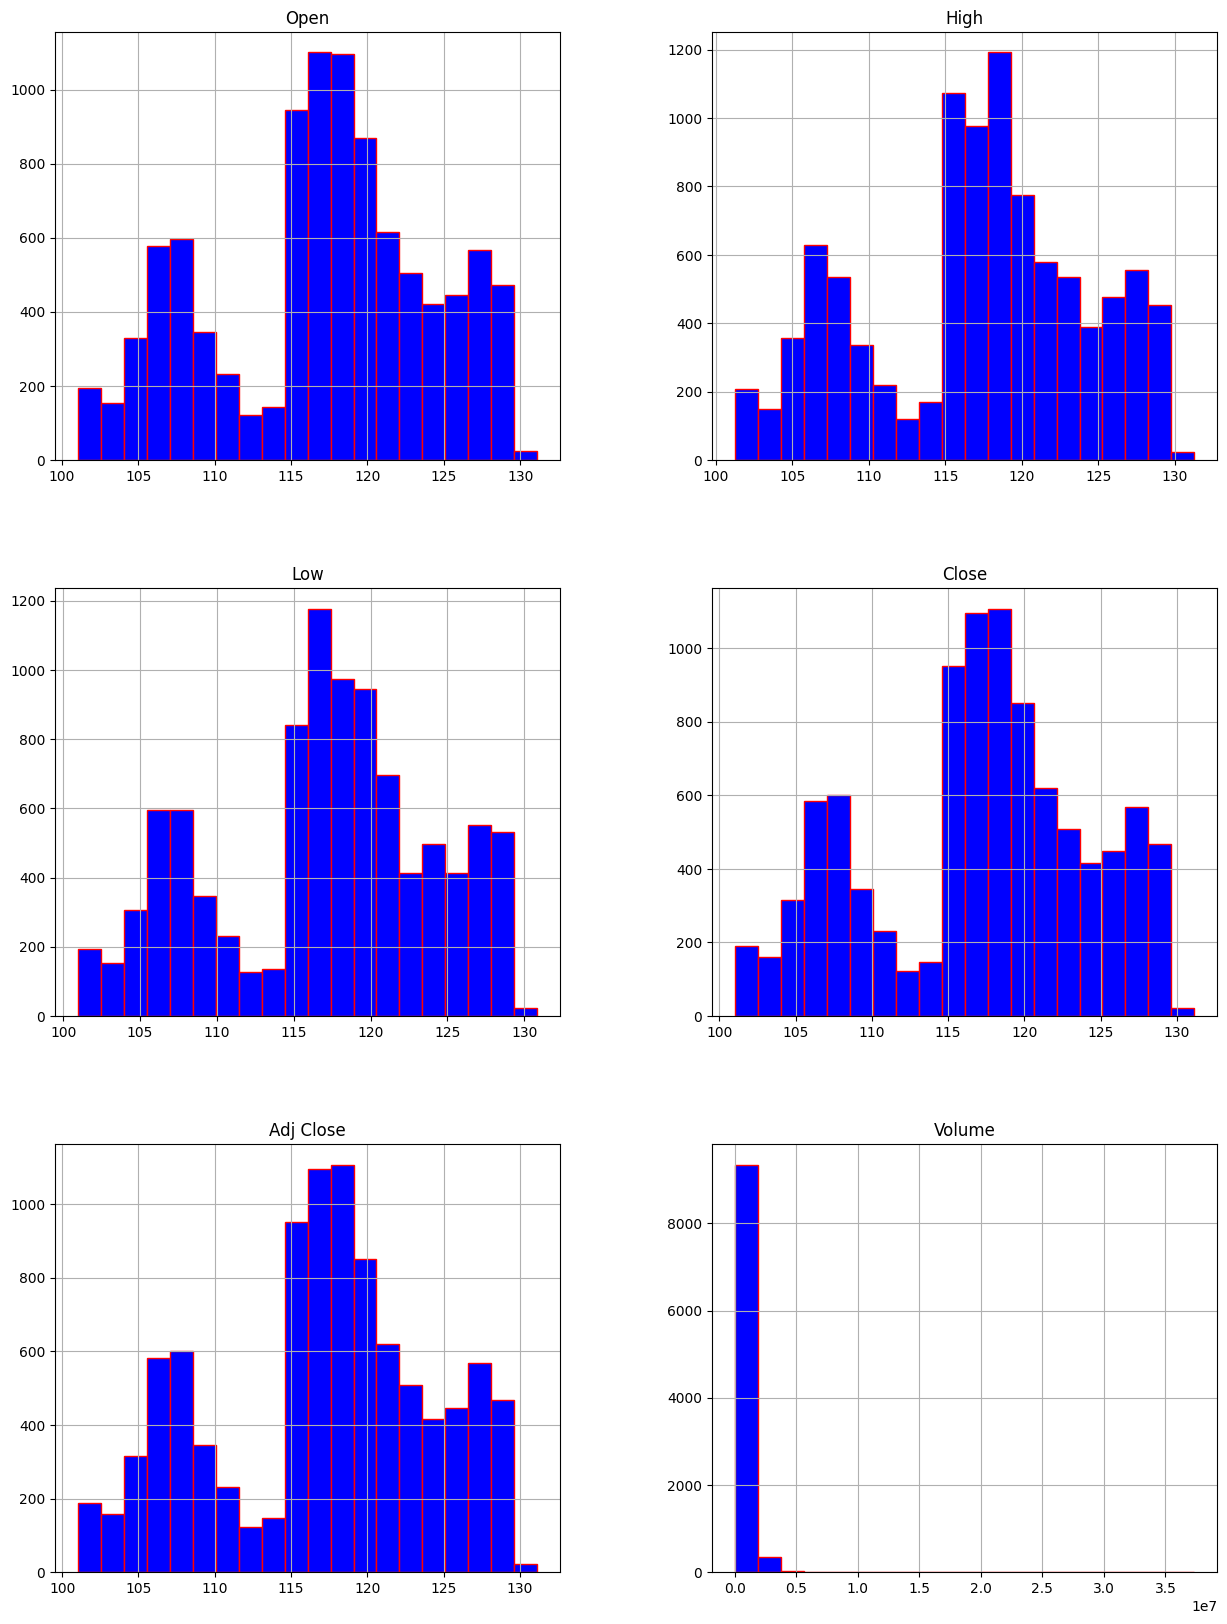

In [27]:
df[numerical_col].hist(bins=20, figsize=(15, 20), color='blue', edgecolor='red')

In [28]:
plt.suptitle('Histogram', fontsize=16)

Text(0.5, 0.98, 'Histogram')

<Figure size 640x480 with 0 Axes>

In [29]:
plt.show()

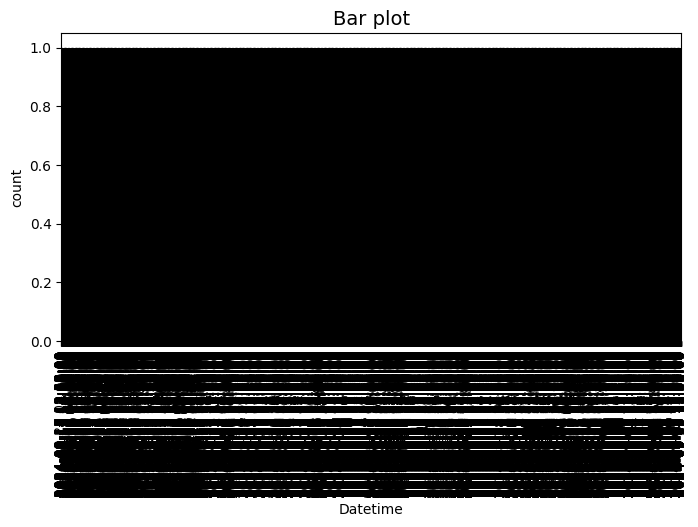

In [31]:
categorical_col=df.select_dtypes(include=['object','category']).columns
for col in categorical_col:
    df[col].value_counts().plot(kind='bar', figsize=(8,4),color='red', edgecolor='black')
    plt.title('Bar plot', fontsize=14)
    plt.ylabel('count')
    plt.xlabel(col)
    plt.show()

In [32]:
# Step 1: Identify the categorical columns
categorical_col = df.select_dtypes(include=['object', 'category']).columns

# Step 2: Apply one-hot encoding to the identified categorical columns
df_one_hot = pd.get_dummies(df, columns=categorical_col, drop_first=True)

# Step 3: Display the first few rows of the updated DataFrame
print(df_one_hot.head())

         Open        High         Low       Close   Adj Close   Volume  \
0  125.870003  125.970001  125.529999  125.605103  125.605103  9116047   
1  125.610001  125.730003  125.220001  125.620003  125.620003  1619948   
2  125.639999  125.790001  125.400002  125.519997  125.519997  1213367   
3  125.540001  125.730003  125.349998  125.459999  125.459999  1388527   
4  125.459999  125.849998  125.419998  125.705002  125.705002  1201631   

   Datetime_2024-08-23 09:31:00  Datetime_2024-08-23 09:32:00  \
0                         False                         False   
1                          True                         False   
2                         False                          True   
3                         False                         False   
4                         False                         False   

   Datetime_2024-08-23 09:33:00  Datetime_2024-08-23 09:34:00  ...  \
0                         False                         False  ...   
1                       

#  While loop

In [60]:

num = 2

result = []
while num <= 10:
    result.append(num)
    num += 2  

print(result)


[2, 4, 6, 8, 10]


In [59]:
num = 1
result=[]
while num <= 10:
    result.append(num)
    num += 2
print(result)

[1, 3, 5, 7, 9]


In [57]:
num=2
result=[]
while num <=10:
    result.append(num)
    num+=2

sum_result=sum(result)
sum_result


30

In [58]:

num = 1
result = []
while num <= 10:
    result.append(num)
    num += 2 
sum_result = sum(result)
sum_result

25

In [62]:
product_result=1
for num in result:
    product_result *= num

product_result

3840

In [63]:
product_result=2
for num in result:
    product_result *= num

product_result

7680

In [64]:
sum_3_divisible = sum(num for num in range(1, 101) if num % 3 == 0)
sum_3_divisible

1683